<h1>Peru Drone Data Analysis: Data Cleaning and Missingness visualization</h1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 12]
#higher quality plots
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import missingno as msno

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wHijok7knaD1PlkfXP7Hv4C-PCYo9FUEDD0sJE5T5AV7eiSKR53Wl0
Mounted at /content/drive


# Importing the Data




In [ ]:
!ls drive/My\ Drive/UNICEF/Data_Sources/Drone_Peru

hourly_measurement_qh007_unicef.csv  hourly_measurement_qh012_unicef.csv
hourly_measurement_qh008_unicef.csv  hourly_measurement_qh013_unicef.csv
hourly_measurement_qh010_unicef.csv  hourly_measurement_qh014_unicef.csv
hourly_measurement_qh011_unicef.csv


In [ ]:
!ls drive/My\ Drive/UNICEF/Data_Sources/PlumeLabs_Peru

17361_LIMA.csv	17363_LIMA.csv	17365_LIMA.csv	17367_LIMA.csv	17369_LIMA.csv
17362_LIMA.csv	17364_LIMA.csv	17366_LIMA.csv	17368_LIMA.csv	stations.csv


In [ ]:
#Loading the Data
#Unicef
data1 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh007_unicef.csv')
data2 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh008_unicef.csv')
data3 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh010_unicef.csv')
data4 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh011_unicef.csv')
data5 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh012_unicef.csv')
data6 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh013_unicef.csv')
data7 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh014_unicef.csv')
#PlumeLab
data8 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17361_LIMA.csv')
data9 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17362_LIMA.csv')
data10 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17363_LIMA.csv')
data11 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17364_LIMA.csv')
data12 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17365_LIMA.csv')
data13 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17366_LIMA.csv')
data14 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17367_LIMA.csv')
data15 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17368_LIMA.csv')
data16 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17369_LIMA.csv')


In [ ]:
station_list_unicef= [data1,data2,data3,data4,data5,data6,data7]
station_list_plume=[data8,data9,data10,data11,data12,data13,data14,data15,data16]

In [ ]:
#Date Time Conversion and Indexing
def time_conv(df):
    for station in df:
        station['timestamp'] = pd.to_datetime(station.timestamp)
        station.set_index('timestamp',inplace=True)
time_conv(station_list)
 
#data[["timestamp"]] = data[["timestamp"]].astype("datetime64")
#Converting to YYYY-MM-dd HH:mm
#data[["timestamp"]] = data[["timestamp"]].df.strftime("dd-MM-YYYY hh:mm")

In [ ]:
#Data range for stations till 2020-07-31
temp_time_long = pd.date_range('2020-02-01 00:00', '2020-7-31 23:00', freq='H')
temp_time_long = [i for i in temp_time_long]
time_df_long=pd.DataFrame(temp_time_long, columns=['timestamp'])
time_df_long.set_index('timestamp',inplace=True)

#Merge with the dataframes for stations till 2020-07-31 [Stations 1,6,7]
data1 = pd.merge(data1,time_df_long,left_index=True, right_index=True, how='outer')
data6 = pd.merge(data6,time_df_long,left_index=True, right_index=True, how='outer')
data7 = pd.merge(data7,time_df_long,left_index=True, right_index=True, how='outer')
data2 = pd.merge(data2,time_df_long,left_index=True, right_index=True, how='outer')
data3 = pd.merge(data3,time_df_long,left_index=True, right_index=True, how='outer')
data4 = pd.merge(data4,time_df_long,left_index=True, right_index=True, how='outer')
data5 = pd.merge(data5,time_df_long,left_index=True, right_index=True, how='outer')

print("Till 7/31:")
print("S1: ", len(data1))
print("S2: ", len(data2))
print("S3: ", len(data3))
print("S4: ", len(data4))
print("S5: ", len(data5))
print("S6: ", len(data6))
print("S7: ", len(data7))


Till 7/31:
S1:  4385
S2:  4370
S3:  4375
S4:  4380
S5:  4370
S6:  4368
S7:  4368


In [ ]:
# #data range test for stations till 2020-05-15 [Stations 2,3,4,5]
# temp_time_short = pd.date_range('2020-02-01 00:00', '2020-5-15 23:00', freq='H')
# temp_time_short = [i for i in temp_time]
# time_df_short=pd.DataFrame(temp_time_short, columns=['timestamp'])
# time_df_short.set_index('timestamp', inplace=True)
# #Merge with the dataframes
# data2 = pd.merge(data2,time_df_short,left_index=True, right_index=True, how='outer')
# data3 = pd.merge(data3,time_df_short,left_index=True, right_index=True, how='outer')
# data4 = pd.merge(data4,time_df_short,left_index=True, right_index=True, how='outer')
# data5 = pd.merge(data5,time_df_short,left_index=True, right_index=True, how='outer')

# print("Till 5/15: required")
# print("S2: ", len(data2))
# print("S3: ", len(data3))
# print("S4: ", len(data4))
# print("S5: ", len(data5))


#The Principal Pollutants can be compared to Secondary Sources like OpenAQ, US Embassy at Peru

# Tackling [uv, humidity, temperature, spl, pressure]



1.   Fill in the missing values in the above fields
        - Uniform Missingness till 2020-03-18 23:00:00
2.   Is there a way through which we can find some relation between these and the pollution levels.
        - More evidence Required. Secondary Sources need to be explored

Meteorological Data Available from: 2020-03-18 23:00:00


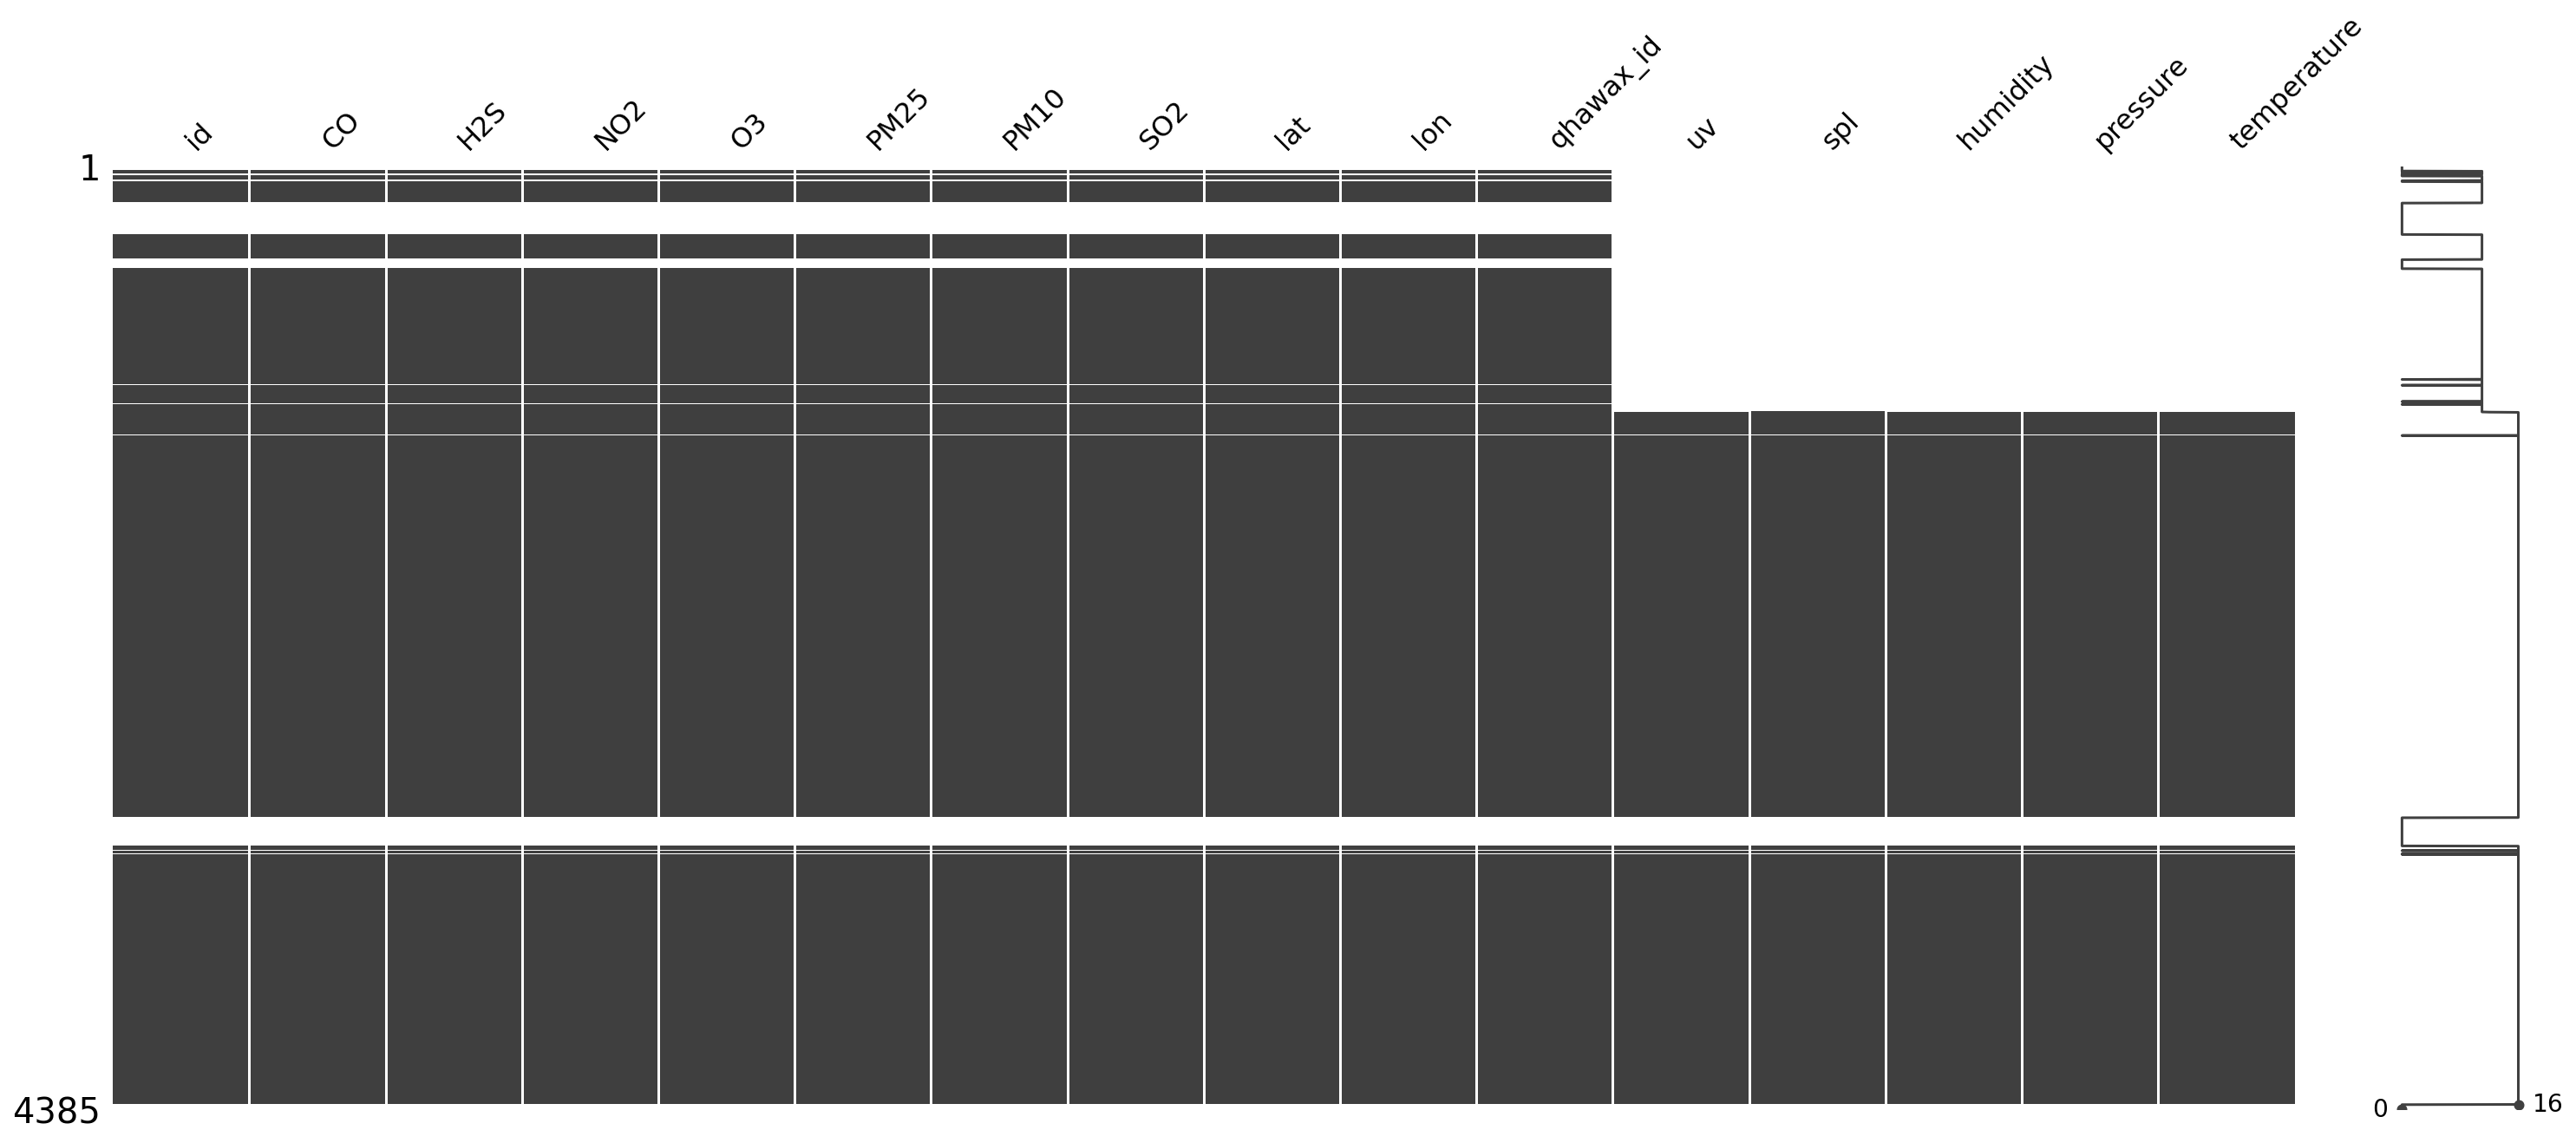

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data1)

Meteorological Data Available from: 2020-03-18 23:00:00


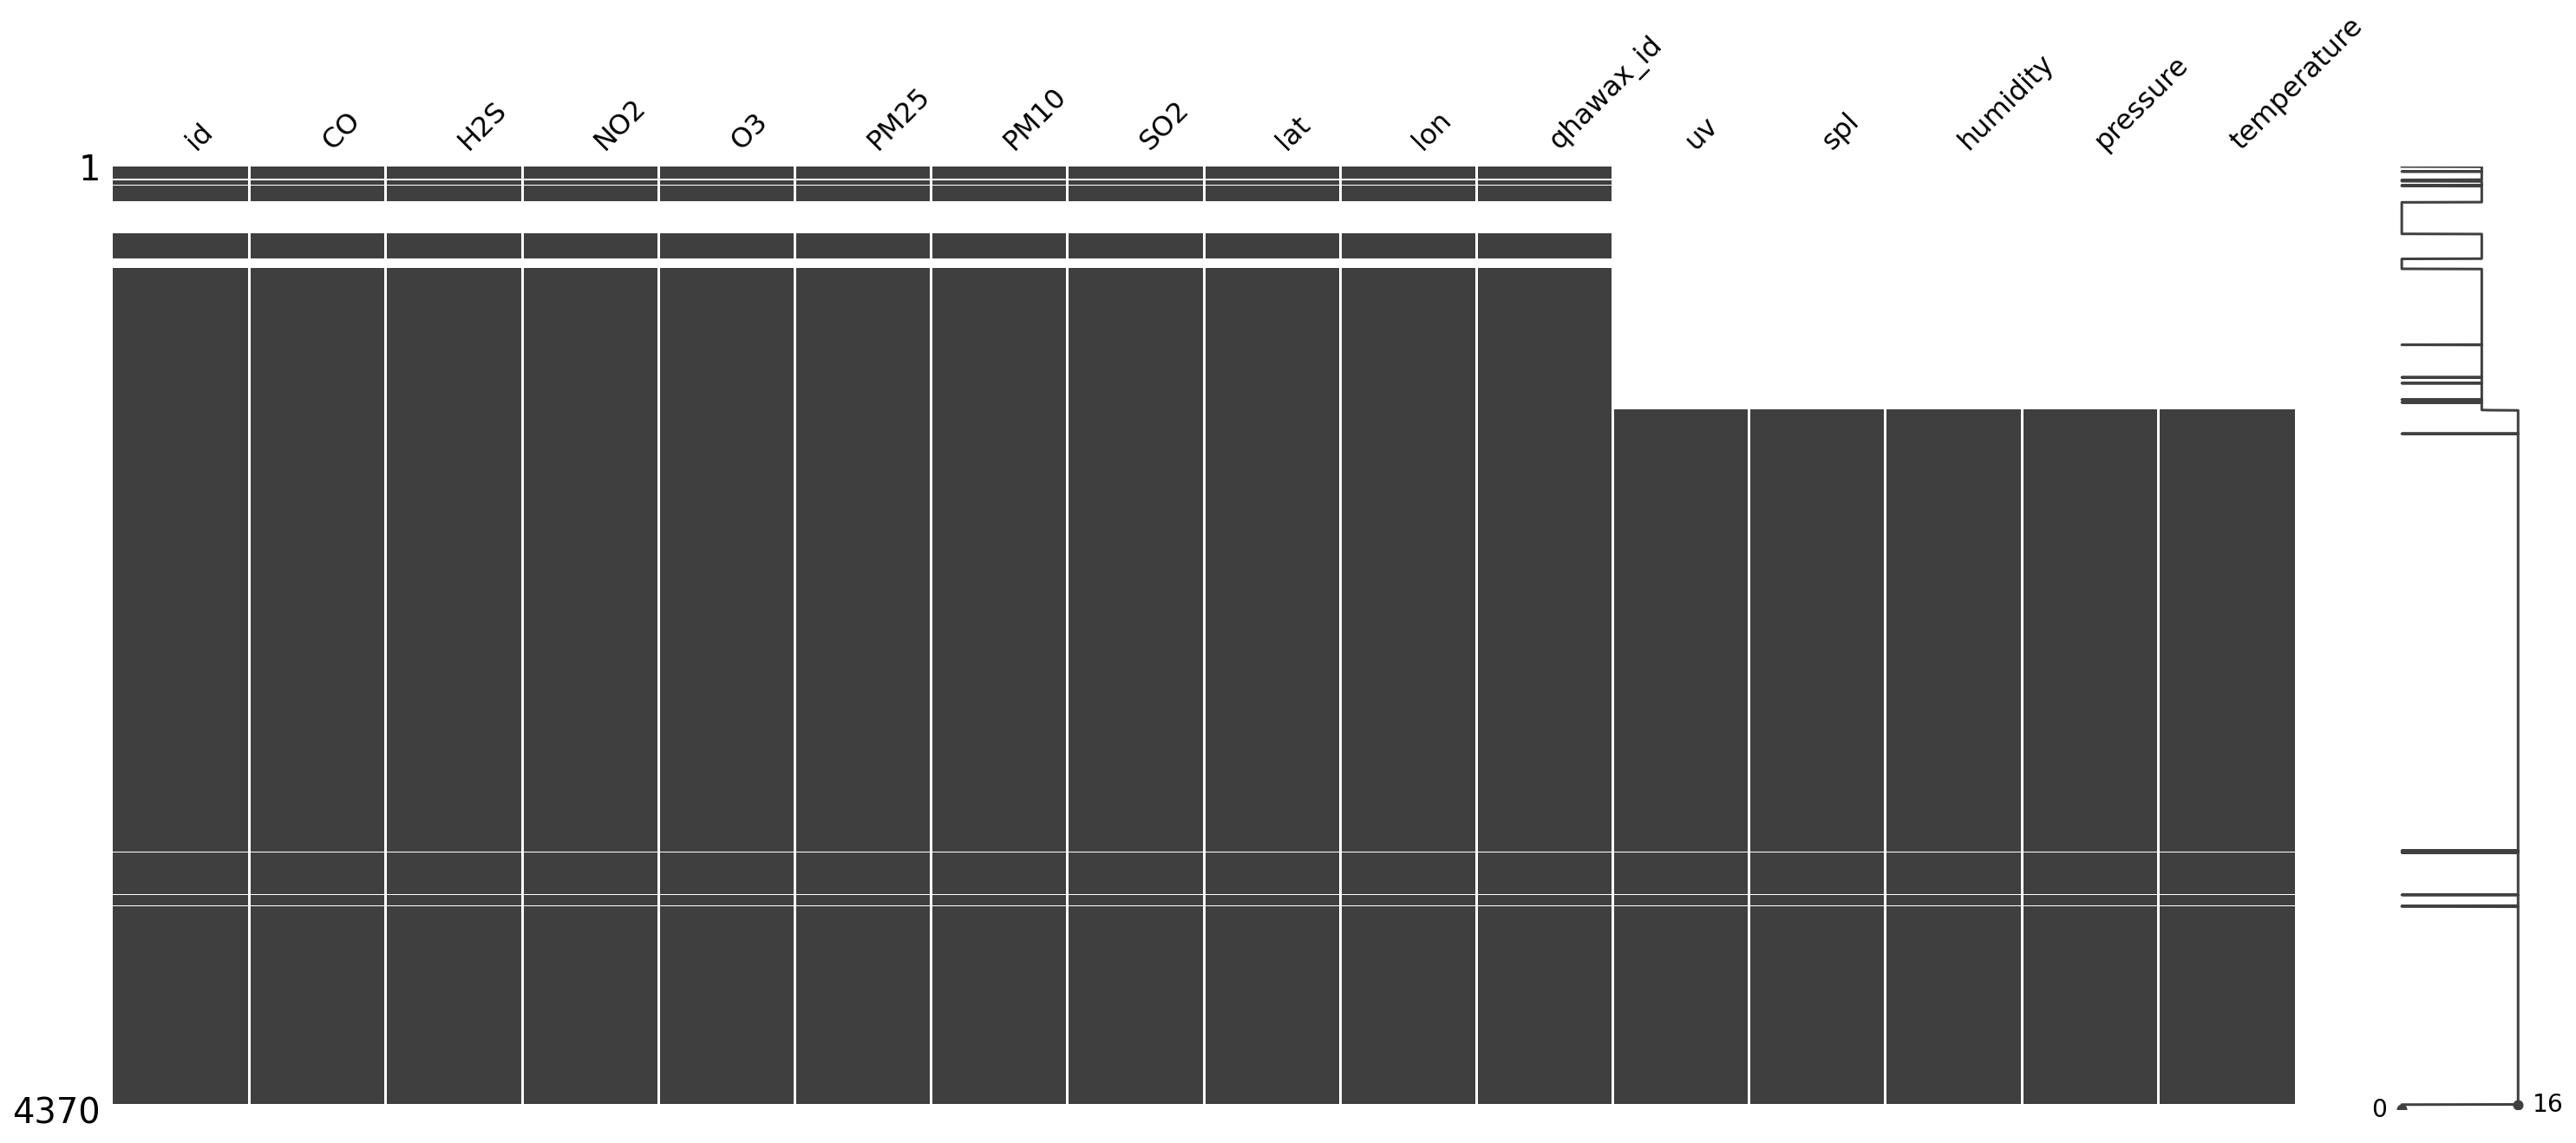

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data2)

Meteorological Data Available from: 2020-03-18 23:00:00


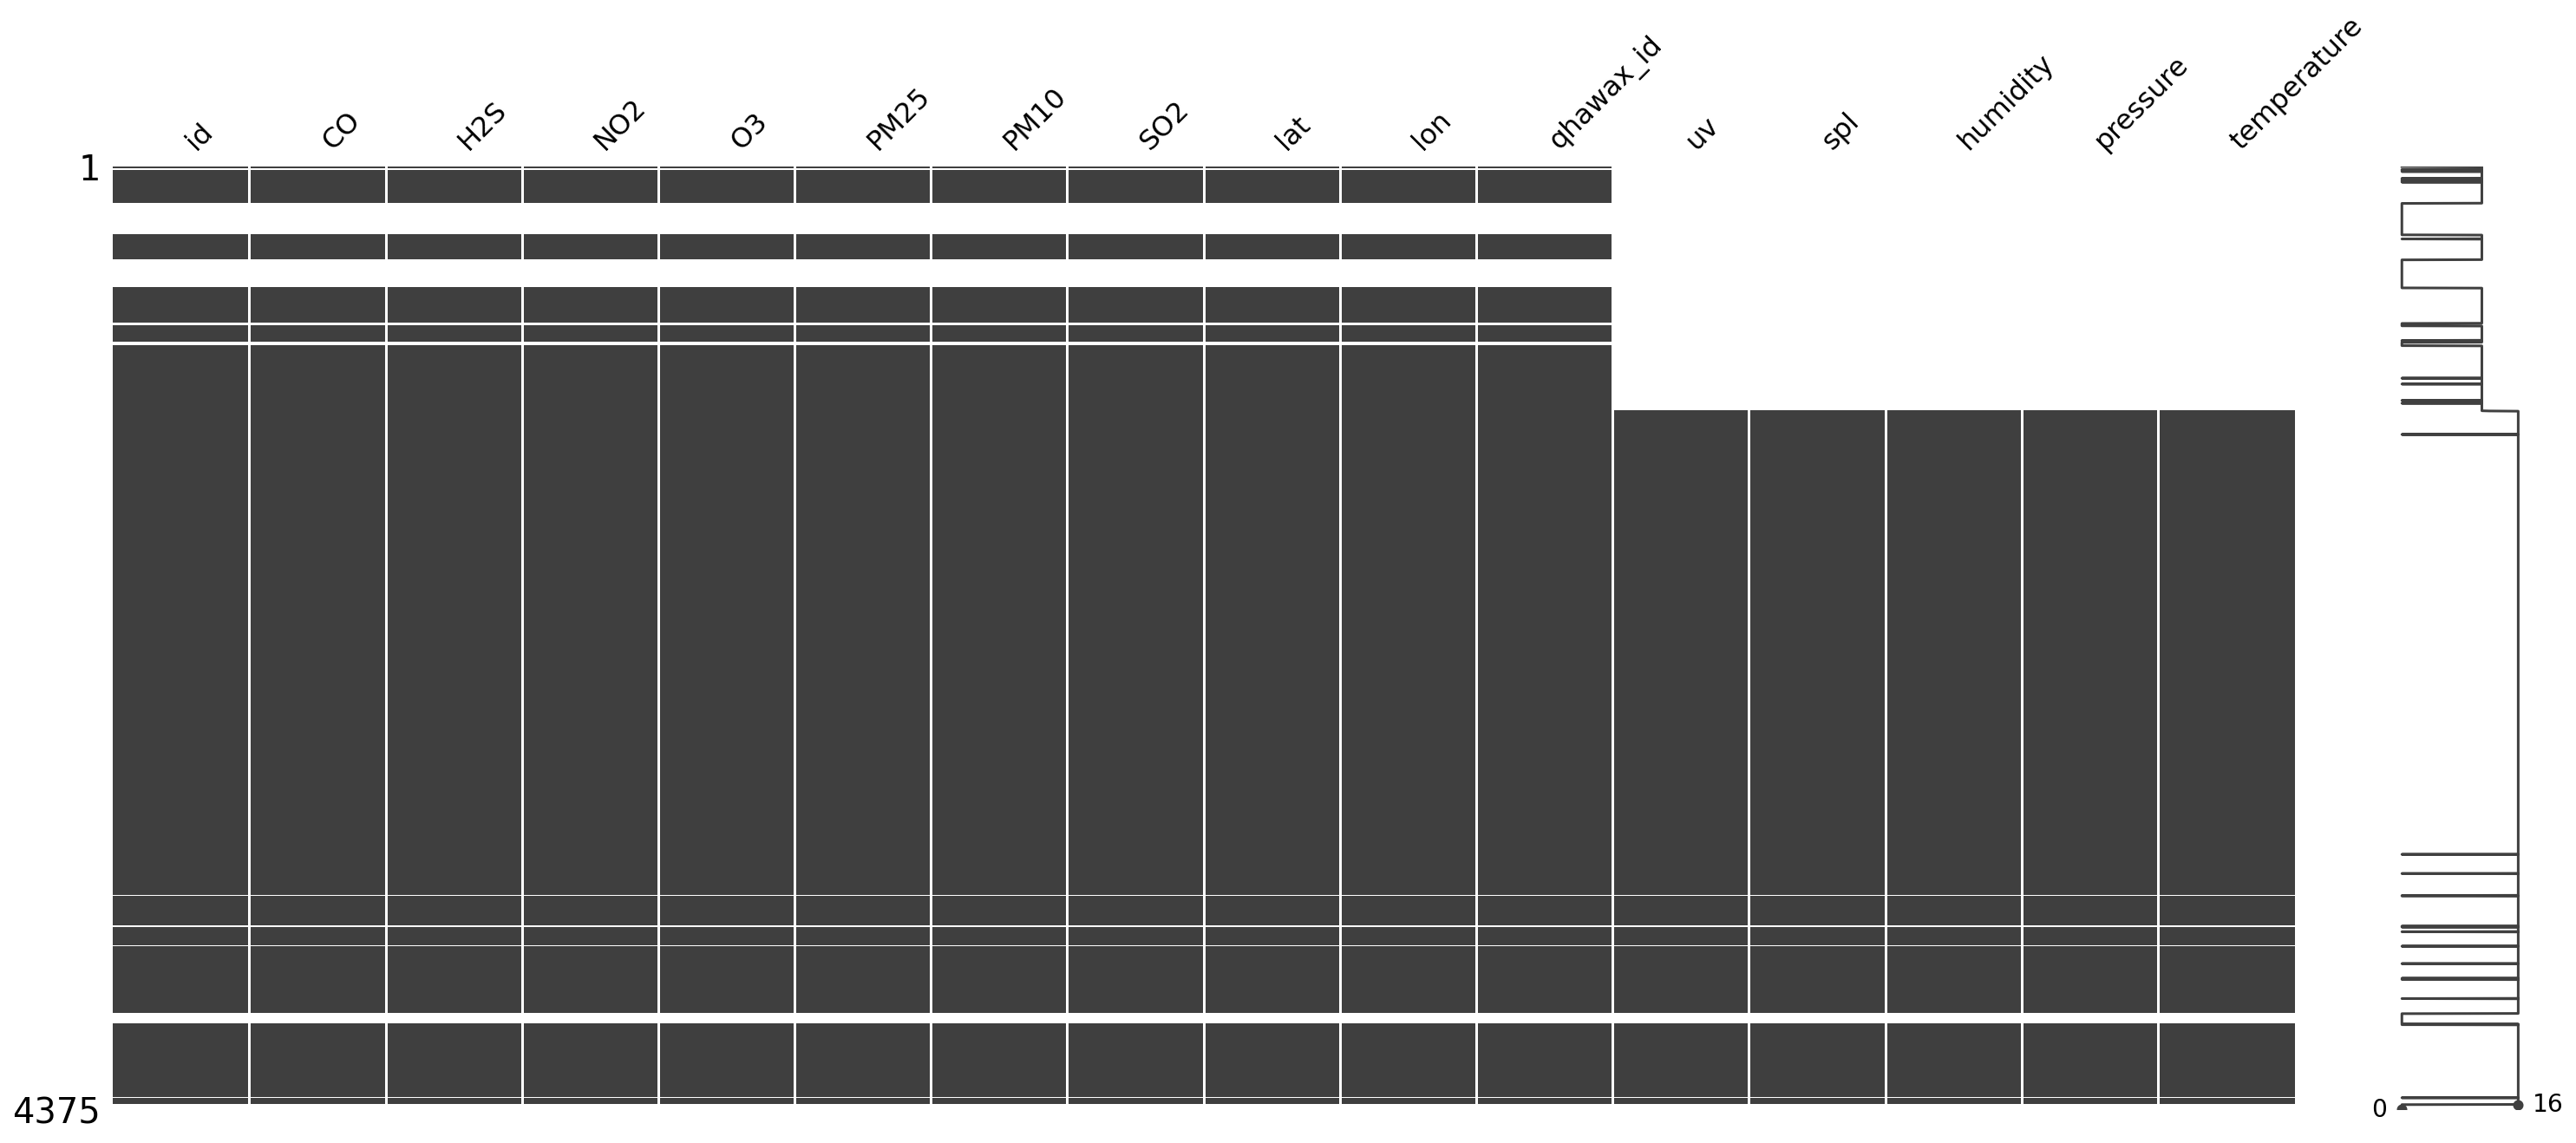

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data3)

Meteorological Data Available from: 2020-03-18 23:00:00


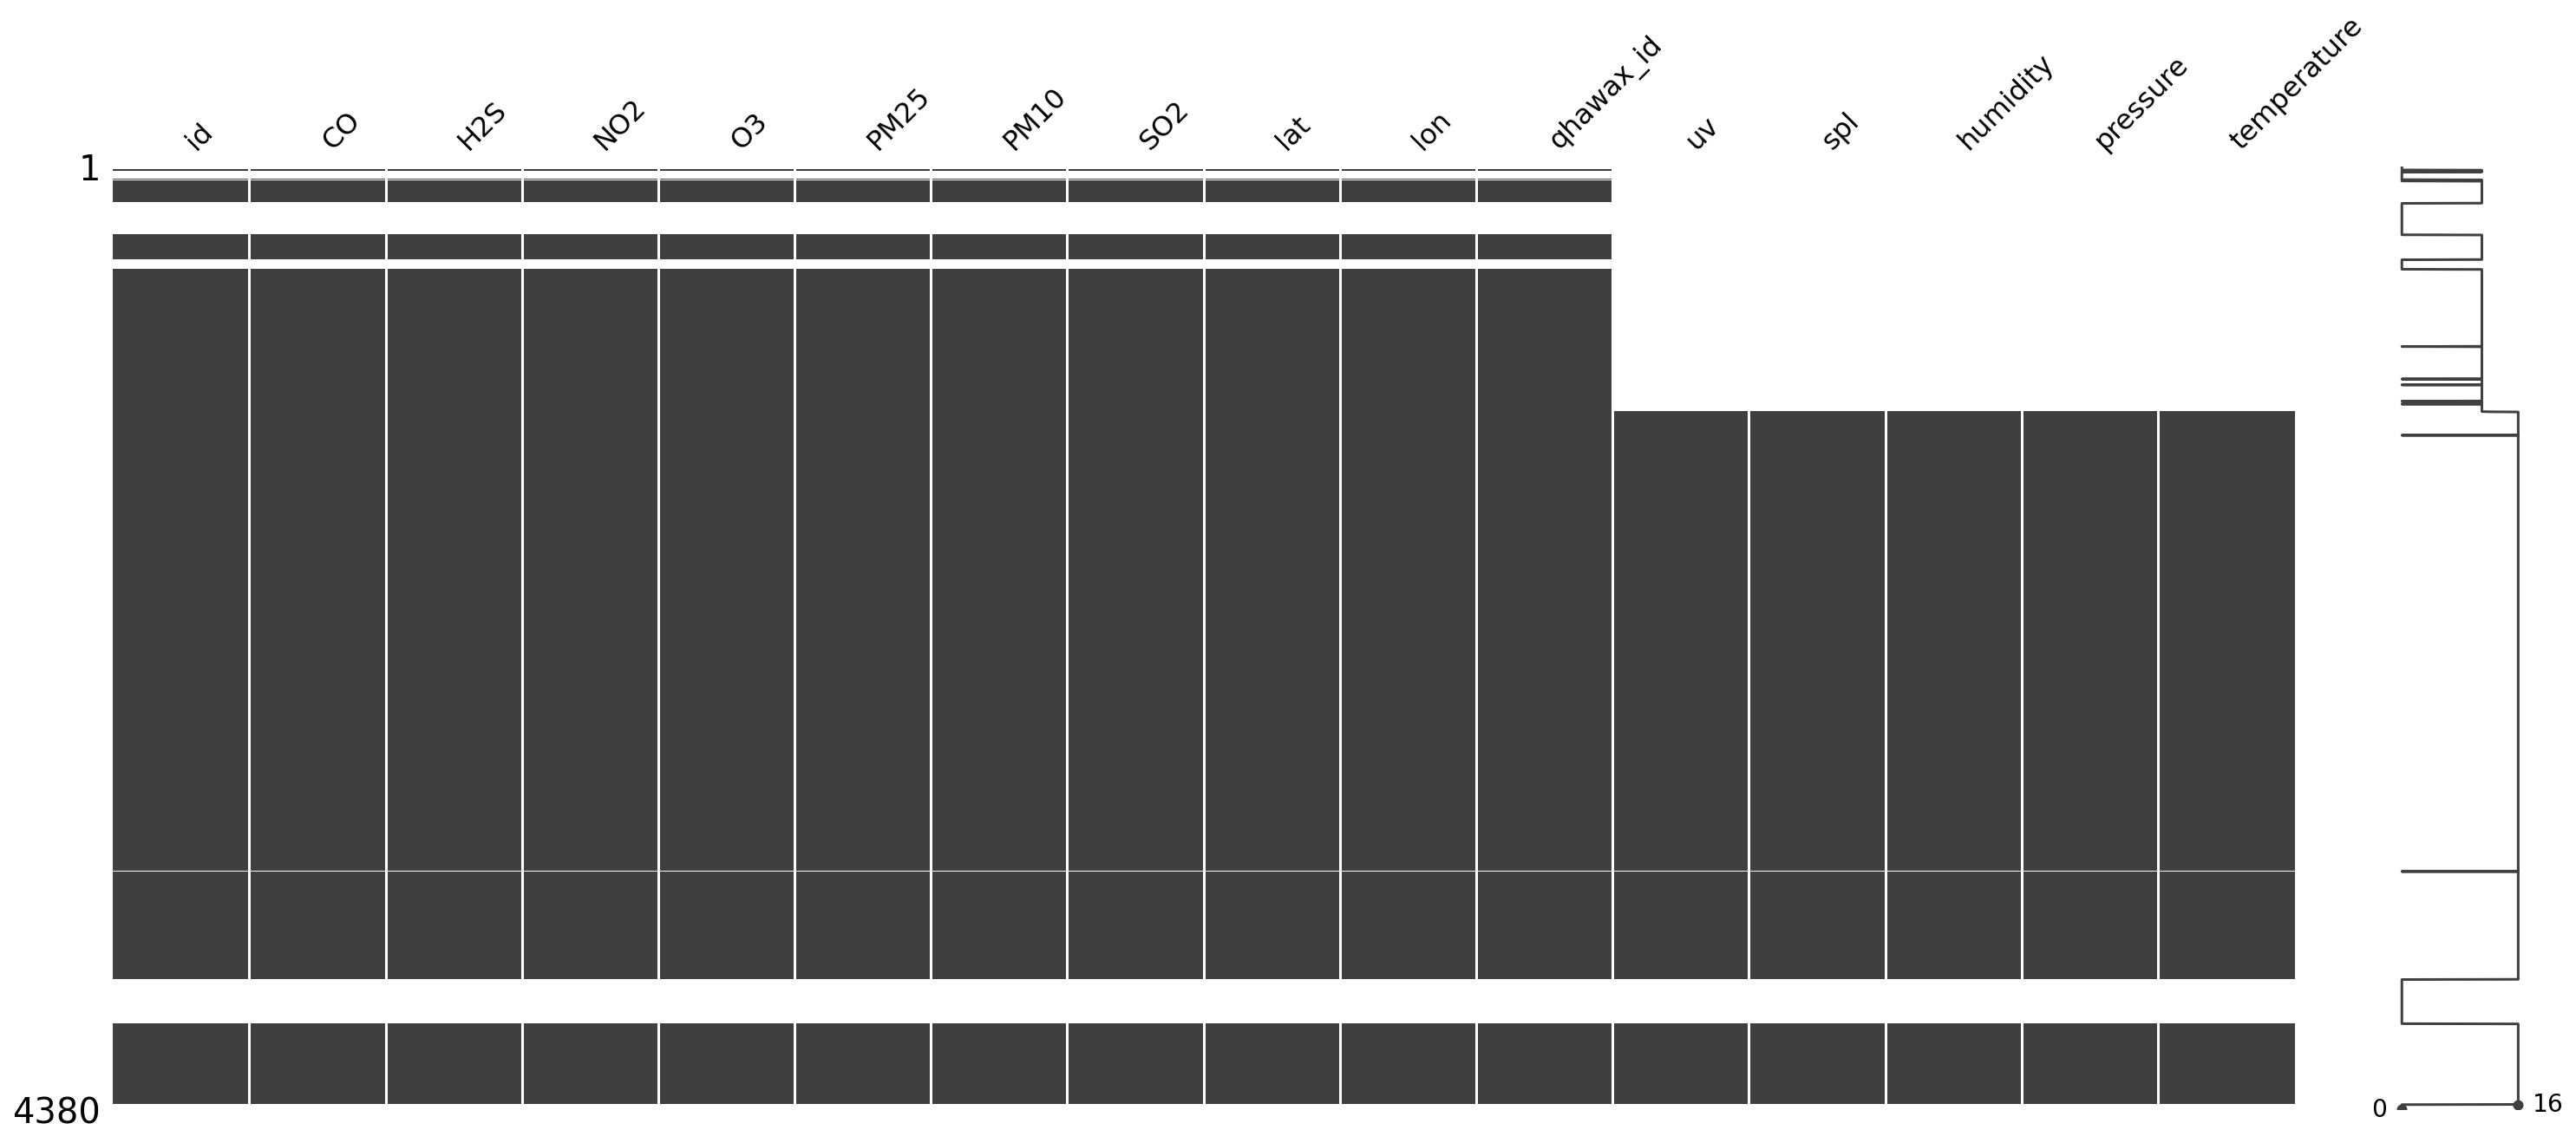

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data4)

Meteorological Data Available from: 2020-03-18 23:00:00


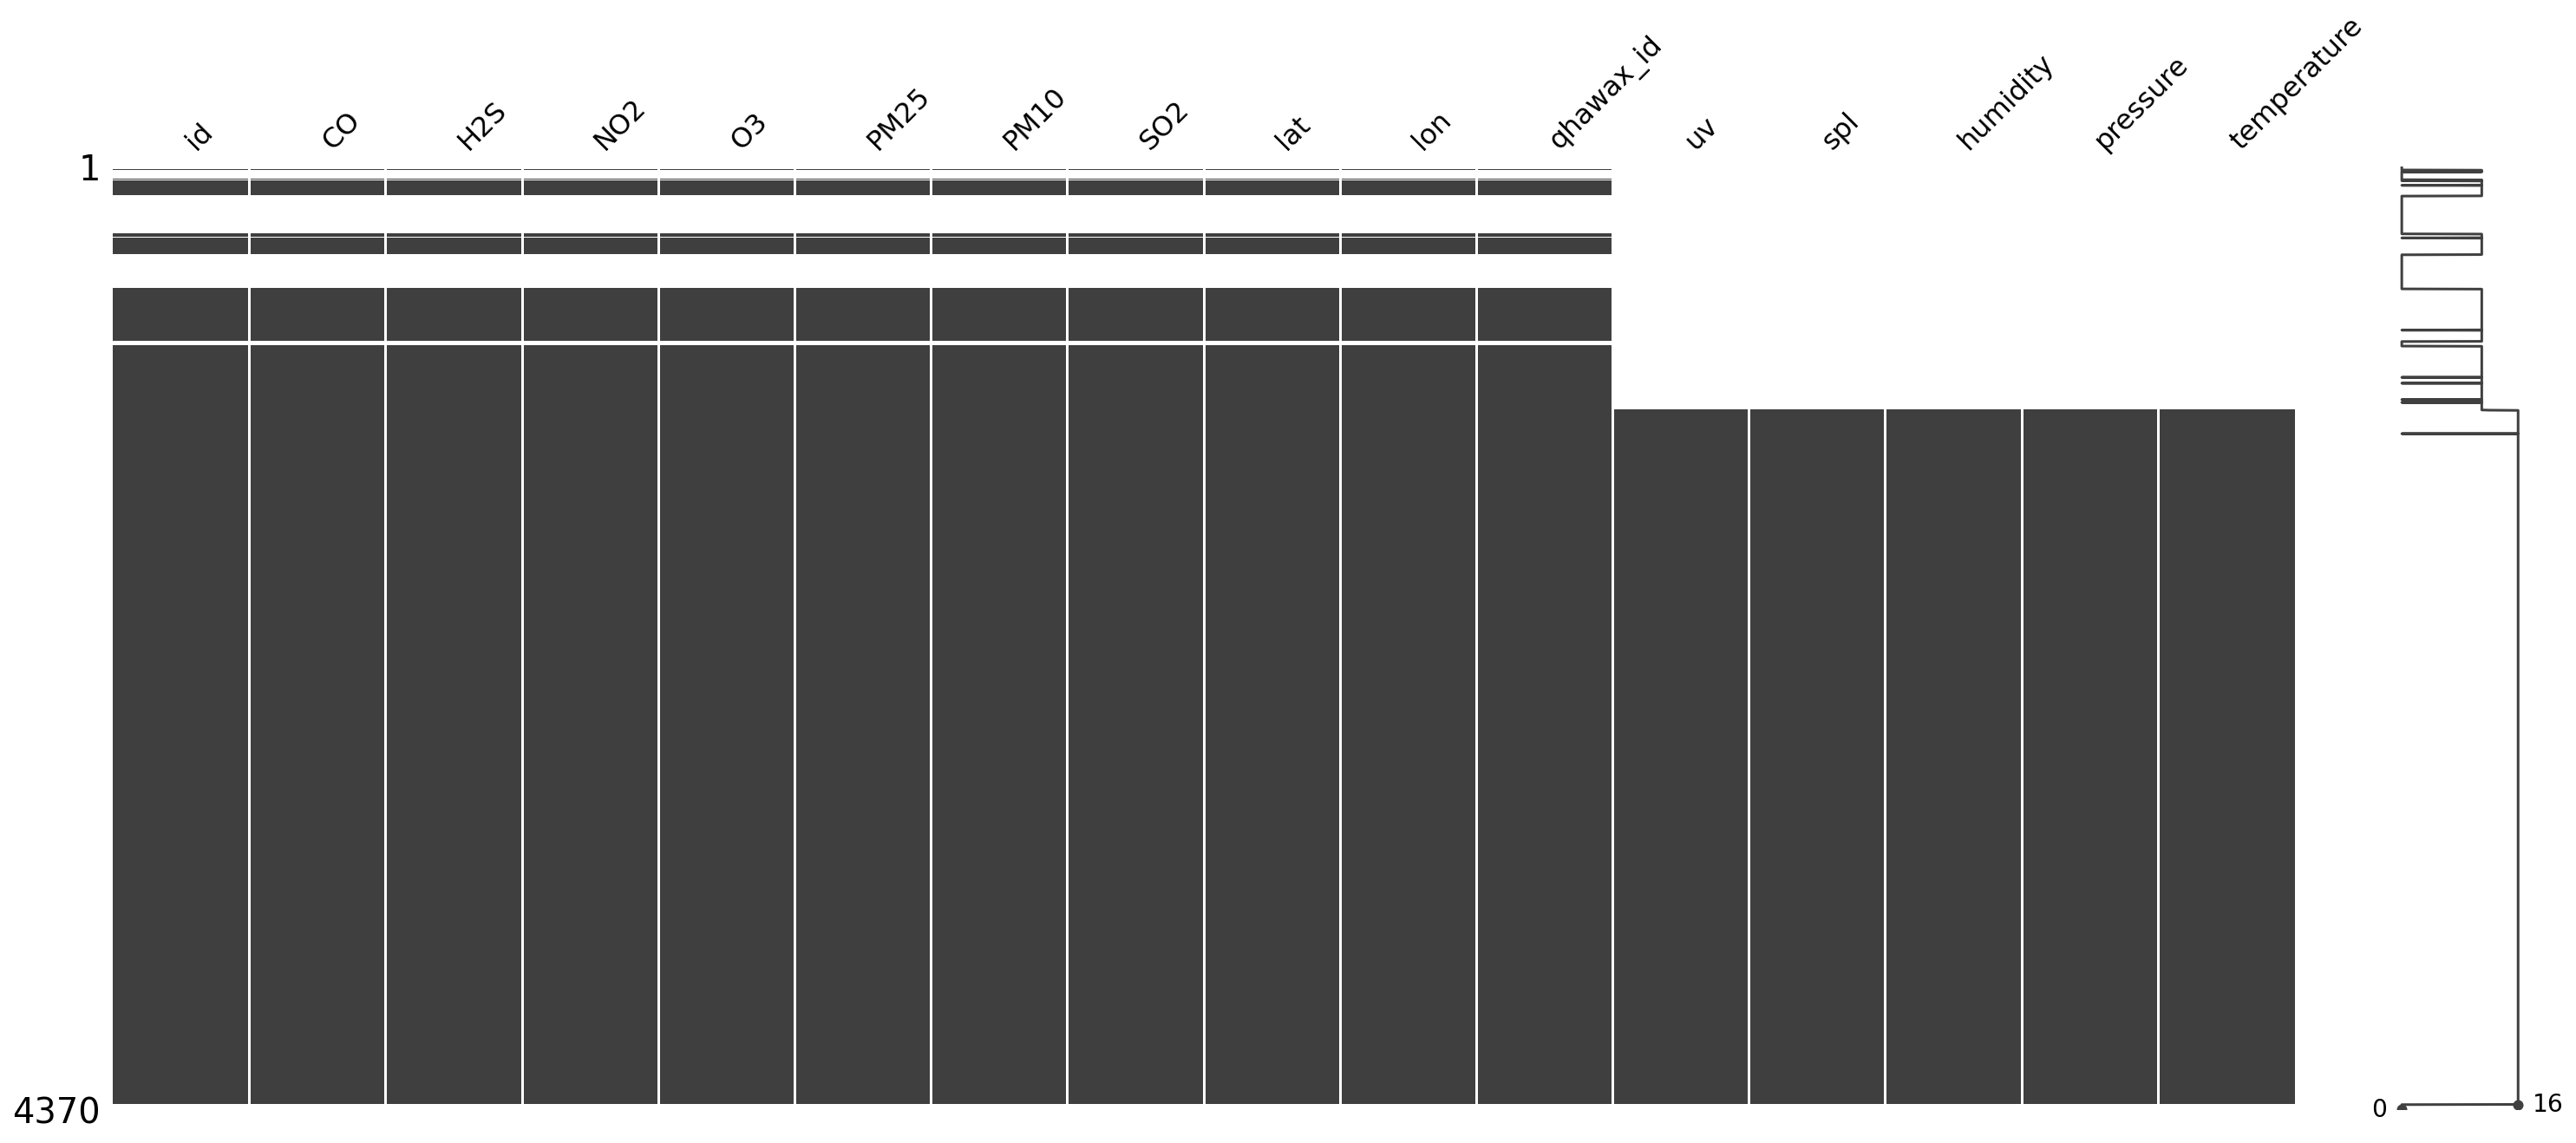

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data5)

Meteorological Data Available from: 2020-03-19 00:00:00


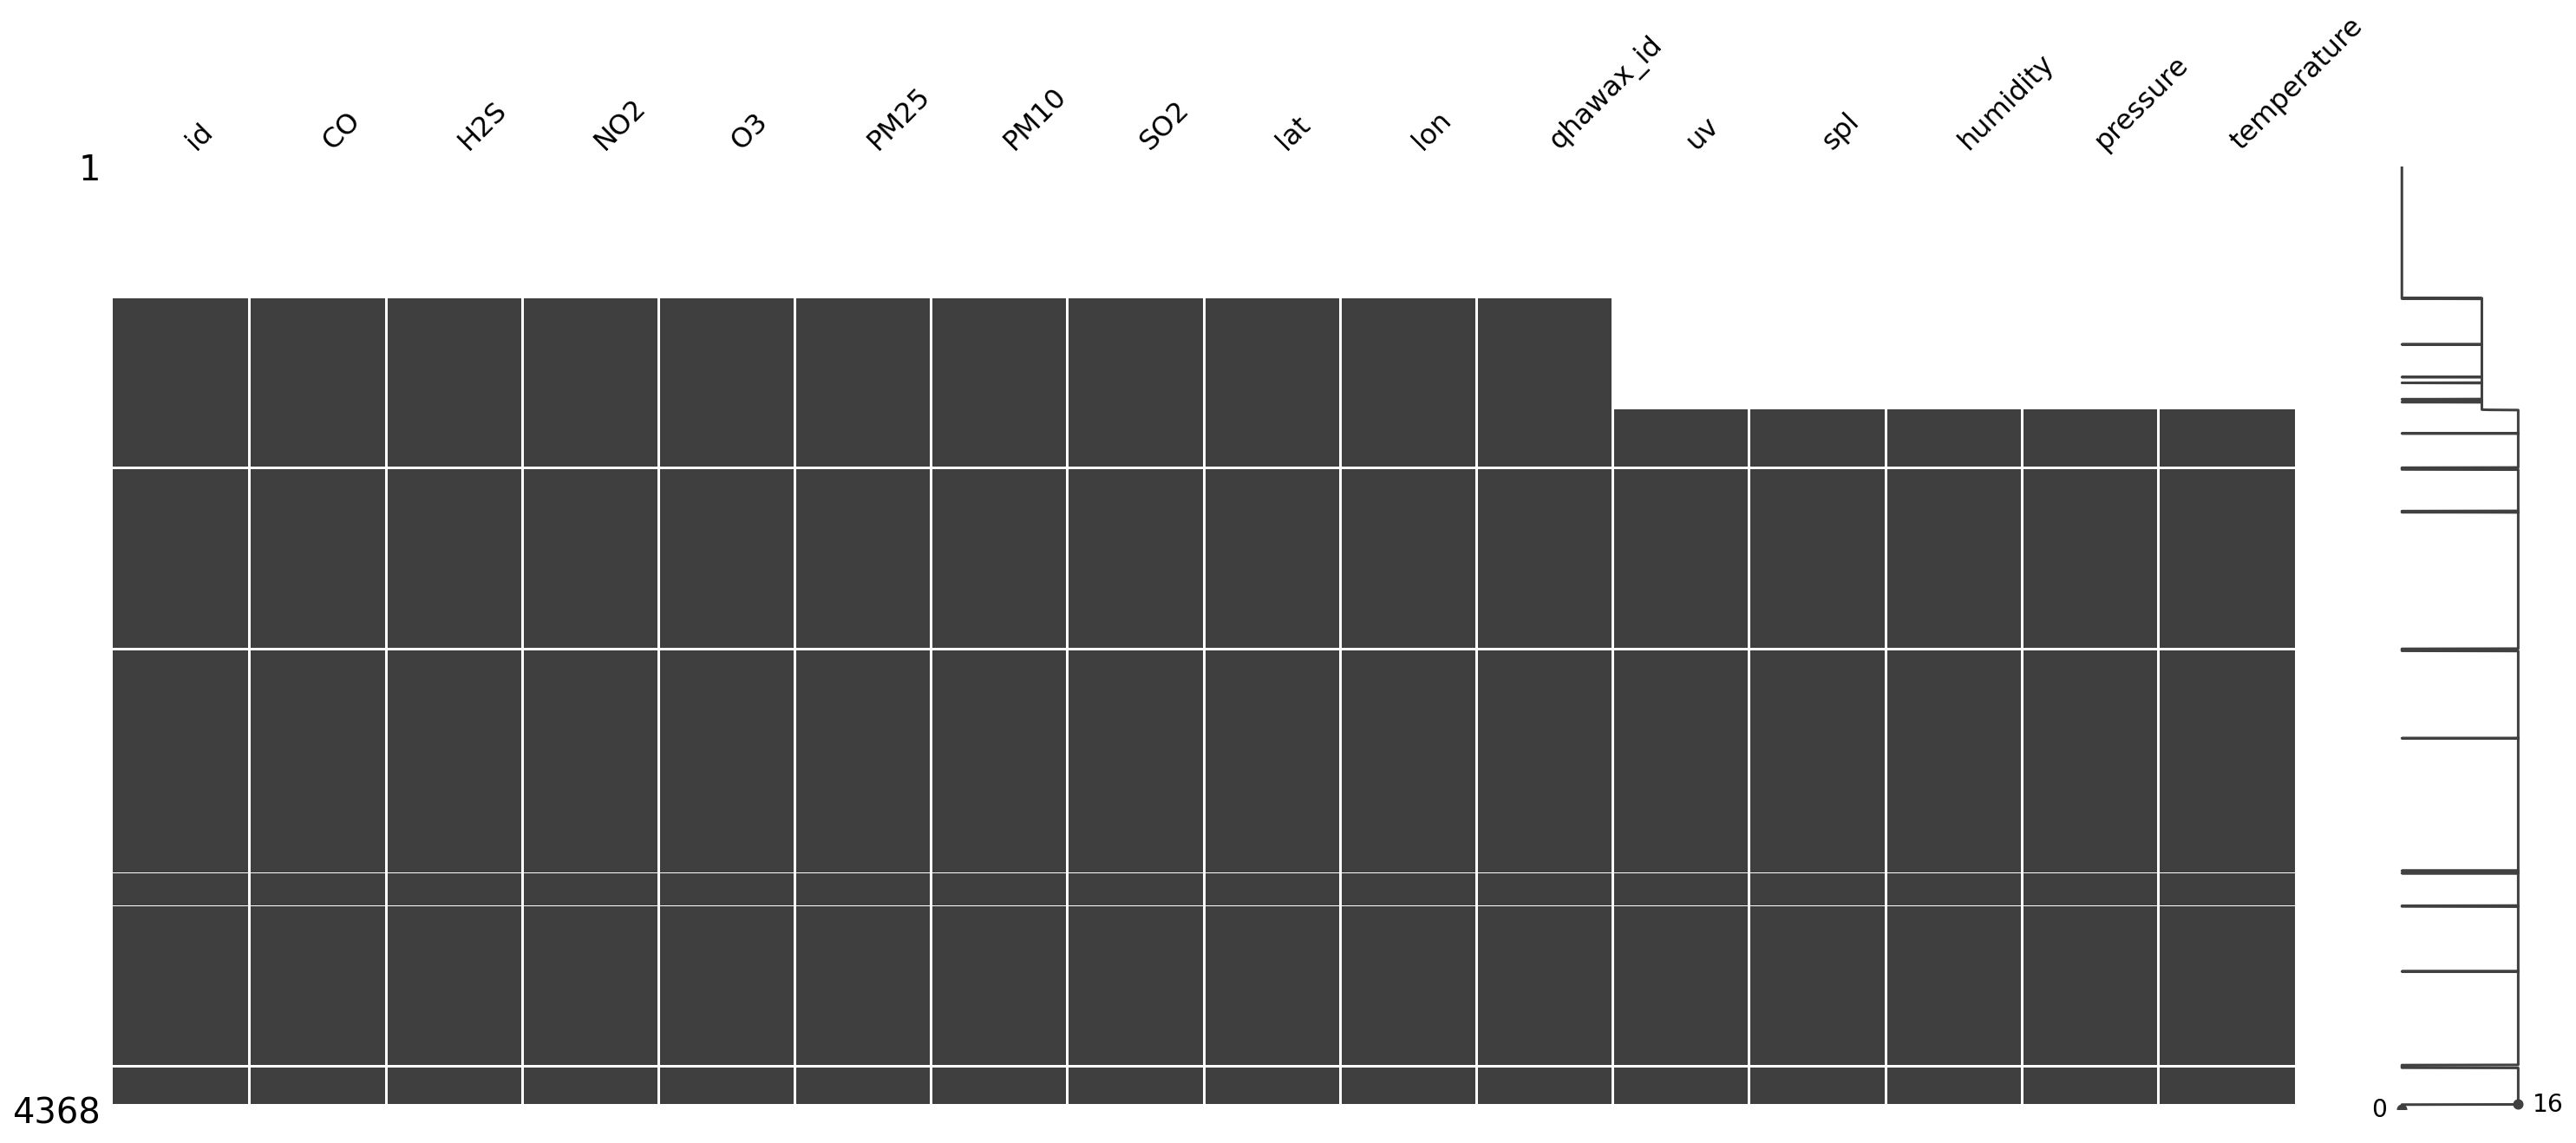

In [ ]:
print("Meteorological Data Available from: 2020-03-19 00:00:00")
msno.matrix(data6)

Meteorological Data Available from: 2020-03-18 23:00:00


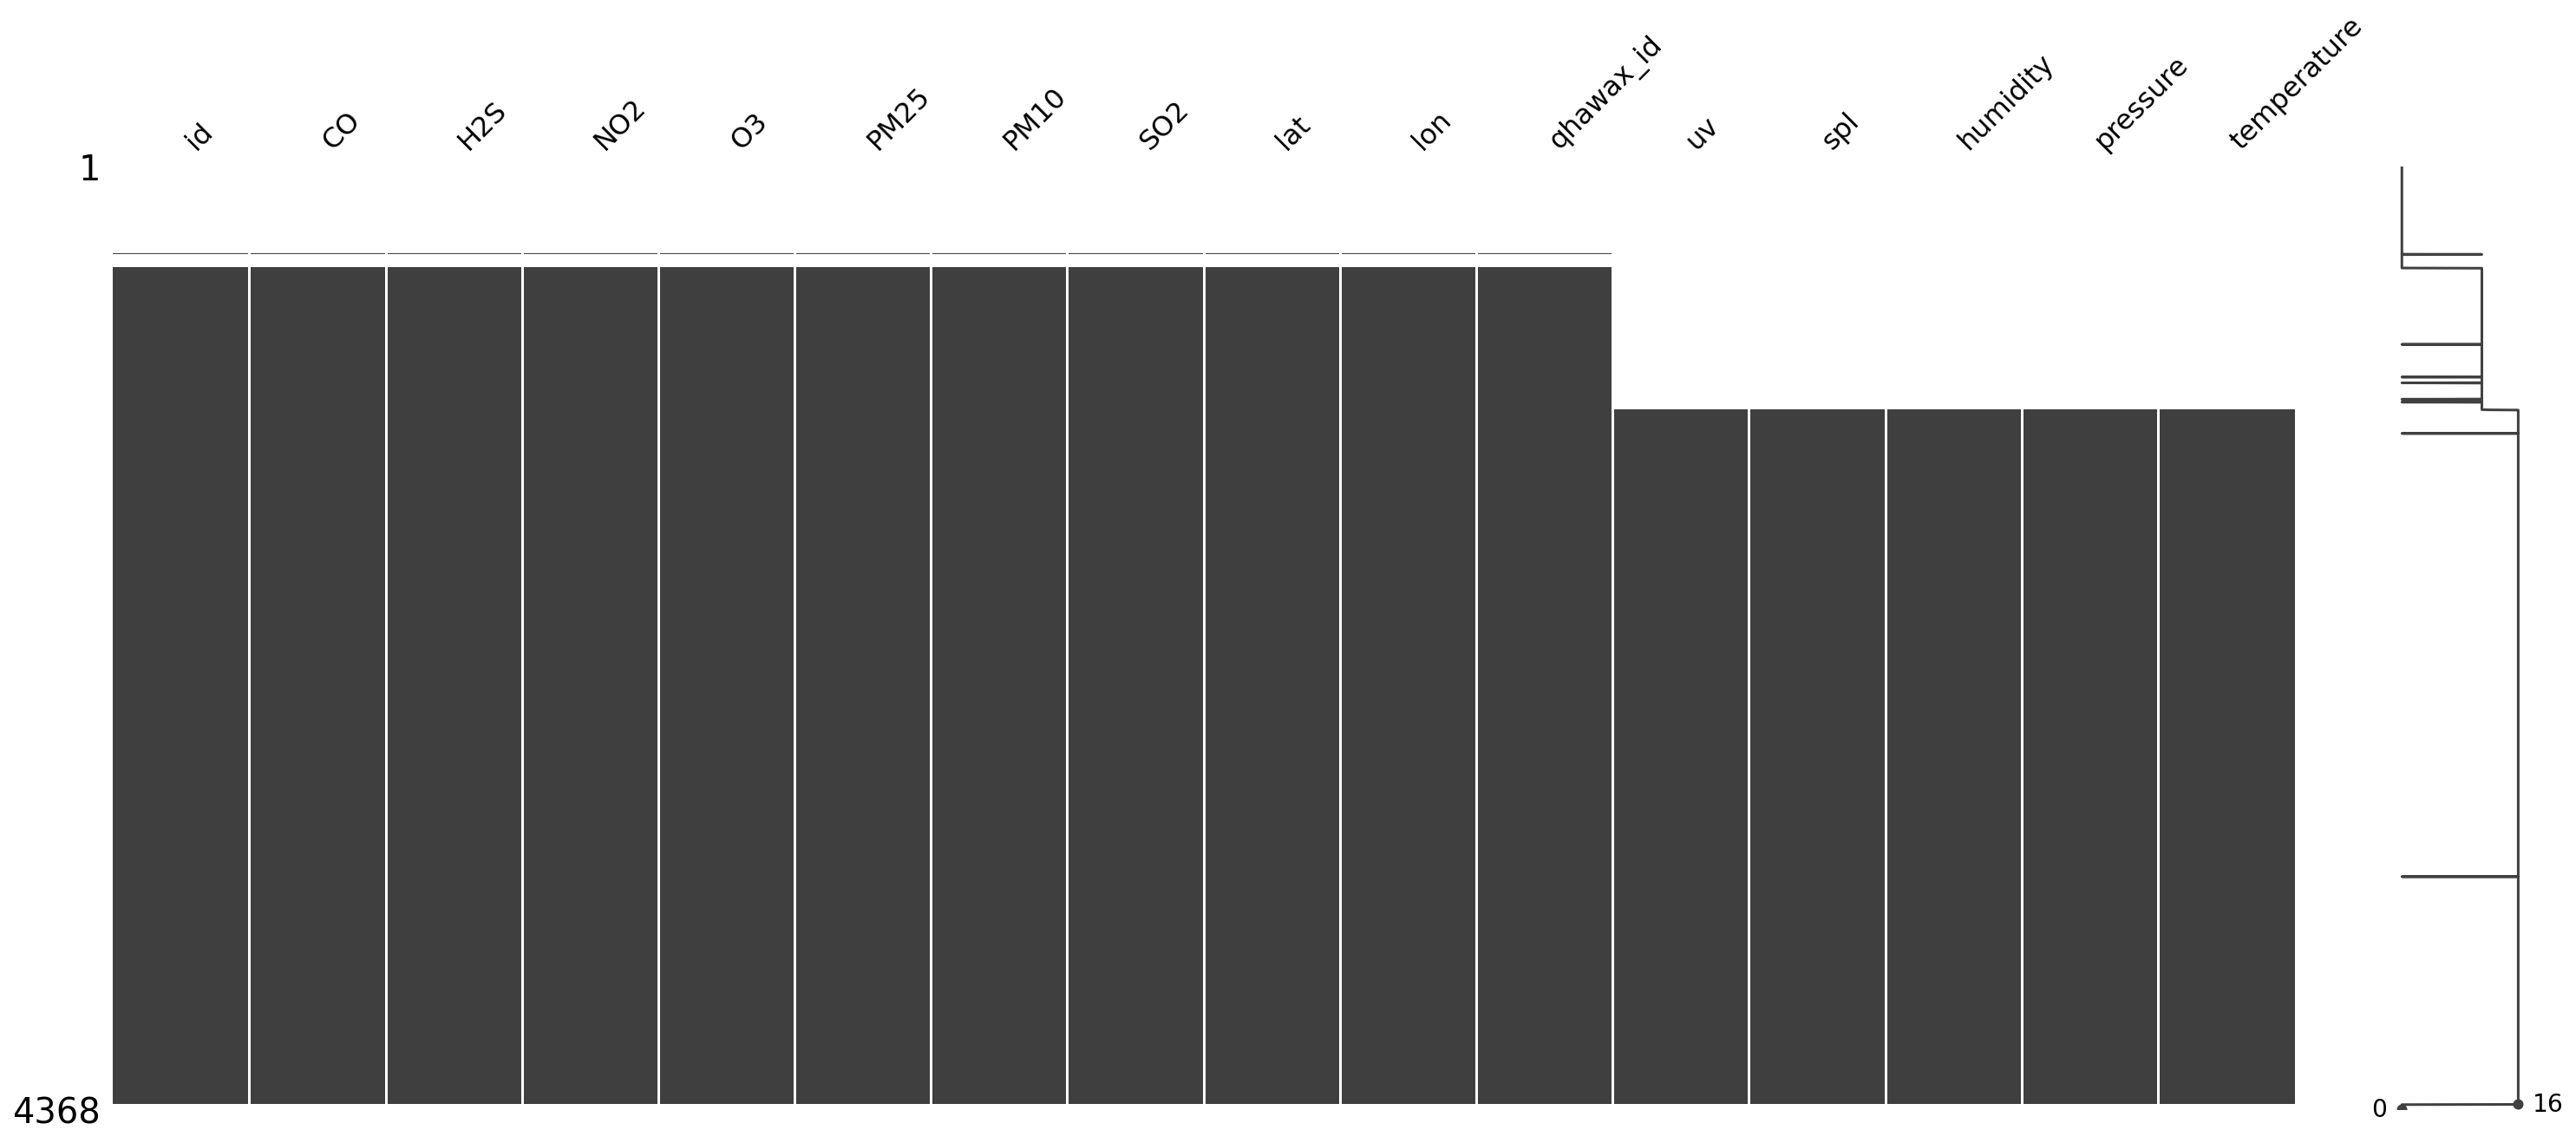

In [ ]:
print("Meteorological Data Available from: 2020-03-18 23:00:00")
msno.matrix(data7)

## Observation: Uniform Missingness in the Meteorological Data from All the stations from 2020-02-01 to 2020-03-15

-- Need secondary source

In [ ]:
#Creating Master Dataframe
data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data.reset_index(inplace=True)
data["Datedate"] = data["timestamp"].dt.to_period("d")
data["DateMonth"] = data["timestamp"].dt.to_period("M")
data.head()

,timestamp,id,CO,H2S,NO2,O3,PM25,PM10,SO2,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,Datedate,DateMonth
0,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
1,2020-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
2,2020-02-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
3,2020-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02
4,2020-02-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02


In [ ]:
#Required for Spatial Plotting
print("lat:min",data.lat.min())
print("lat:max",data.lat.max())
print("long:min",data.lon.min())
print("long:max",data.lon.max())

lat:min -12.109722999999999
lat:max -12.04
long:min -77.083
long:max -76.98899999999999


In [ ]:
data.columns

Index(['timestamp', 'id', 'CO', 'H2S', 'NO2', 'O3', 'PM25', 'PM10', 'SO2',
       'lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature', 'Datedate', 'DateMonth'],
      dtype='object')

In [ ]:
#considering the meteorological factors and PM2.5 with NO2

met_cols = ['timestamp','lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature','Datedate', 'DateMonth','PM25', 'NO2']


In [ ]:
data[met_cols].groupby(['qhawax_id','timestamp']).head()

,timestamp,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,Datedate,DateMonth,PM25,NO2
0,2020-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
1,2020-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
2,2020-02-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
3,2020-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
4,2020-02-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01,2020-02,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30588,2020-07-30 20:00:00,-12.043889,-77.050552,14.0,0.0,62.963,91.653,99692.509,14.832,2020-07-30,2020-07,9.167,66.158
30589,2020-07-30 21:00:00,-12.043889,-77.050552,14.0,0.0,63.363,90.828,99758.122,14.976,2020-07-30,2020-07,8.914,63.951
30590,2020-07-30 22:00:00,-12.043889,-77.050552,14.0,0.0,61.704,90.826,99781.980,14.979,2020-07-30,2020-07,8.621,54.313
30591,2020-07-30 23:00:00,-12.043889,-77.050552,14.0,0.0,60.513,89.961,99772.029,15.082,2020-07-30,2020-07,9.082,45.663


In [ ]:
data_met = data[met_cols]

In [ ]:
#no. of unique values
feats_counts = data_met.nunique(dropna = False)
feats_counts.sort_values()[:10]

DateMonth          6
qhawax_id          8
lat               22
lon               22
Datedate         182
uv              3681
timestamp       4368
temperature    10613
PM25           14867
spl            14869
dtype: int64

In [ ]:
data_met.describe()

,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature,PM25,NO2
count,27456.000000,27456.000000,27456.000000,22056.000000,22063.000000,22056.000000,22056.000000,22056.000000,27456.000000,27456.000000
mean,-12.065563,-77.046053,10.656723,0.666364,64.265515,84.884248,99916.906549,19.475378,11.439036,55.509469
std,0.026377,0.028262,2.378113,1.334359,11.762543,11.223036,485.057236,3.676046,11.595794,78.702281
min,-12.109723,-77.083000,7.000000,0.000000,35.733000,39.443000,98880.507000,12.904000,0.000000,-545.963000
25%,-12.103056,-77.071945,8.000000,0.000000,56.909500,78.637000,99527.511000,16.607750,5.424000,20.622750
50%,-12.054722,-77.050552,11.000000,0.000000,61.905000,88.290500,99804.174000,18.790500,8.823500,30.537500
75%,-12.043889,-77.029724,13.000000,0.720250,67.030500,93.570250,100357.245750,21.660250,13.905500,52.534000
max,-12.040000,-76.989000,14.000000,8.649000,113.604000,99.300000,101077.947000,32.895000,227.766000,3295.416000


In [ ]:
#nan values
data_met.isnull().sum()

timestamp         0
lat            3160
lon            3160
qhawax_id      3160
uv             8560
spl            8553
humidity       8560
pressure       8560
temperature    8560
Datedate          0
DateMonth         0
PM25           3160
NO2            3160
dtype: int64

# Change in the daily mean of meteorological factors

How the levels of meteorological factors are varying, taking their global daily average.

In [ ]:
#data_date = data.groupby("Datedate").mean().drop(["id","lat","lon","qhawax_id","uv","spl","humidity","pressure","temperature"], axis=1)
##Plot Met, ID vs Time
data_date = data_met.groupby(['Datedate','qhawax_id']).mean().drop(["lat","lon",'PM25','NO2'], axis=1).unstack()

#data_date = data[met_cols].groupby(['qhawax_id'])
data_date

uv                      ... temperature                      
qhawax_id       7.0       8.0       10.0  ...        12.0       13.0       14.0
Datedate                                  ...                                  
2020-02-01       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-02       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-03       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-04       NaN       NaN       NaN  ...         NaN        NaN        NaN
2020-02-05       NaN       NaN       NaN  ...         NaN        NaN        NaN
...              ...       ...       ...  ...         ...        ...        ...
2020-07-27  0.261875  0.283333  0.345958  ...   14.586542  14.421958  14.492792
2020-07-28  0.371833  0.459750  0.408083  ...   14.939750  15.378958  14.931250
2020-07-29  0.352375  0.510250  0.442043  ...   15.130875  15.582208  15.030833
2020-07-30  0.476333  0.521417  0.475875  ...   16.072708  16.318125  15.682042
2020-07-31  0.000000  0.000000  0.000000  ...   14.686000  14.804000  14.687000

[176 rows x 35 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e9170cc88>,
      dtype=object)

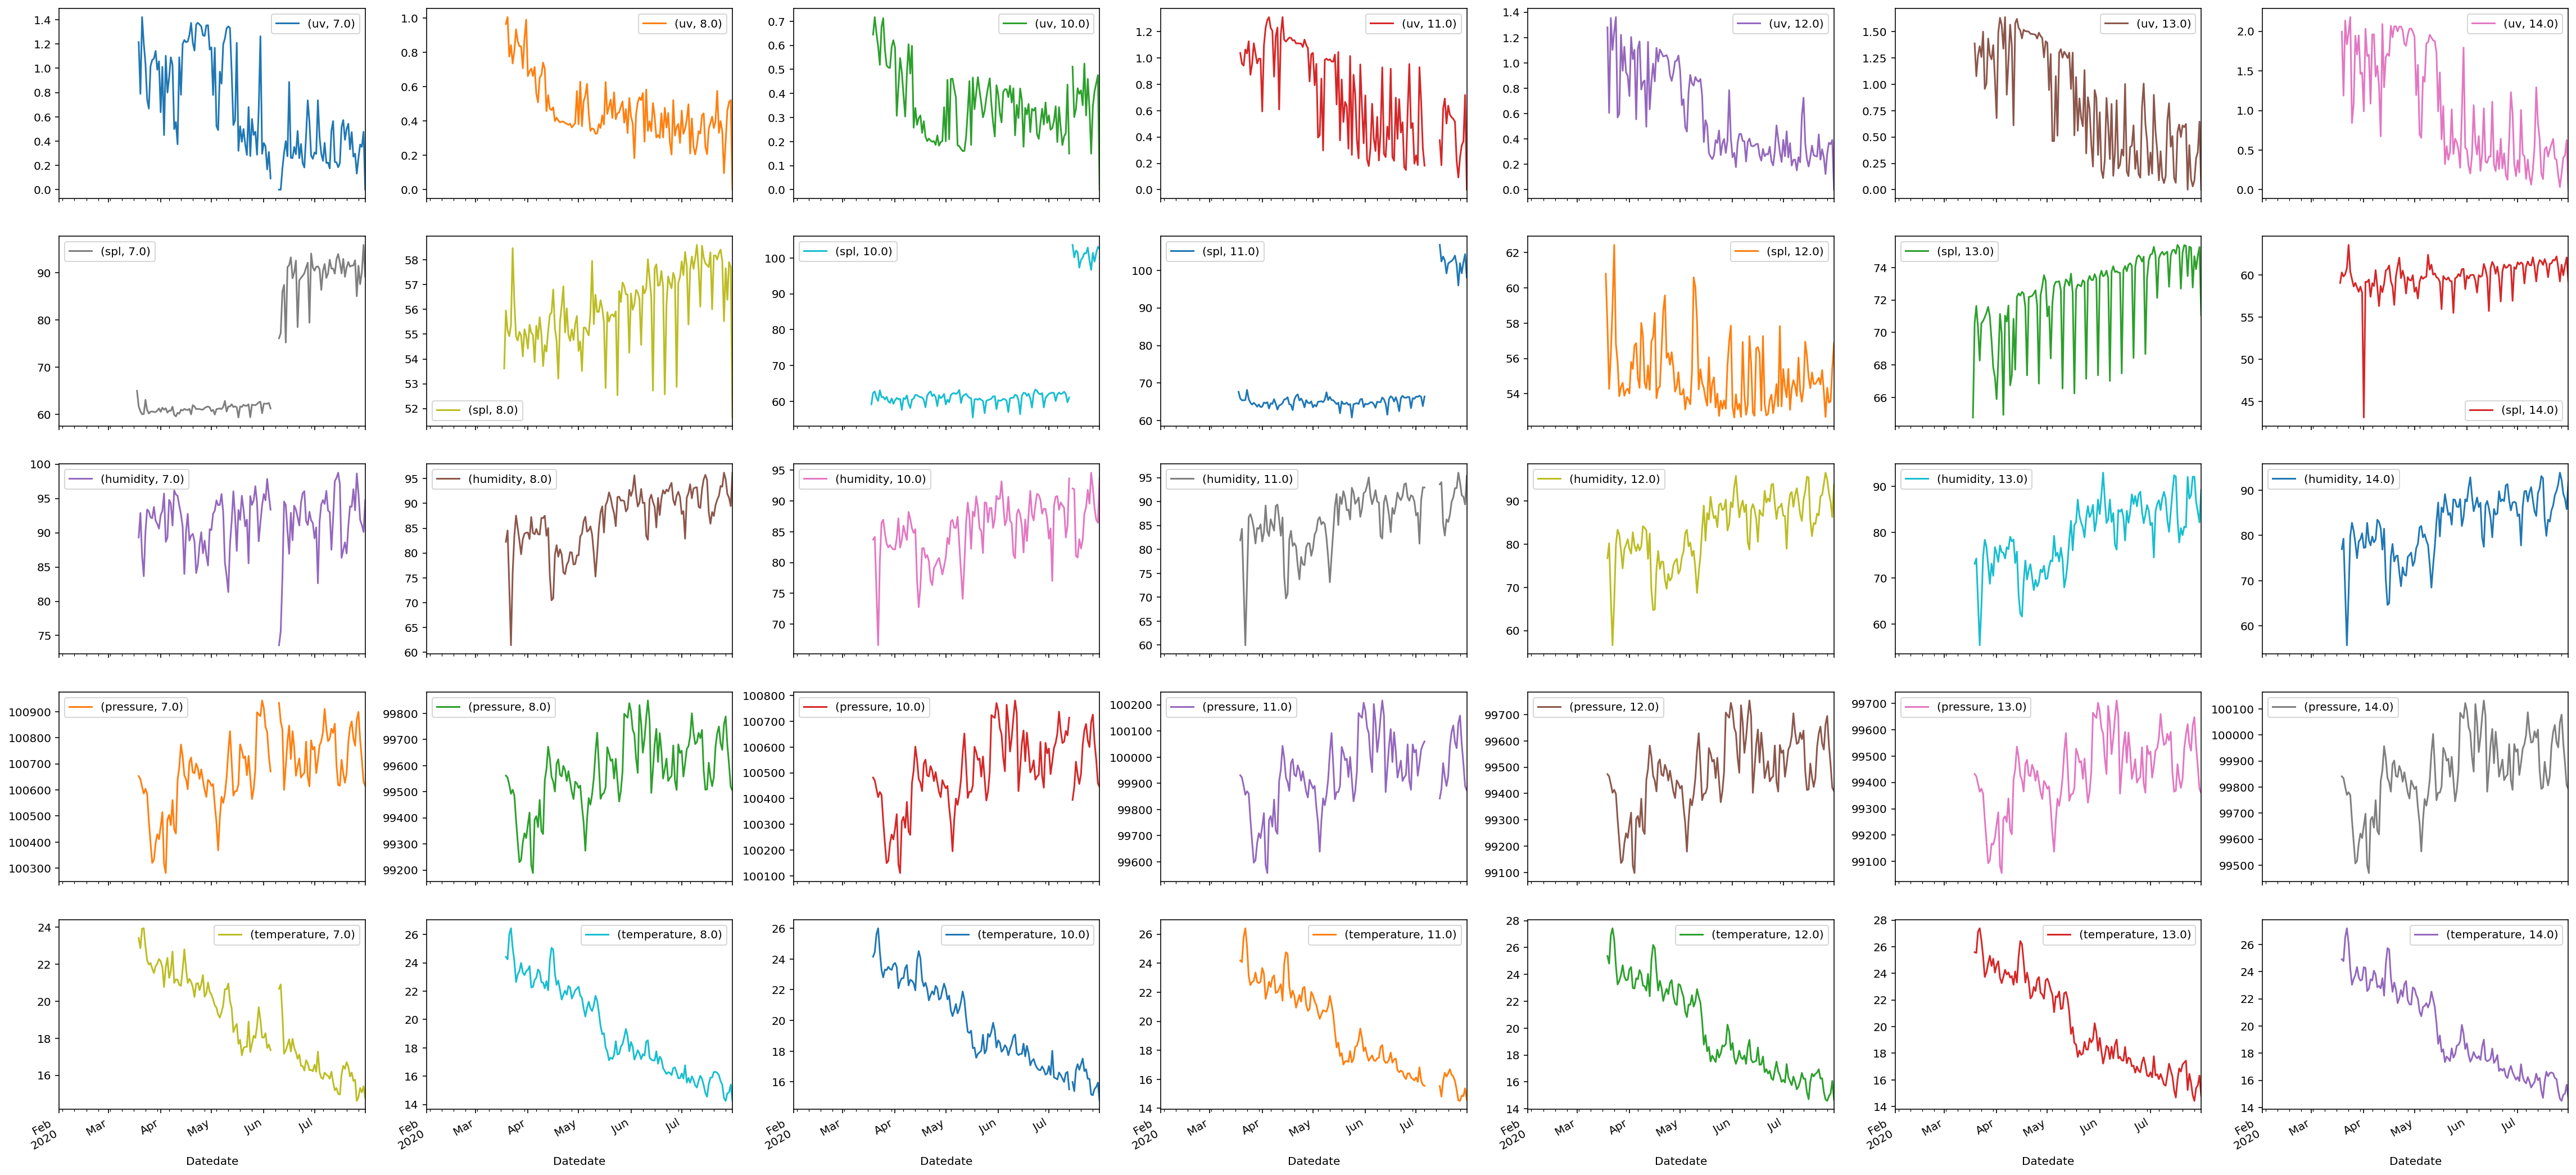

In [ ]:
data_date.plot.line(subplots=True, figsize=(40,20), layout=(5,7))

In [ ]:
data.columns

Index(['timestamp', 'id', 'CO', 'H2S', 'NO2', 'O3', 'PM25', 'PM10', 'SO2',
       'lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature', 'Datedate', 'DateMonth'],
      dtype='object')

In [ ]:
#Creating the dataset for Meteorological Evaluation
met_cols = [ 'timestamp','lat', 'lon', 'qhawax_id', 'uv', 'spl', 
                       'humidity', 'pressure', 'temperature','PM25','O3','NO2']
met_data = data[met_cols]
print(met_data.head())
##Dataframe to Plot Met, ID vs Time
#met_data = met_data.groupby(['Datedate','qhawax_id']).mean().unstack()
#Checking for the nature of missingness
#msno.matrix(met_data)

            timestamp  lat  lon  qhawax_id  ...  temperature  PM25  O3  NO2
0 2020-02-01 00:00:00  NaN  NaN        NaN  ...          NaN   NaN NaN  NaN
1 2020-02-01 01:00:00  NaN  NaN        NaN  ...          NaN   NaN NaN  NaN
2 2020-02-01 02:00:00  NaN  NaN        NaN  ...          NaN   NaN NaN  NaN
3 2020-02-01 03:00:00  NaN  NaN        NaN  ...          NaN   NaN NaN  NaN
4 2020-02-01 04:00:00  NaN  NaN        NaN  ...          NaN   NaN NaN  NaN

[5 rows x 12 columns]


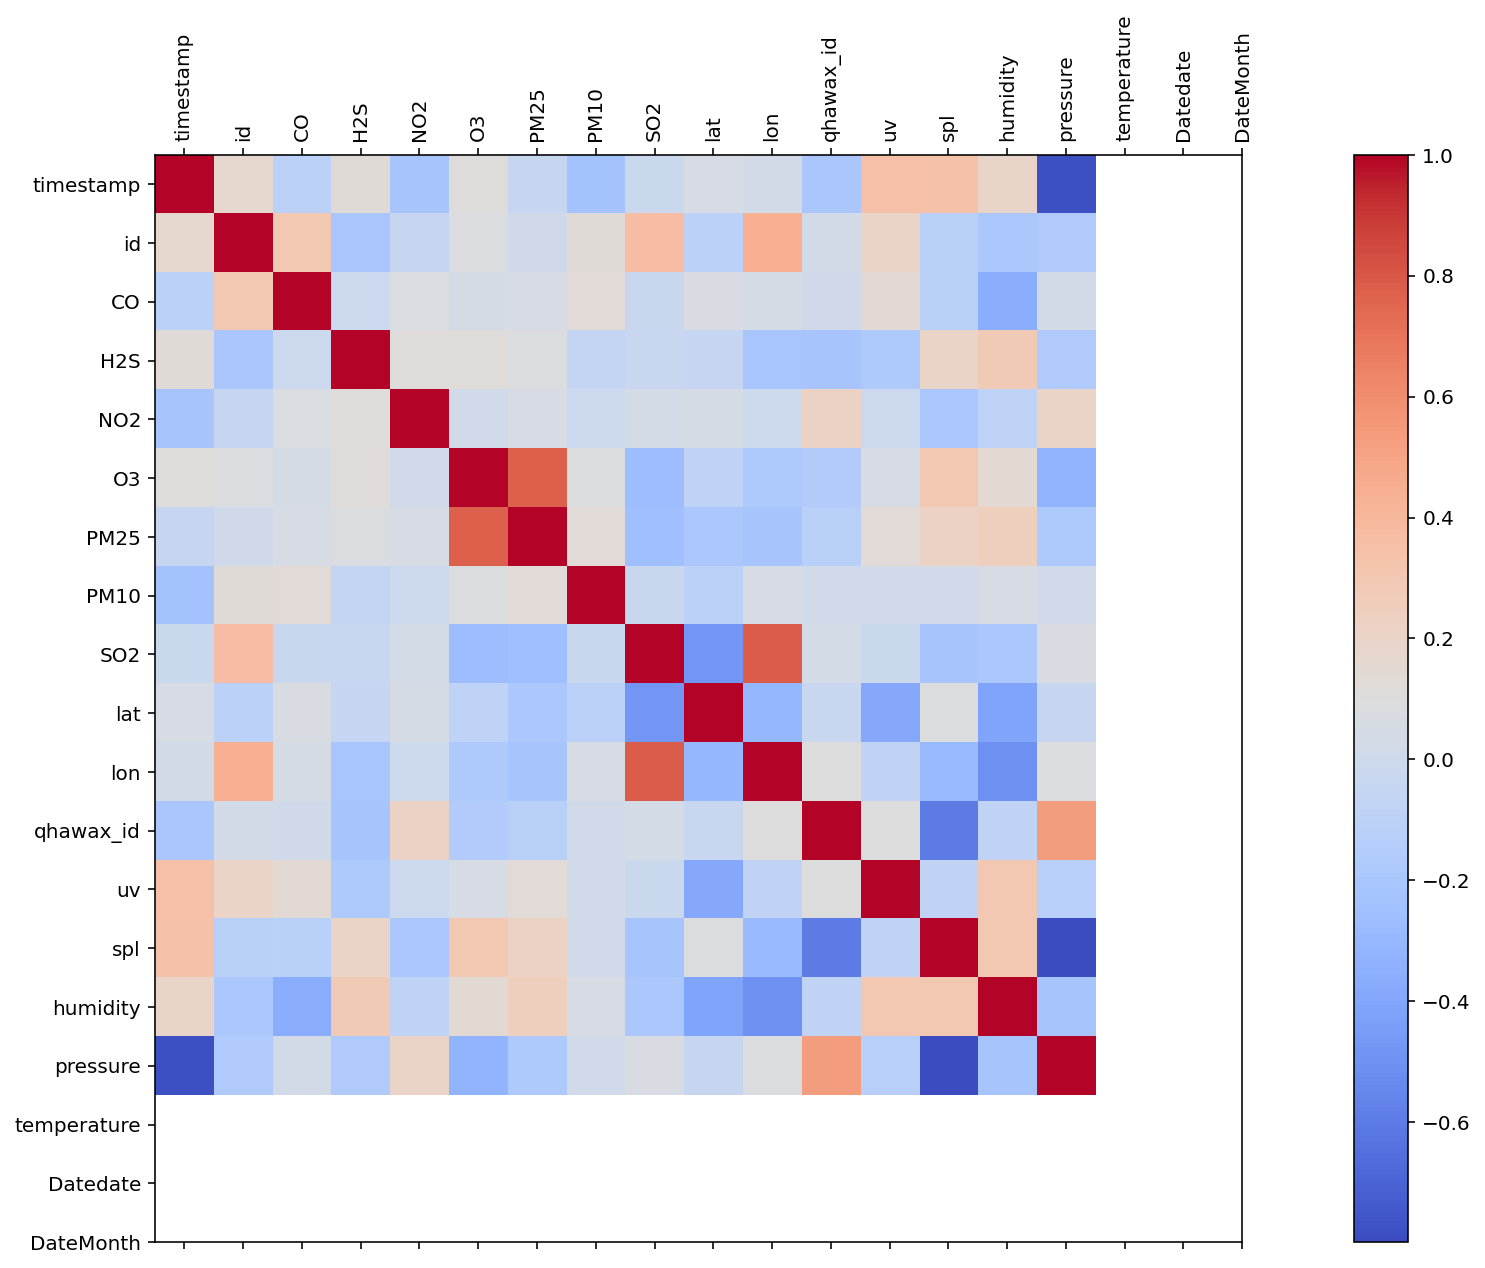

In [ ]:
#Considering PM2.5 & NO2 for deeper analysis
#Checking for correlation 
corr = data.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm')#, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()


#Checking for Correlation between Met Factors

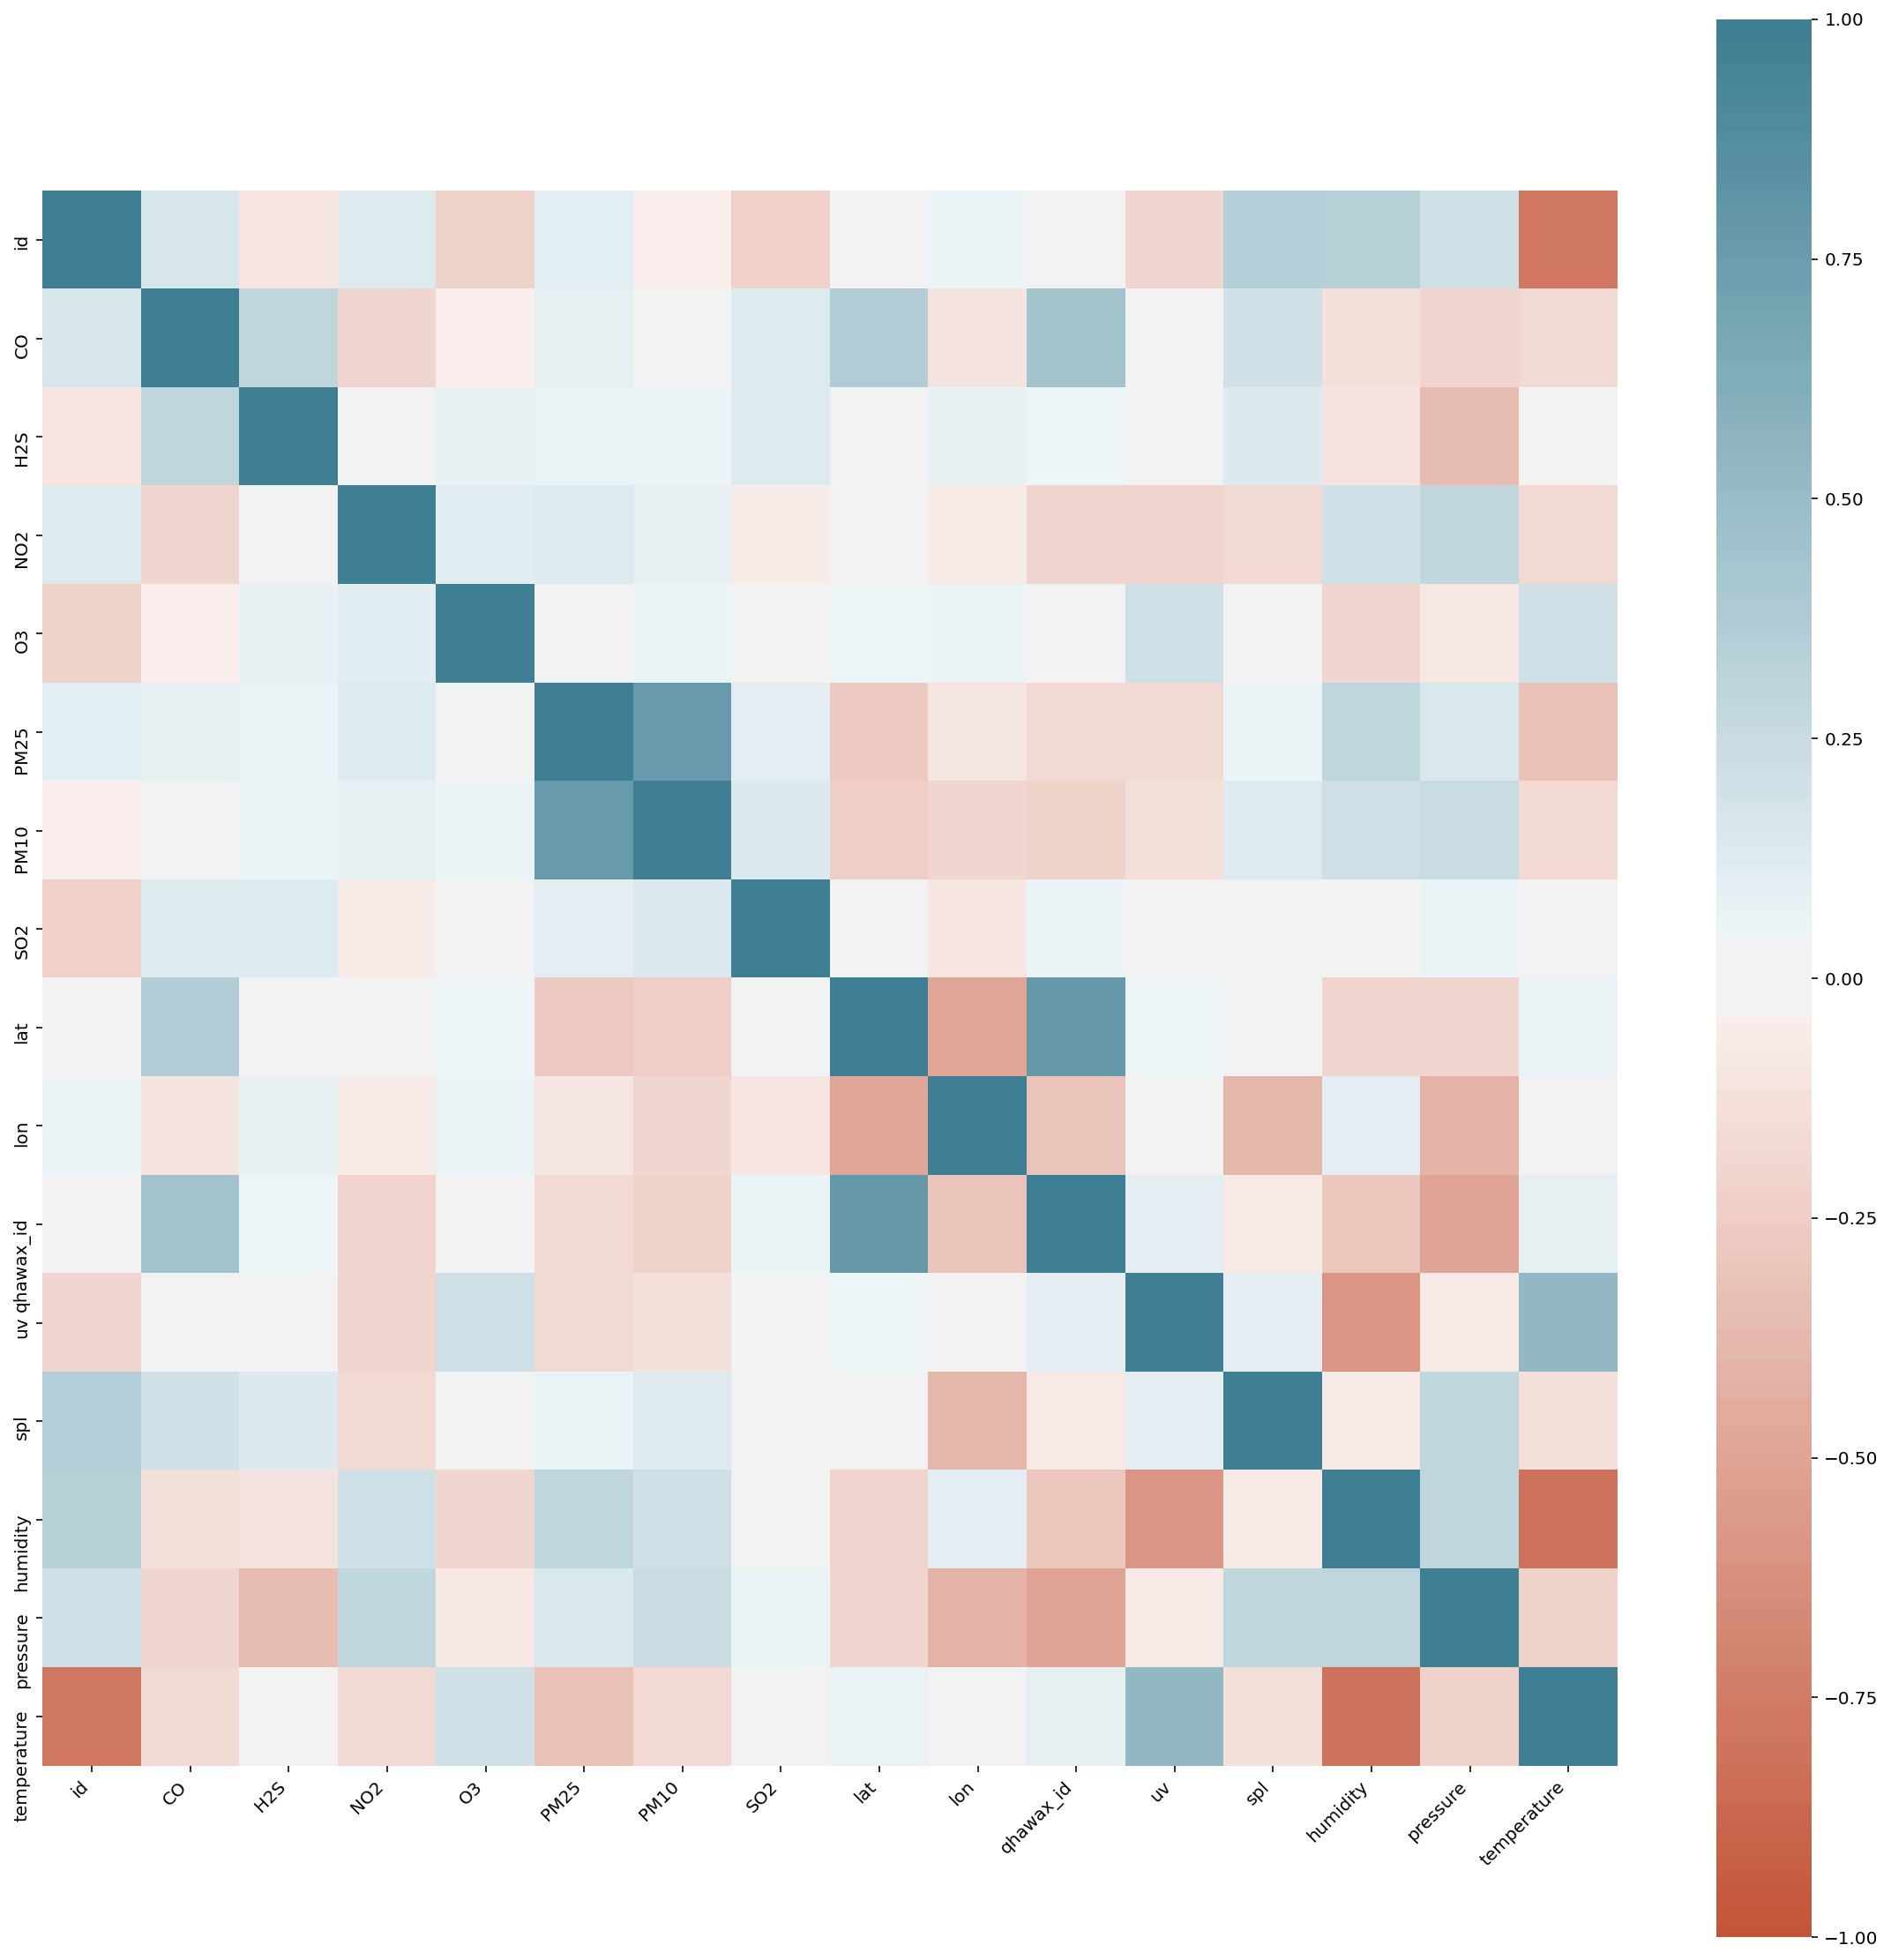

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,20)) 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

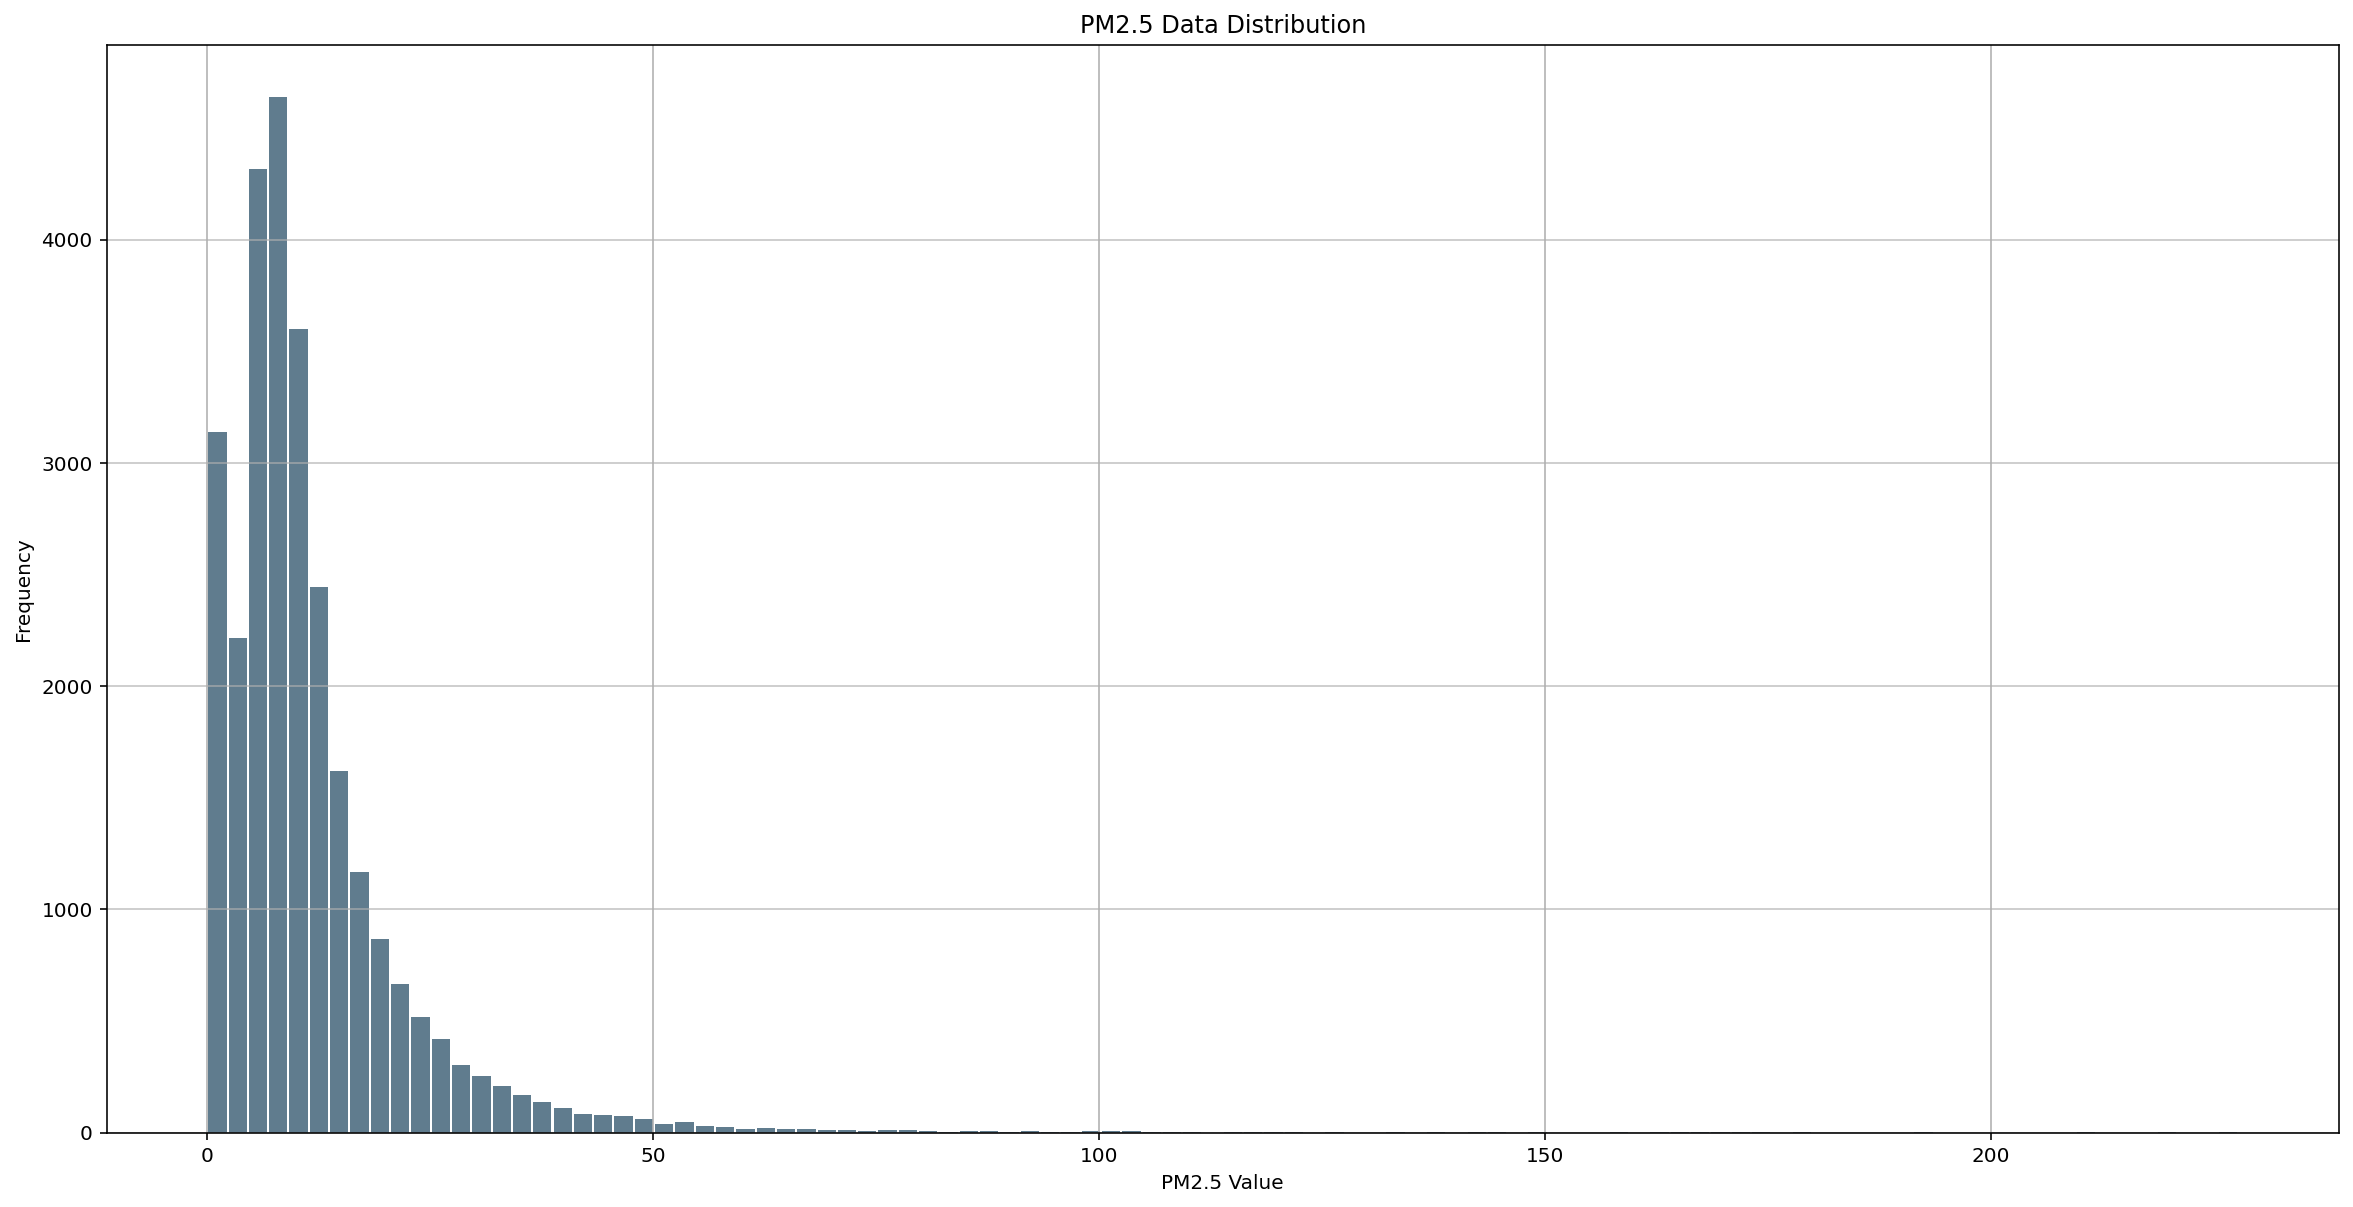

In [ ]:
size, scale = 1000, 10
plt.figure(figsize=(20,10))
data.PM25.plot.hist(grid=True, bins=100, rwidth=0.9,
                    color='#607c8e')
plt.title('PM2.5 Data Distribution')
plt.xlabel('PM2.5 Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

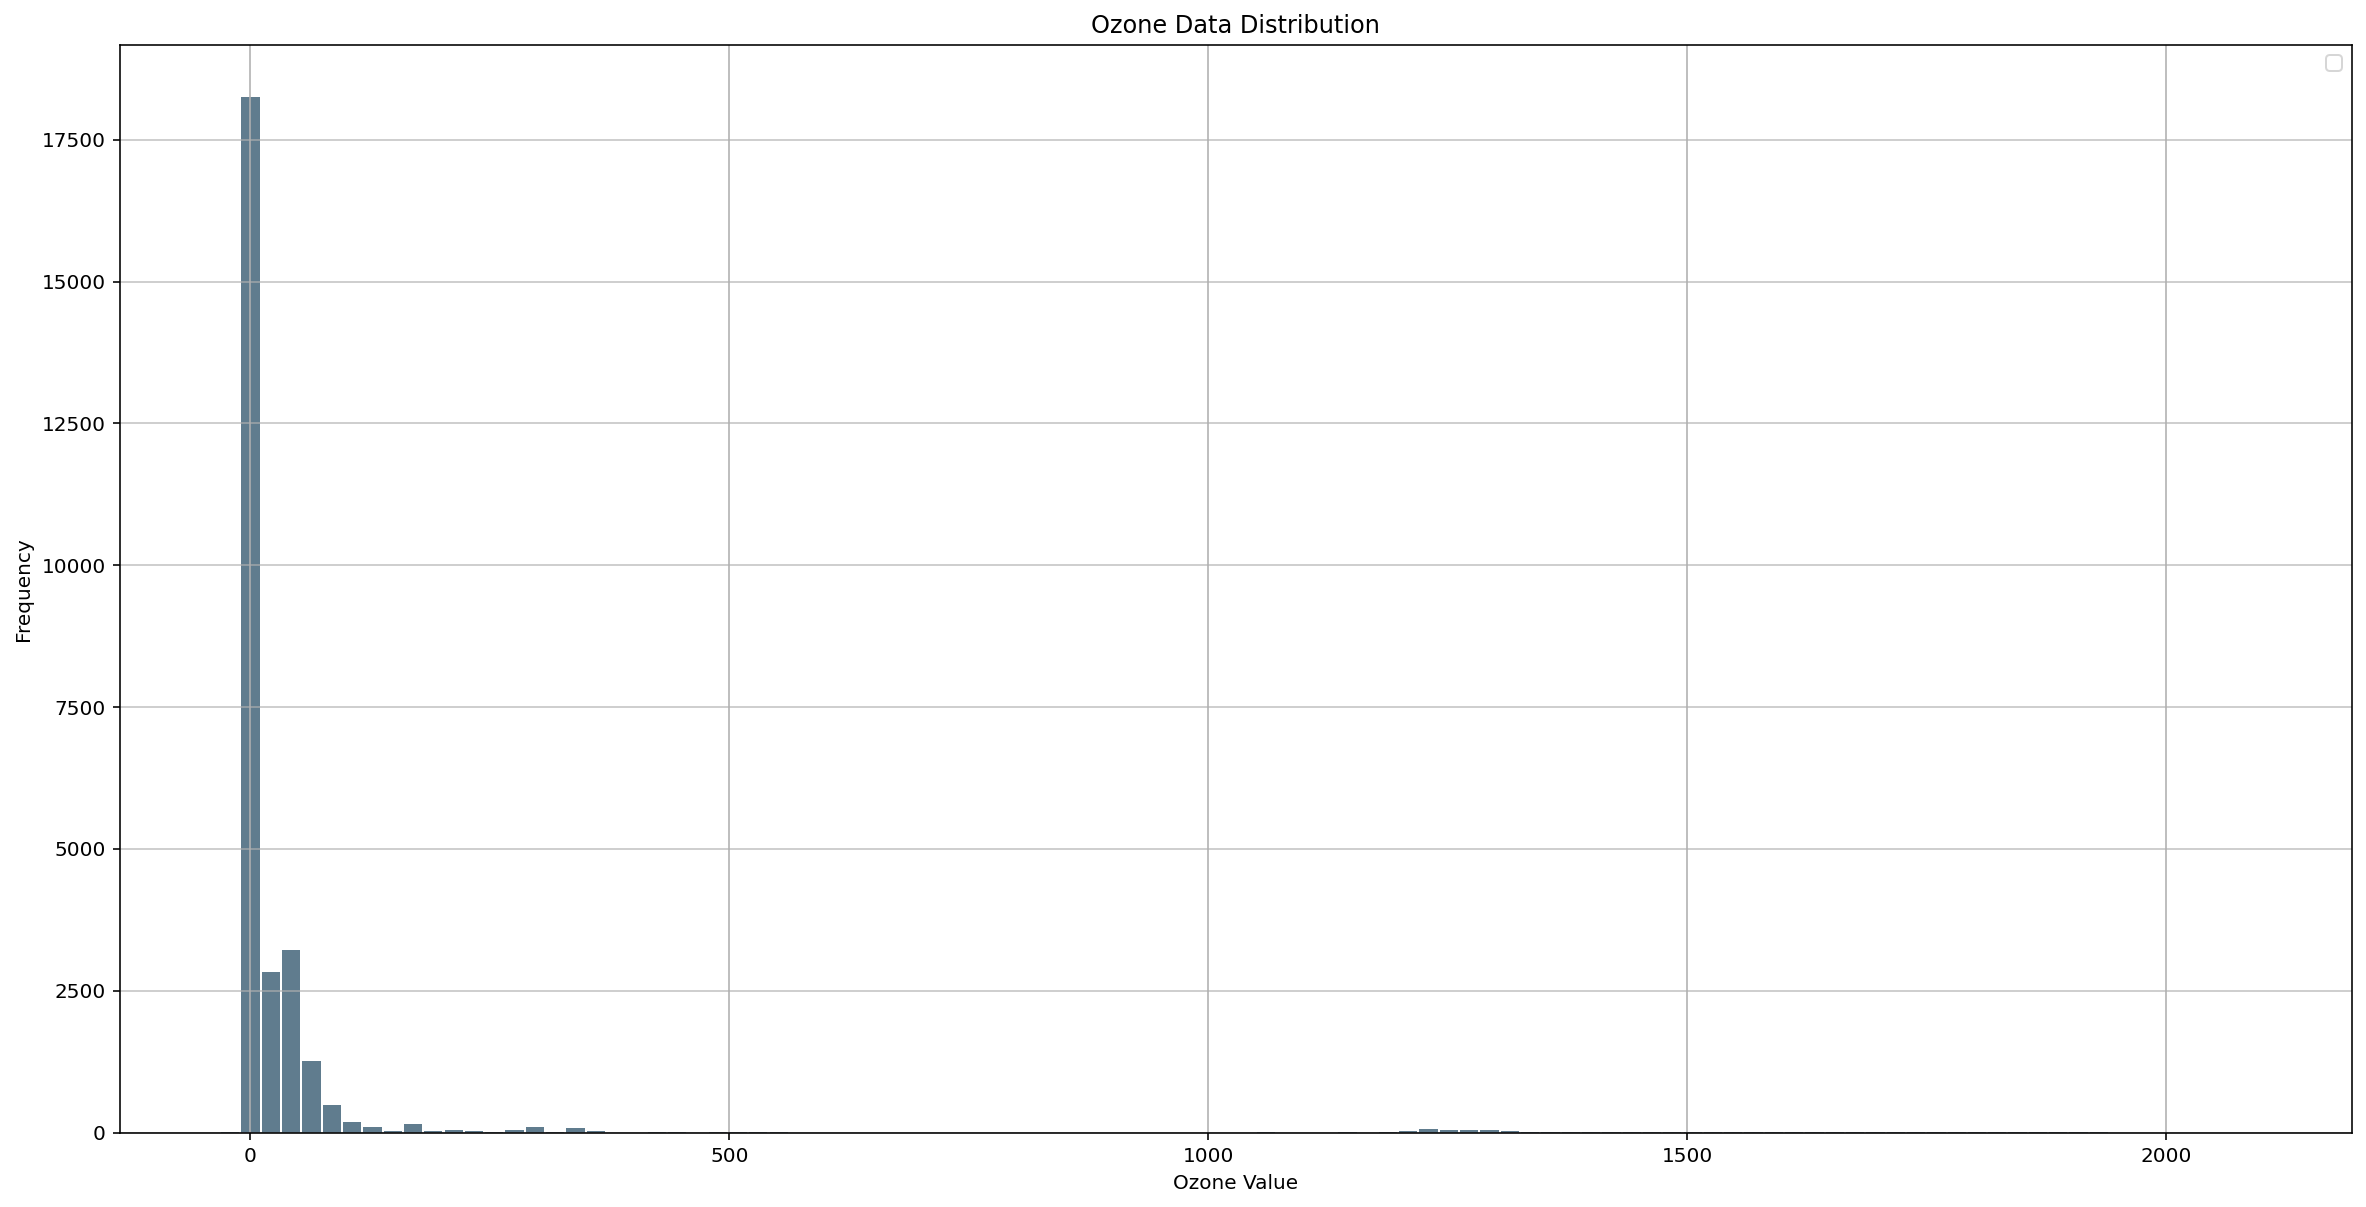

In [ ]:
size, scale = 1000, 10
plt.figure(figsize=(20,10))
data.O3.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Ozone Data Distribution')
plt.xlabel('Ozone Value')
plt.ylabel('Frequency')
plt.legend("")
plt.grid(axis='y', alpha=0.75)

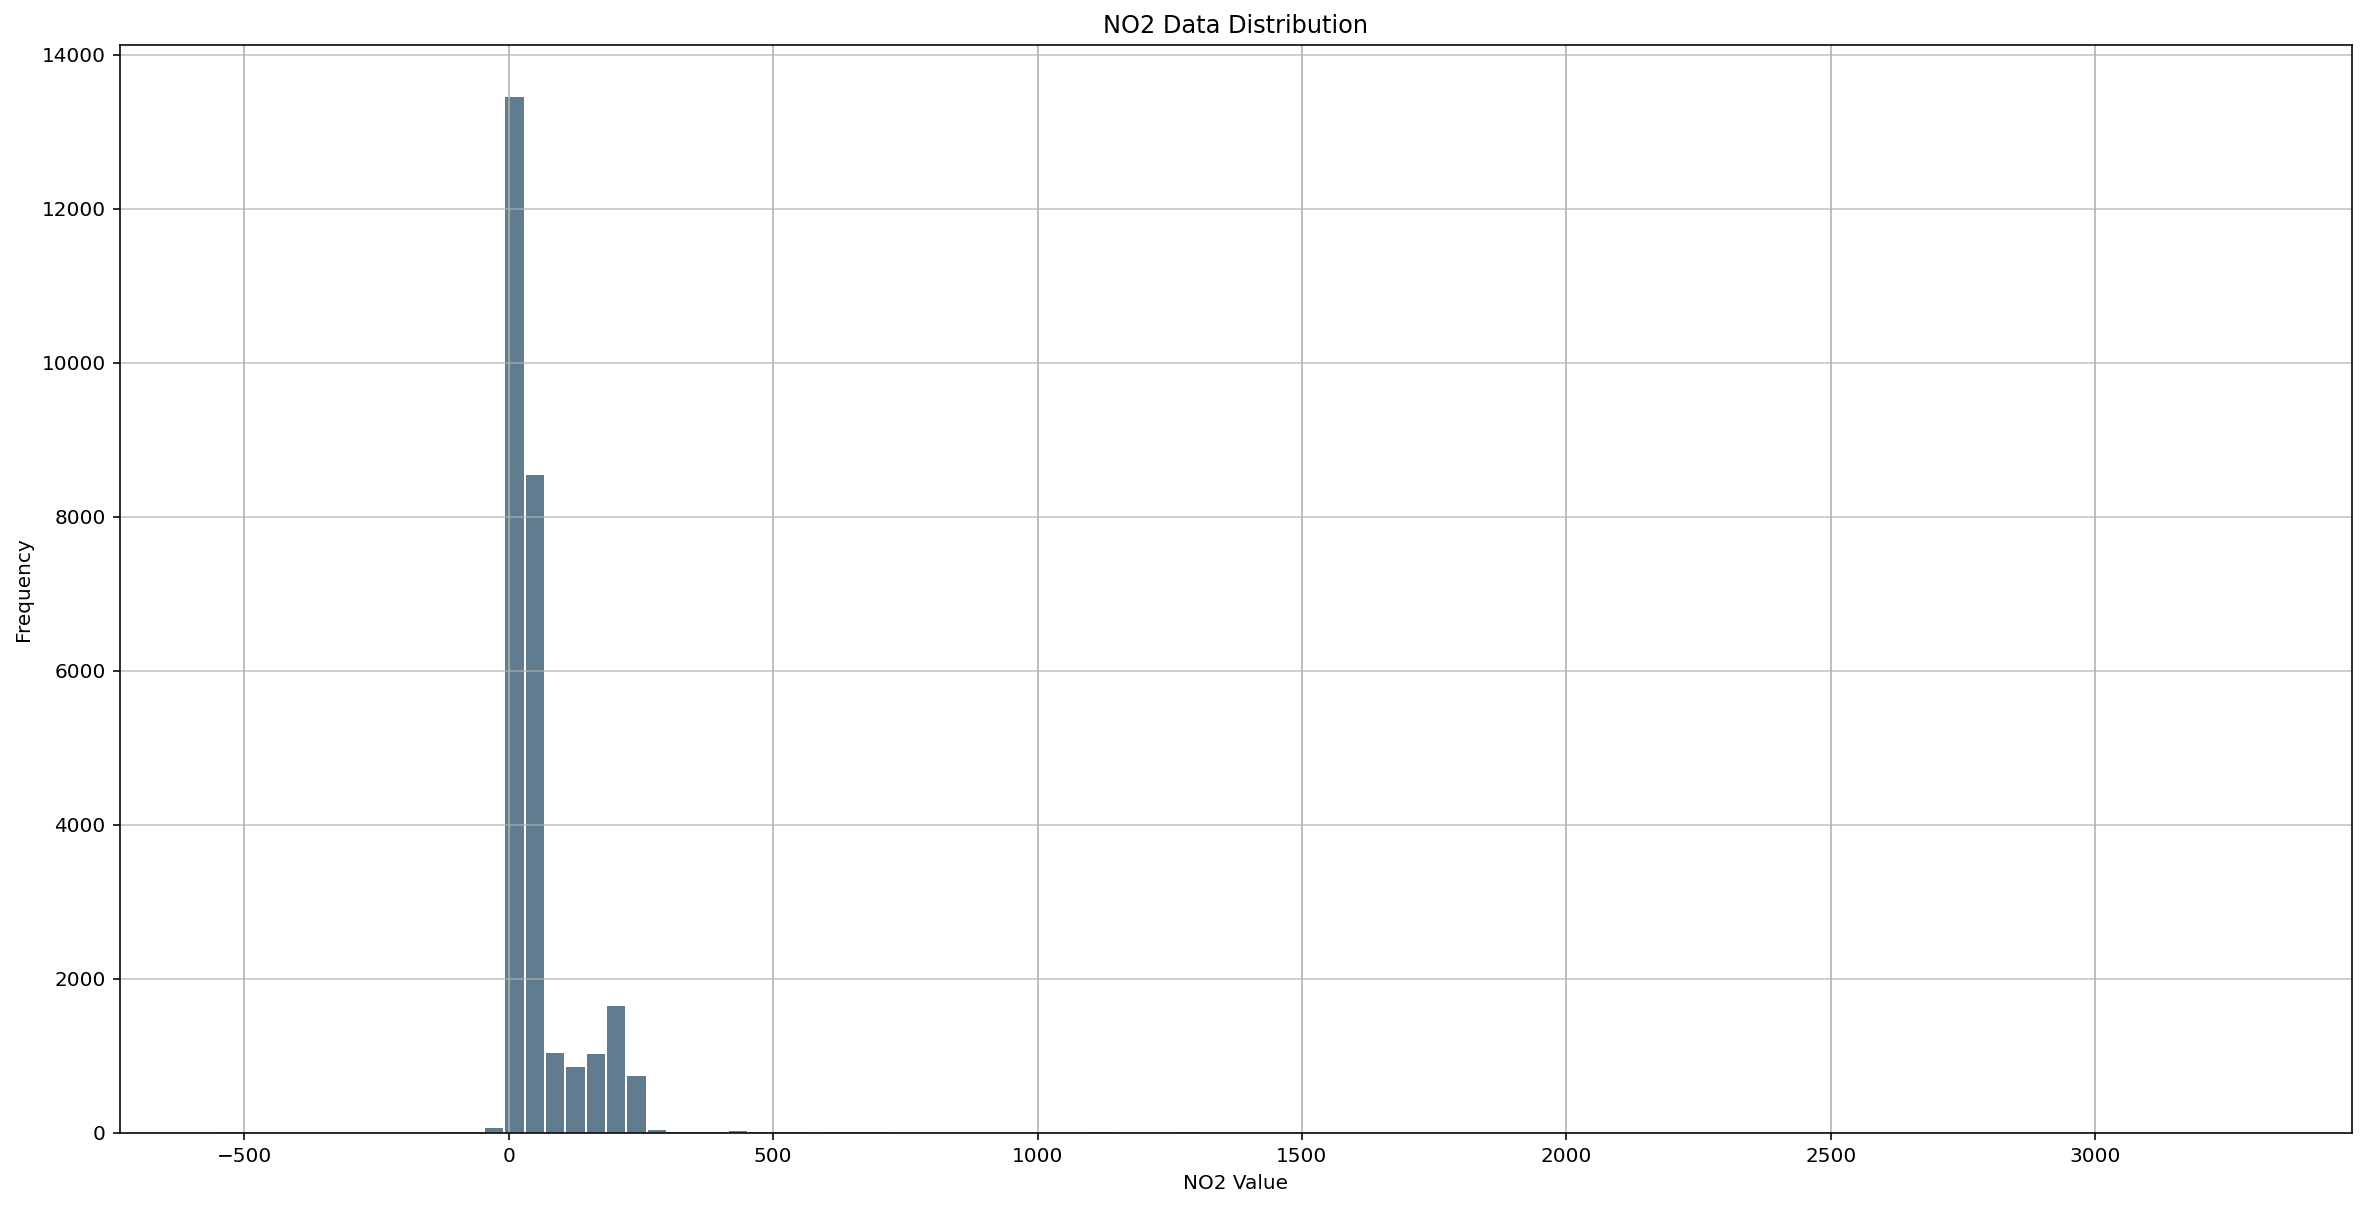

In [ ]:
size, scale = 1000, 10
plt.figure(figsize=(20,10))
data.NO2.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('NO2 Data Distribution')
plt.xlabel('NO2 Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Abnormalities and Interpretabilty

1.    Any abnormalities in the dataset?
    - The uniform Missingness 
2.    How do we make this data relevant and usable?
    - Need to combine the temporal and spatial data


In [ ]:
#Loading the Data
data1_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh007_unicef.csv')
data2_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh008_unicef.csv')
data3_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh010_unicef.csv')
data4_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh011_unicef.csv')
data5_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh012_unicef.csv')
data6_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh013_unicef.csv')
data7_temp = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh014_unicef.csv')


In [ ]:
# data1_temp['timestamp'][data1_temp.groupby('timestamp').count() > 1]

In [ ]:
# data1_temp.timestamp[data1_temp.groupby('timestamp')['timestamp'].count() > 1]

In [ ]:
type(data1_temp.groupby('timestamp')['timestamp'].count() > 1)

pandas.core.series.Series

In [ ]:
data1_temp.columns

Index(['id', 'timestamp', 'CO', 'H2S', 'NO2', 'O3', 'PM25', 'PM10', 'SO2',
       'lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature'],
      dtype='object')

In [ ]:
data1_temp[data1_temp['id'].groupby('timestamp').count() > 1]

KeyError: ignored

In [ ]:
data1_temp[data1_temp['O3'] == 0].count()

id             2112
timestamp      2112
CO             2112
H2S            2112
NO2            2112
O3             2112
PM25           2112
PM10           2112
SO2            2112
lat            2112
lon            2112
qhawax_id      2112
uv             2098
spl            2098
humidity       2098
pressure       2098
temperature    2098
dtype: int64

In [ ]:
station_temp = [data1_temp,data2_temp,data3_temp,data4_temp,data5_temp,data6_temp,data7_temp]
def dup_rows(stations):
    for i in stations:
        duplicateRowsDF = i[i.duplicated(['timestamp'])]
        print(duplicateRowsDF[['id','timestamp','qhawax_id']])
dup_rows(station_temp)

         id      timestamp  qhawax_id
46     1400   2/4/20 10:00          7
47     1404   2/4/20 10:00          7
48     1408   2/4/20 10:00          7
49     1412   2/4/20 10:00          7
56     1448   2/4/20 16:00          7
63     1460   2/4/20 22:00          7
65     1472   2/4/20 23:00          7
250    2801  2/20/20 13:00          7
253    2807  2/20/20 15:00          7
254    2809  2/20/20 15:00          7
255    2812  2/20/20 15:00          7
256    2816  2/20/20 15:00          7
257    2820  2/20/20 15:00          7
258    2824  2/20/20 15:00          7
259    2828  2/20/20 15:00          7
1368  25700   4/7/20 00:00          7
2415  26000  5/20/20 14:00          7
      id     timestamp  qhawax_id
83  1461  2/4/20 22:00          8
85  1473  2/4/20 23:00          8
      id     timestamp  qhawax_id
74  1402  2/4/20 10:00         10
75  1406  2/4/20 10:00         10
76  1410  2/4/20 10:00         10
77  1414  2/4/20 10:00         10
84  1451  2/4/20 16:00         10
86  1463  

In [ ]:
data2_temp[83:85]

,id,timestamp,CO,H2S,NO2,O3,PM25,PM10,SO2,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature
83,1461,2/4/20 22:00,564.453,22.379,219.861,41.600,42.026,136.256,7.874,-12.072736,-77.082687,8,NaN,NaN,NaN,NaN,NaN
84,1467,2/4/20 23:00,559.863,21.676,220.793,41.685,41.803,134.255,7.203,-12.072736,-77.082687,8,NaN,NaN,NaN,NaN,NaN


In [ ]:
#PlumeLabs Analysis
station_list_plume=[data8,data9,data10,data11,data12,data13,data14,data15,data16]

In [ ]:
#Debugging
data8 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17361_LIMA.csv')
data9 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17362_LIMA.csv')
data10 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17363_LIMA.csv')
data11 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17364_LIMA.csv')
data12 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17365_LIMA.csv')
data13 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17366_LIMA.csv')
data14 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17367_LIMA.csv')
data15 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17368_LIMA.csv')
data16 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/PlumeLabs_Peru/17369_LIMA.csv')


In [ ]:
data8.rename(columns={"datetime": "timestamp"}, inplace=True)
data8["timestamp"] = pd.to_datetime(data8.timestamp)
data8.set_index('timestamp', inplace=True)
data8.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,NaN,NaN,NaN,NaN,472.5
2019-05-13 16:00:00,NaN,NaN,NaN,NaN,428.0
2019-05-13 17:00:00,NaN,NaN,NaN,NaN,219.0
2019-05-13 18:00:00,NaN,NaN,NaN,NaN,138.4
2019-05-13 19:00:00,NaN,NaN,NaN,NaN,134.3


In [ ]:
data9.rename(columns={"datetime": "timestamp"}, inplace=True)
data9["timestamp"] = pd.to_datetime(data9.timestamp)
data9.set_index('timestamp', inplace=True)
data9.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-15 18:00:00,42.7,20.4,NaN,NaN,NaN
2019-05-15 19:00:00,113.9,32.5,89.1,326.2,NaN
2019-05-15 20:00:00,106.1,13.3,89.4,NaN,NaN
2019-05-16 19:00:00,147.2,NaN,95.9,29.6,NaN
2019-05-16 20:00:00,104.4,NaN,93.4,24.9,NaN


In [ ]:
data10.rename(columns={"datetime": "timestamp"}, inplace=True)
data10["timestamp"] = pd.to_datetime(data10.timestamp)
data10.set_index('timestamp', inplace=True)
data10.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,104.6,15.9,38.0,64.1,NaN
2019-05-13 16:00:00,154.8,32.6,43.5,49.2,NaN
2019-05-13 17:00:00,154.9,44.9,41.2,54.2,NaN
2019-05-13 18:00:00,100.3,82.8,65.6,46.8,NaN
2019-05-13 19:00:00,84.0,105.3,70.6,40.2,NaN


In [ ]:
data11.rename(columns={"datetime": "timestamp"}, inplace=True)
data11["timestamp"] = pd.to_datetime(data11.timestamp)
data11.set_index('timestamp', inplace=True)
data11.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,NaN,1.3,16.3,0.6,143.3
2019-05-13 16:00:00,NaN,4.9,15.1,0.6,181.1
2019-05-13 17:00:00,NaN,21.2,13.5,0.6,158.1
2019-05-13 18:00:00,NaN,45.6,18.8,0.6,122.9
2019-05-13 19:00:00,NaN,61.3,12.9,0.6,83.9


In [ ]:
data12.rename(columns={"datetime": "timestamp"}, inplace=True)
data12["timestamp"] = pd.to_datetime(data12.timestamp)
data12.set_index('timestamp', inplace=True)
data12.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-08-14 23:00:00,107.0,NaN,137.3,736.0,NaN
2019-08-15 00:00:00,93.5,NaN,124.9,NaN,NaN
2019-08-15 01:00:00,110.8,NaN,113.8,NaN,NaN
2019-08-15 02:00:00,138.2,NaN,111.7,NaN,NaN
2019-08-15 03:00:00,133.1,NaN,101.8,NaN,NaN


In [ ]:
data13.rename(columns={"datetime": "timestamp"}, inplace=True)
data13["timestamp"] = pd.to_datetime(data13.timestamp)
data13.set_index('timestamp', inplace=True)
data13.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-08-15 17:00:00,2.4,NaN,13.5,NaN,NaN
2019-08-15 18:00:00,26.7,6.2,23.3,NaN,NaN
2019-08-15 19:00:00,48.5,NaN,10.8,33.2,28.8
2019-08-15 20:00:00,44.3,NaN,10.9,85.0,NaN
2019-08-15 21:00:00,34.3,NaN,12.2,43.4,NaN


In [ ]:
data14.rename(columns={"datetime": "timestamp"}, inplace=True)
data14["timestamp"] = pd.to_datetime(data14.timestamp)
data14.set_index('timestamp', inplace=True)
data14.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,30.6,25.8,55.1,47.5,439.0
2019-05-13 16:00:00,34.3,27.8,58.8,57.6,416.9
2019-05-13 17:00:00,52.5,37.4,63.6,62.7,486.5
2019-05-13 18:00:00,36.4,65.7,74.4,67.2,335.9
2019-05-13 19:00:00,36.2,92.8,142.4,46.3,246.5


In [ ]:
data15.rename(columns={"datetime": "timestamp"}, inplace=True)
data15["timestamp"] = pd.to_datetime(data15.timestamp)
data15.set_index('timestamp', inplace=True)
data15.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,20.2,NaN,NaN,38.9,51.8
2019-05-13 16:00:00,22.6,NaN,NaN,45.0,64.2
2019-05-13 17:00:00,19.6,NaN,NaN,41.4,59.8
2019-05-13 18:00:00,17.9,NaN,NaN,31.8,50.2
2019-05-13 19:00:00,17.4,NaN,NaN,25.3,36.9


In [ ]:
data16.rename(columns={"datetime": "timestamp"}, inplace=True)
data16["timestamp"] = pd.to_datetime(data16.timestamp)
data16.set_index('timestamp', inplace=True)
data16.head()

,no2,o3,so2,pm2_5,pm10
timestamp,,,,,
2019-05-13 15:00:00,128.3,64.4,NaN,158.6,NaN
2019-05-13 16:00:00,144.1,92.9,NaN,87.1,NaN
2019-05-13 17:00:00,178.9,96.4,NaN,43.4,NaN
2019-05-13 18:00:00,97.3,153.6,NaN,28.0,NaN
2019-05-13 19:00:00,68.0,193.1,67.1,20.2,NaN


In [ ]:
type(data8.index[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
temp_time_long = pd.date_range('2019-05-13 00:00', '2020-7-31 23:00', freq='H')
temp_time_long = [i for i in temp_time_long]
time_df_long=pd.DataFrame(temp_time_long, columns=['timestamp'])
time_df_long.set_index('timestamp',inplace=True)

#Merge with the dataframes for stations
data8 = pd.merge(data8,time_df_long,left_index=True, right_index=True, how='outer')
data9 = pd.merge(data9,time_df_long,left_index=True, right_index=True, how='outer')
data10 = pd.merge(data10,time_df_long,left_index=True, right_index=True, how='outer')
data11 = pd.merge(data11,time_df_long,left_index=True, right_index=True, how='outer')
data12 = pd.merge(data12,time_df_long,left_index=True, right_index=True, how='outer')
data13 = pd.merge(data13,time_df_long,left_index=True, right_index=True, how='outer')
data14 = pd.merge(data14,time_df_long,left_index=True, right_index=True, how='outer')
data15 = pd.merge(data15,time_df_long,left_index=True, right_index=True, how='outer')
data16 = pd.merge(data16,time_df_long,left_index=True, right_index=True, how='outer')

print("Till 7/31:")
print("Plume: S1: ", len(data8))
print("Plume: S2: ", len(data9))
print("Plume: S3: ", len(data10))
print("Plume: S4: ", len(data11))
print("Plume: S5: ", len(data12))
print("Plume: S6: ", len(data13))
print("Plume: S7: ", len(data14))
print("Plume: S8: ", len(data15))
print("Plume: S9: ", len(data16))

Till 7/31:
Plume: S1:  11227
Plume: S2:  11323
Plume: S3:  11331
Plume: S4:  10704
Plume: S5:  10704
Plume: S6:  11390
Plume: S7:  10731
Plume: S8:  10714
Plume: S9:  10704


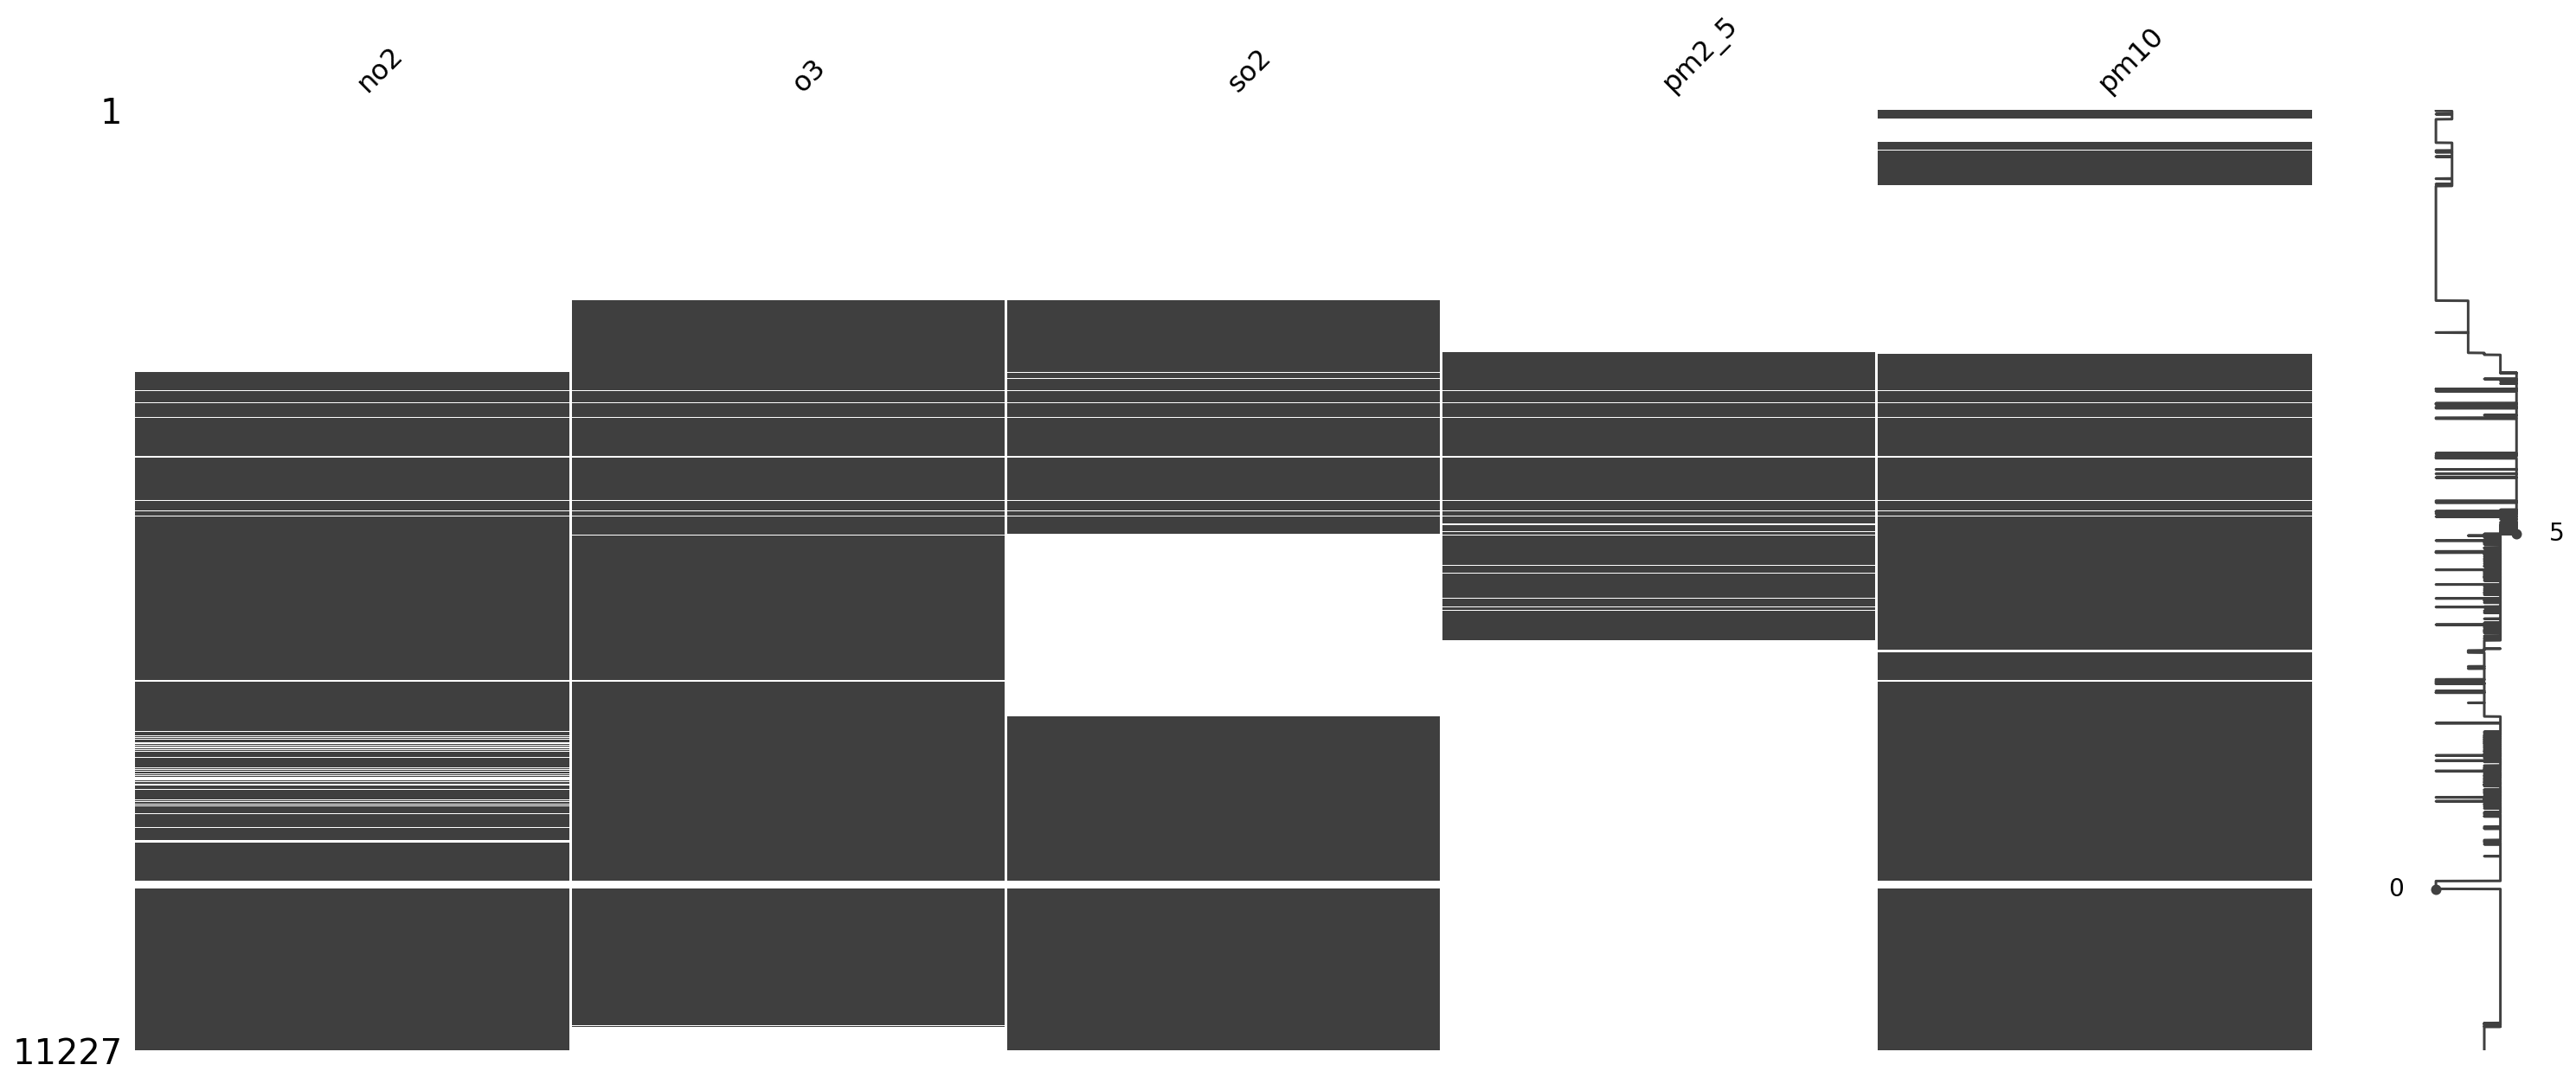

In [ ]:
msno.matrix(data8)

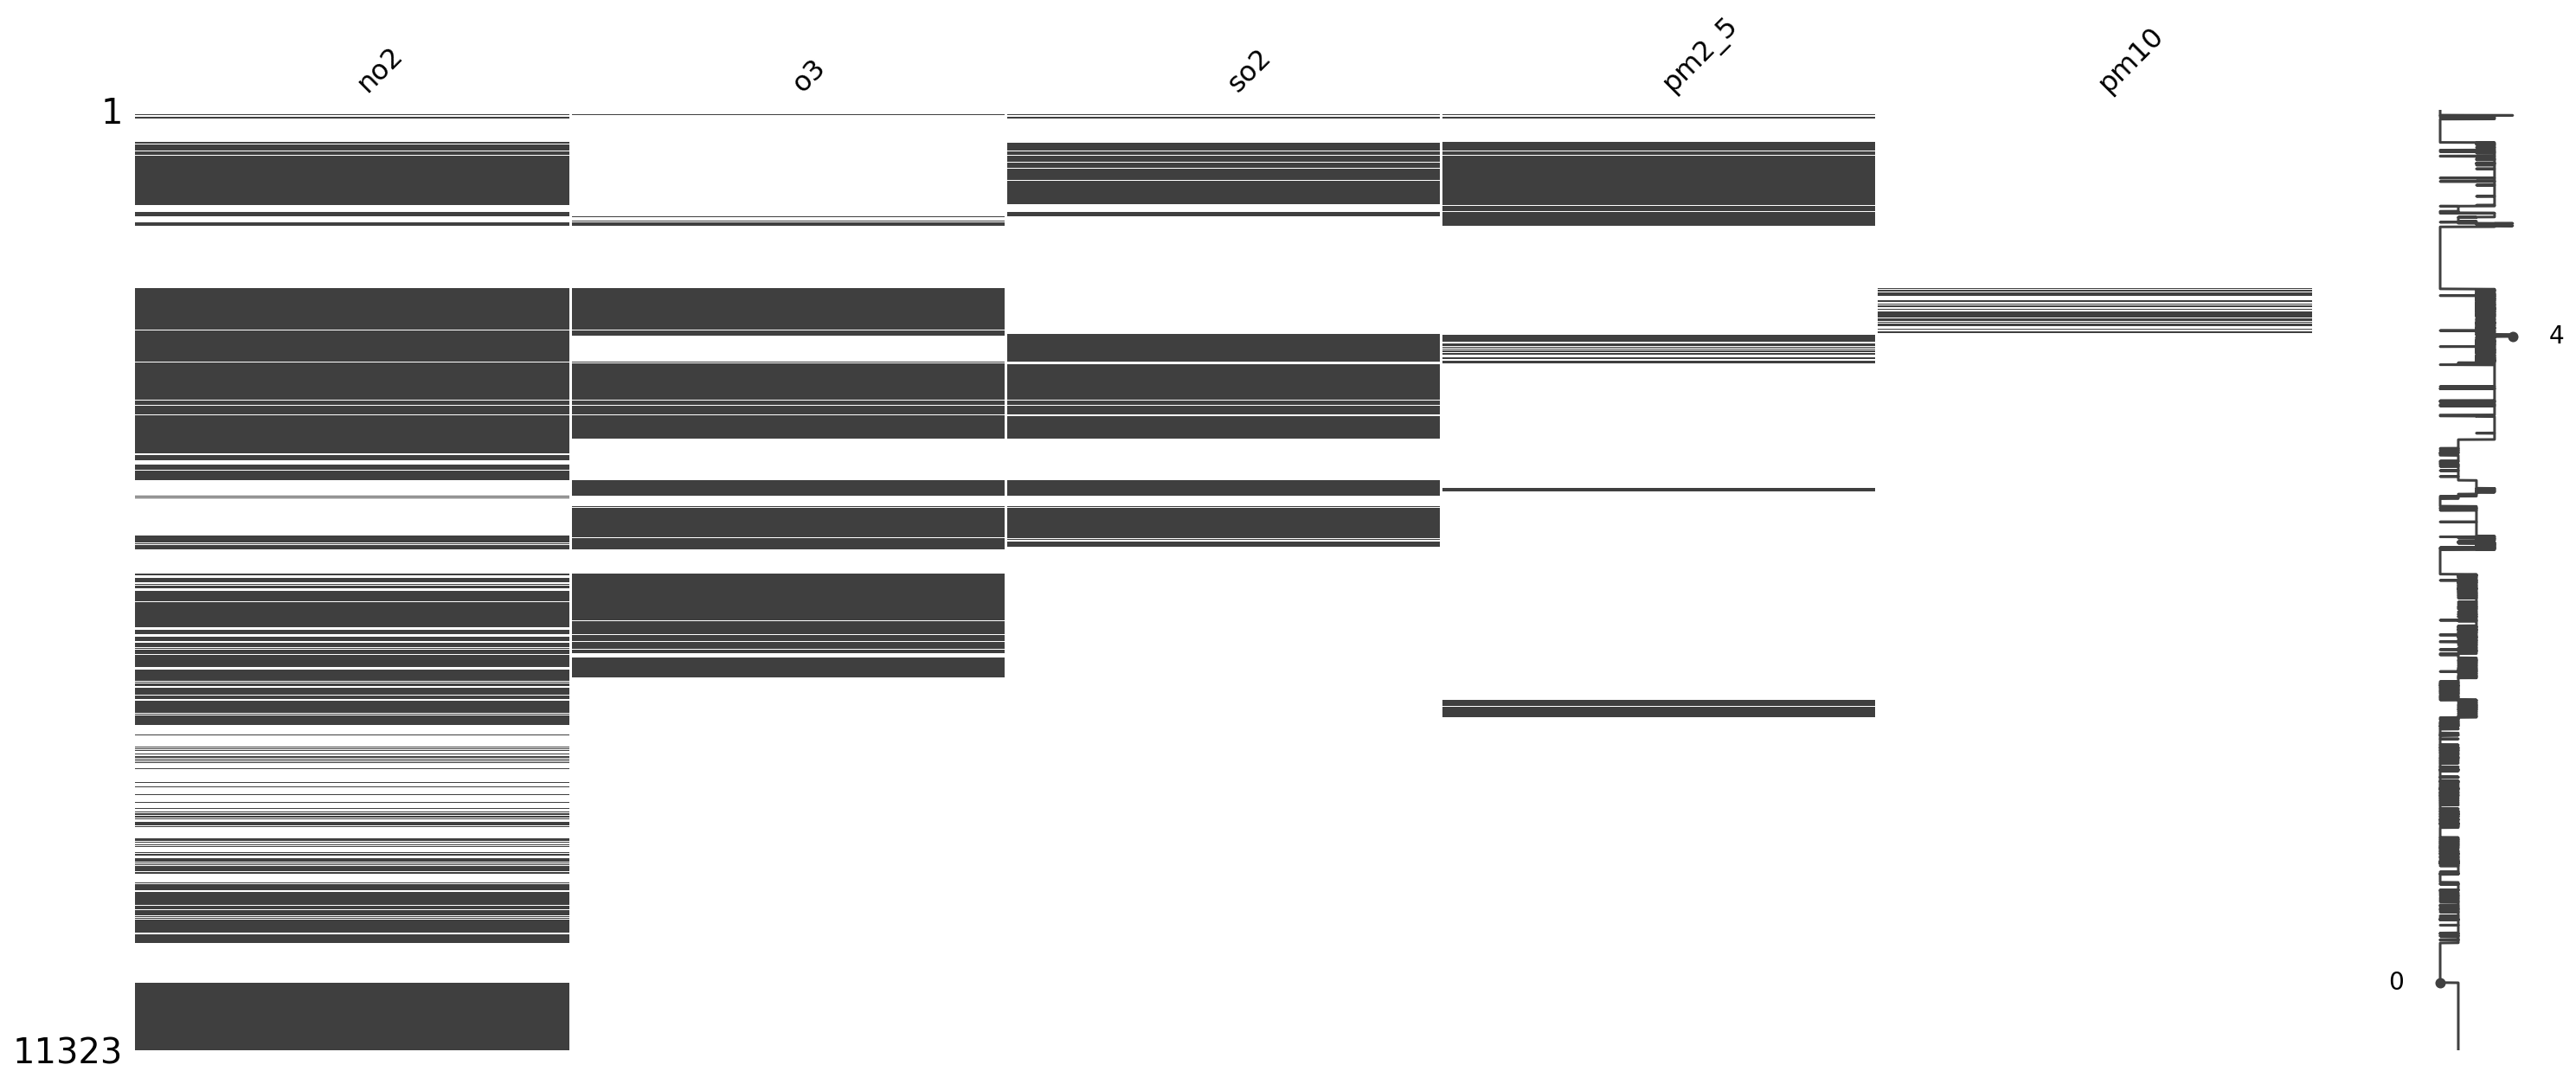

In [ ]:
msno.matrix(data9)

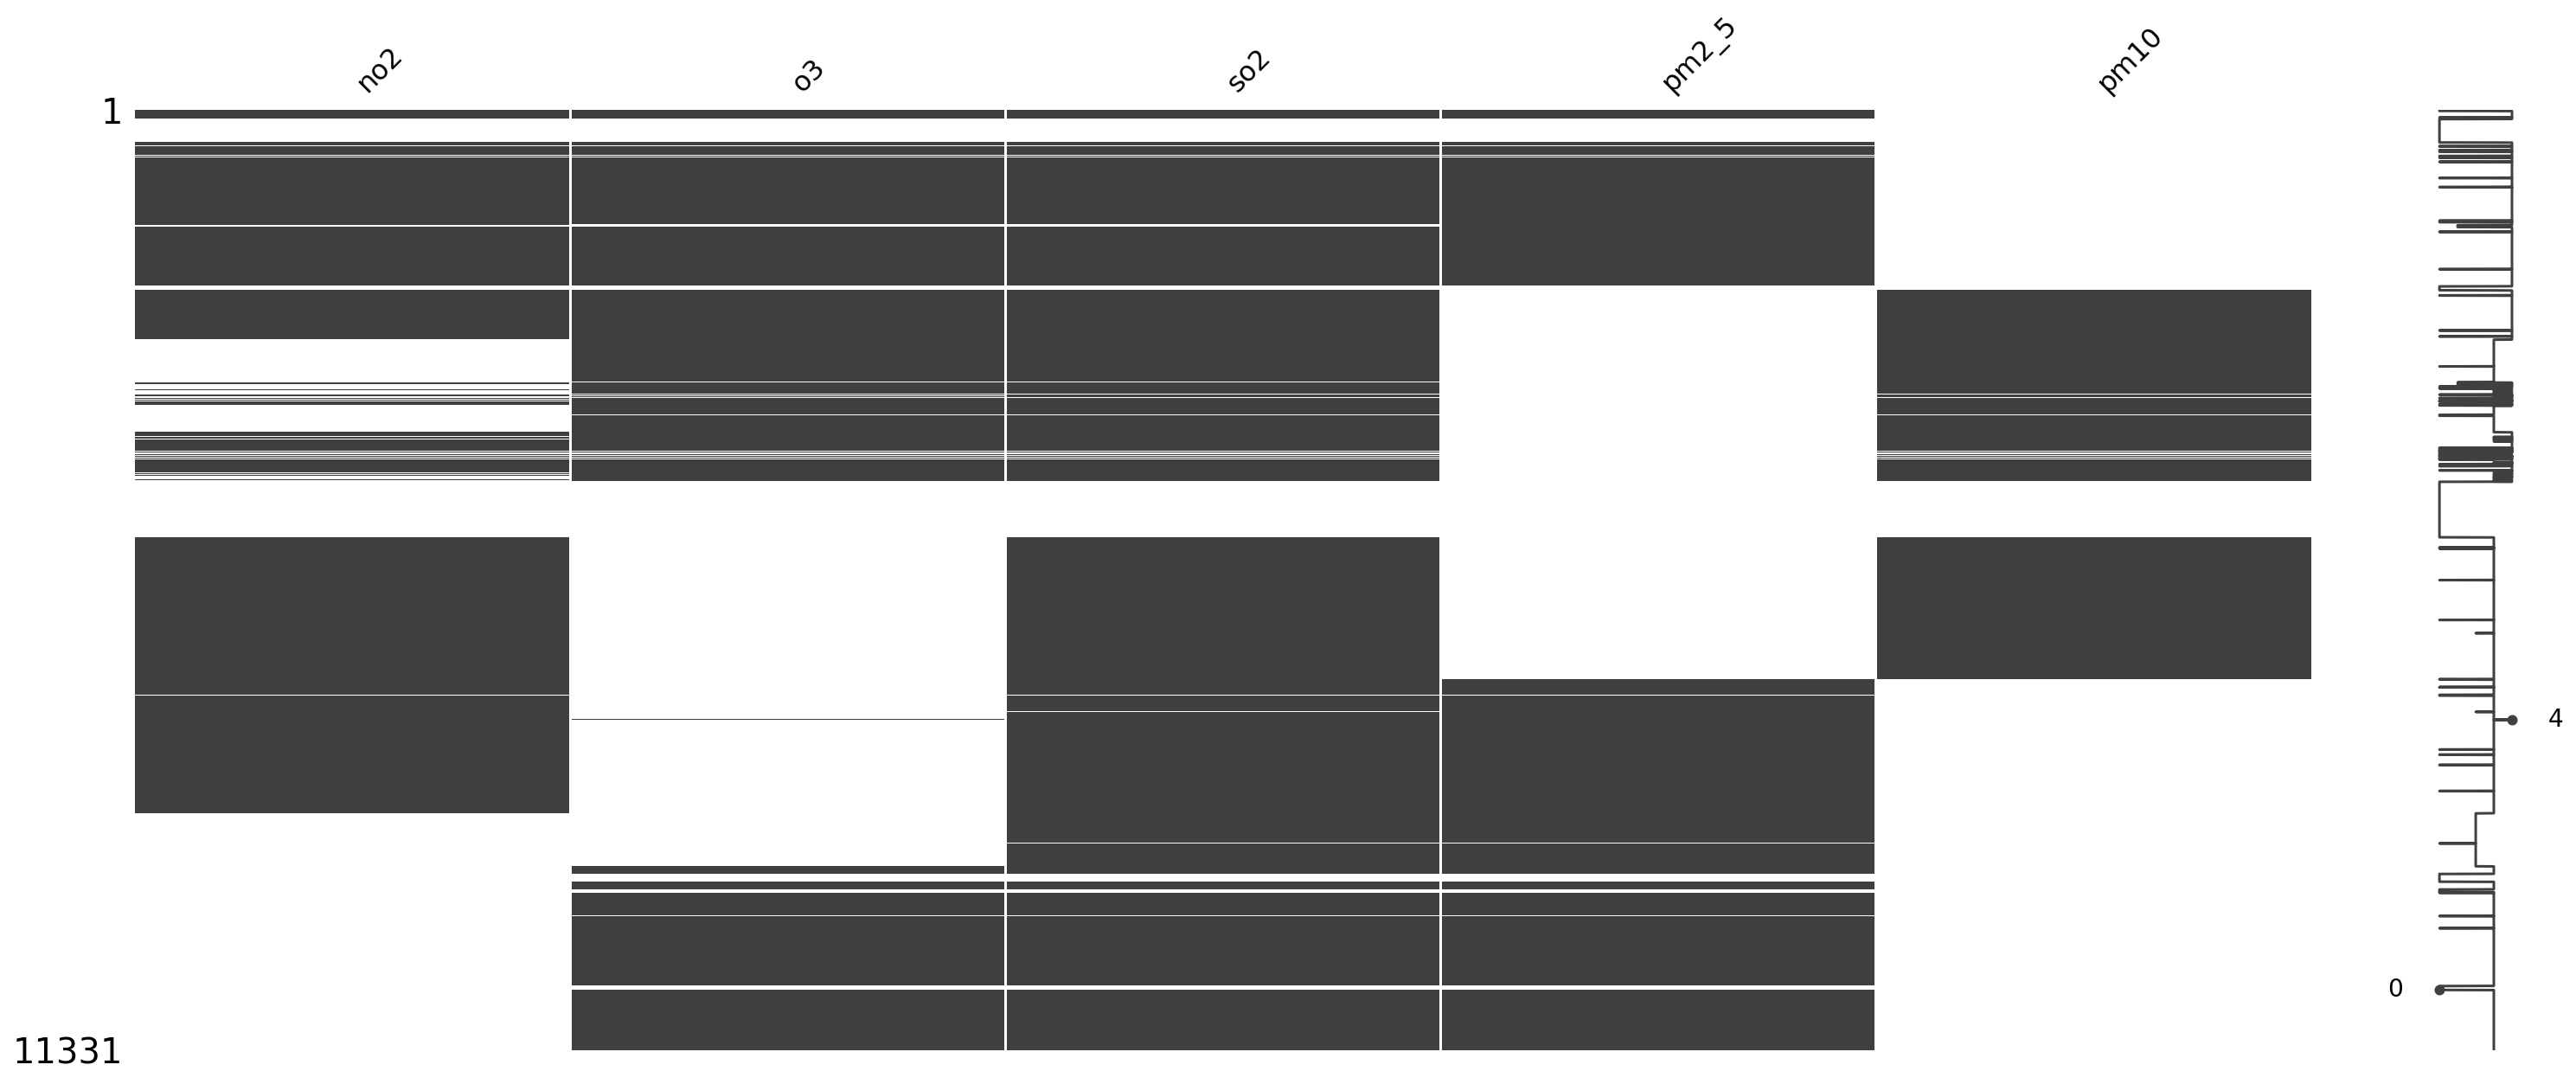

In [ ]:
msno.matrix(data10)

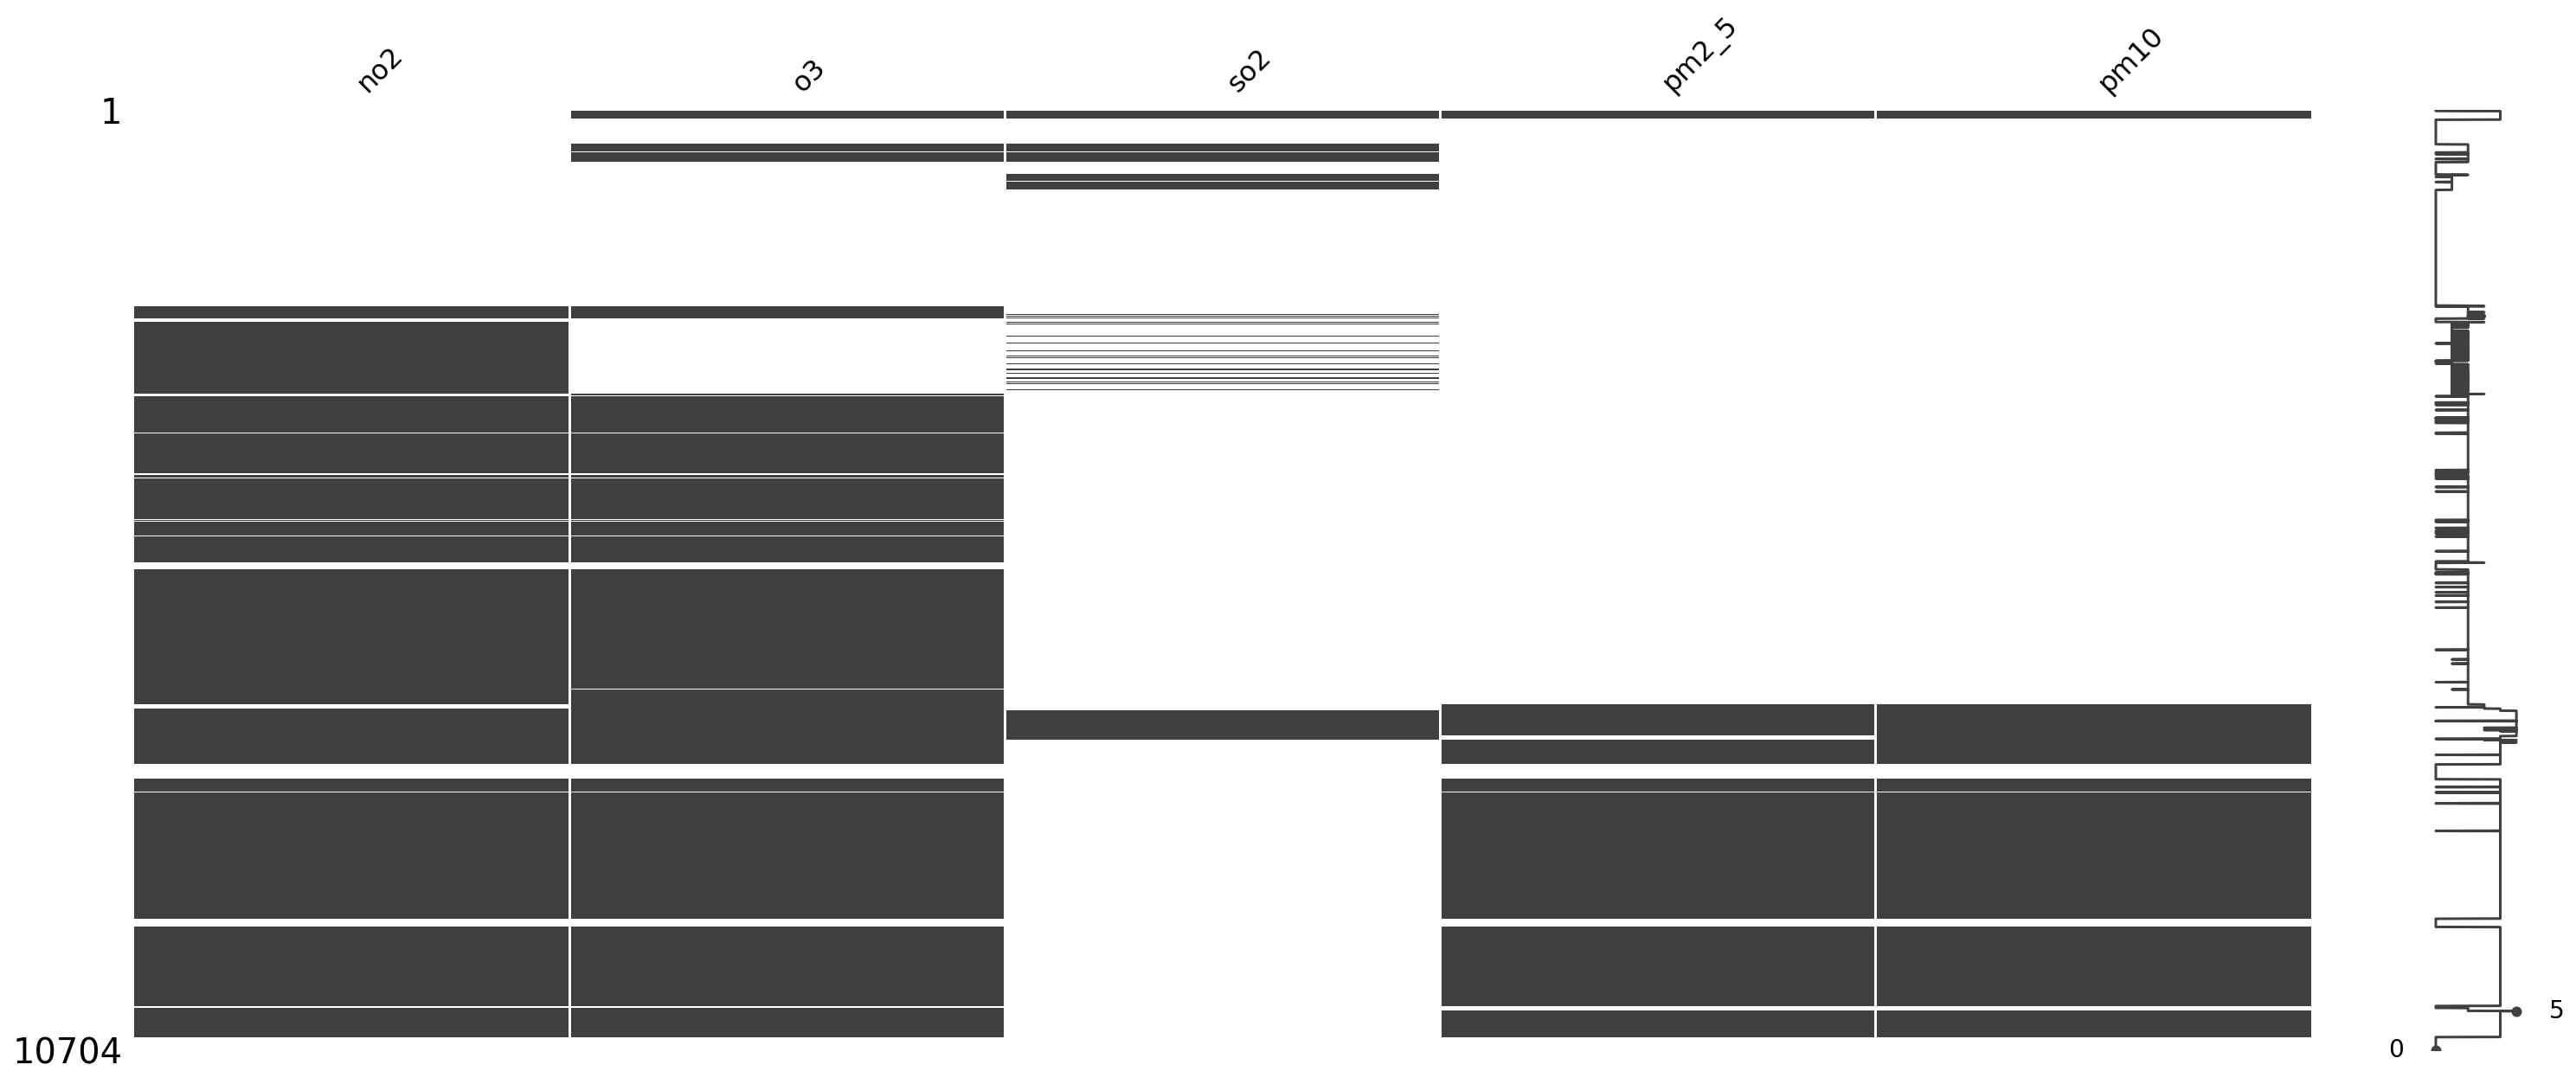

In [ ]:
msno.matrix(data11)

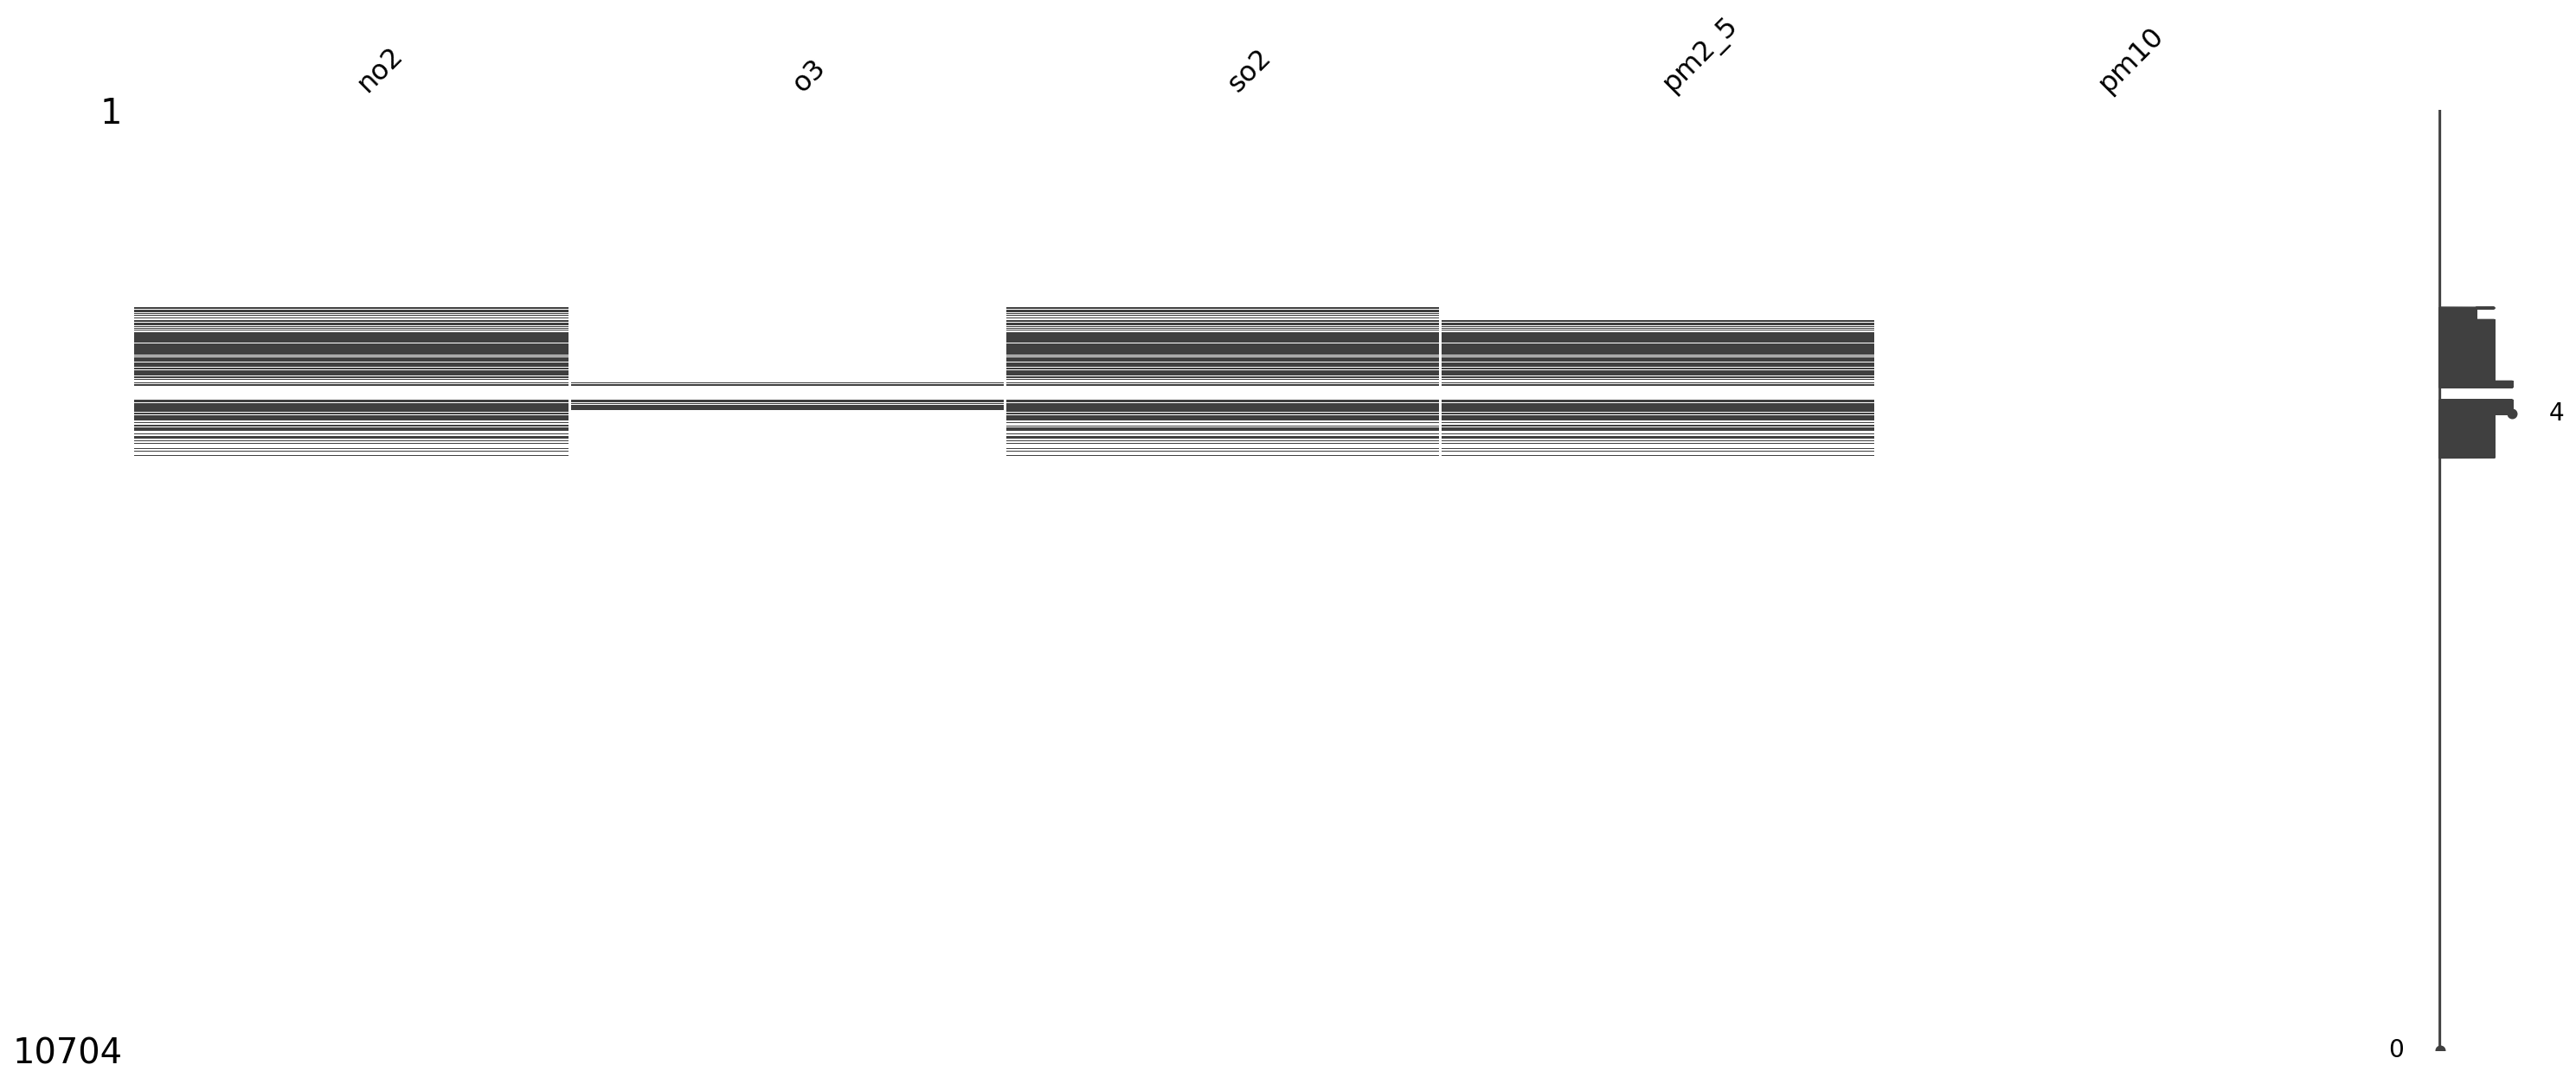

In [ ]:
msno.matrix(data12)

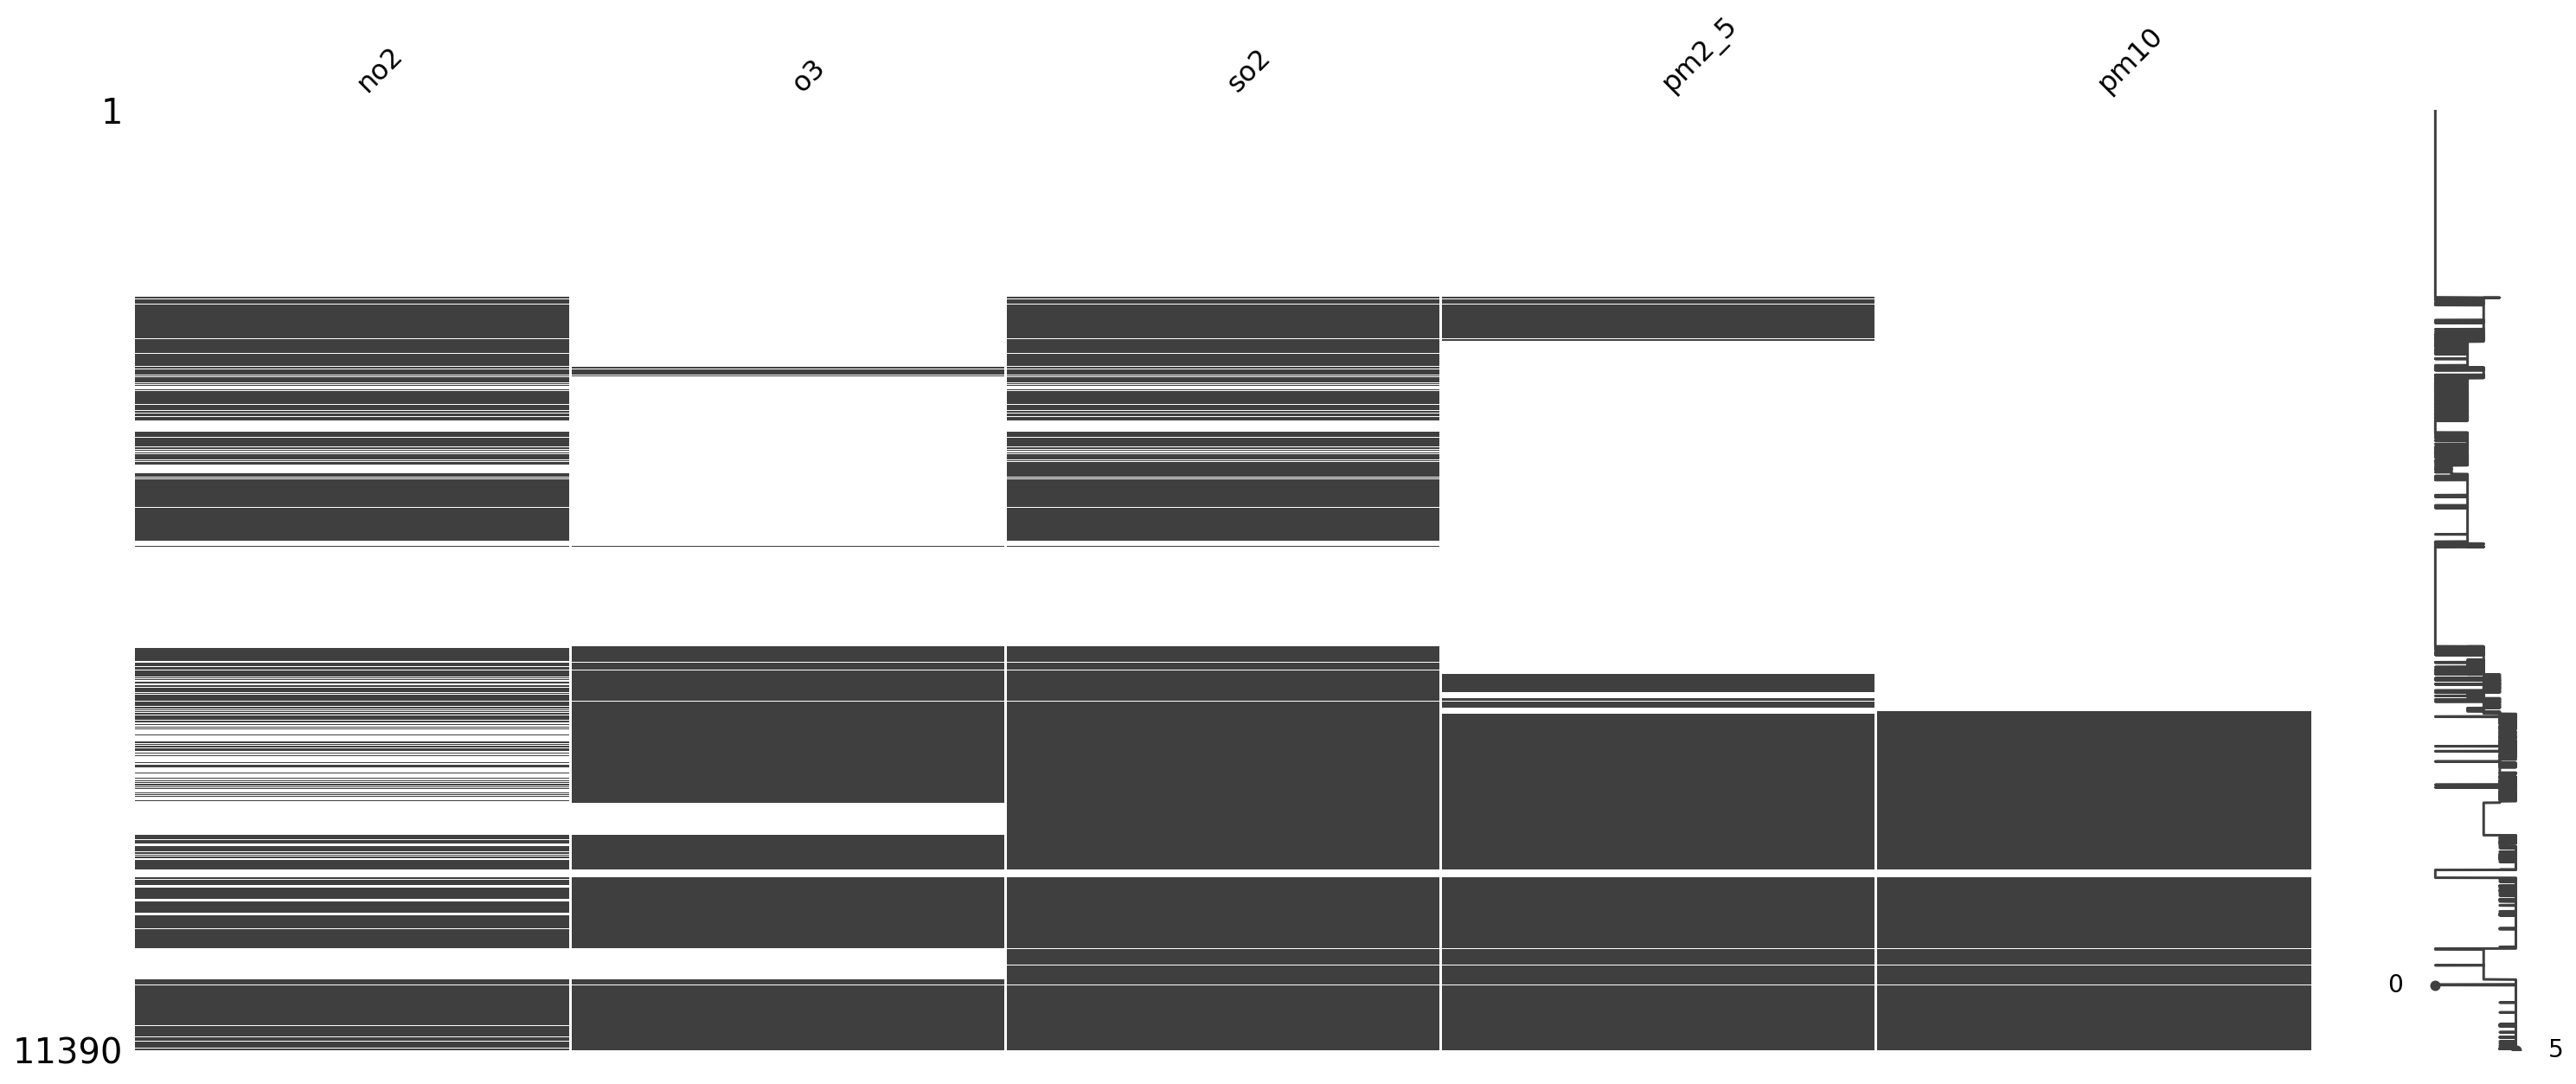

In [ ]:
msno.matrix(data13)

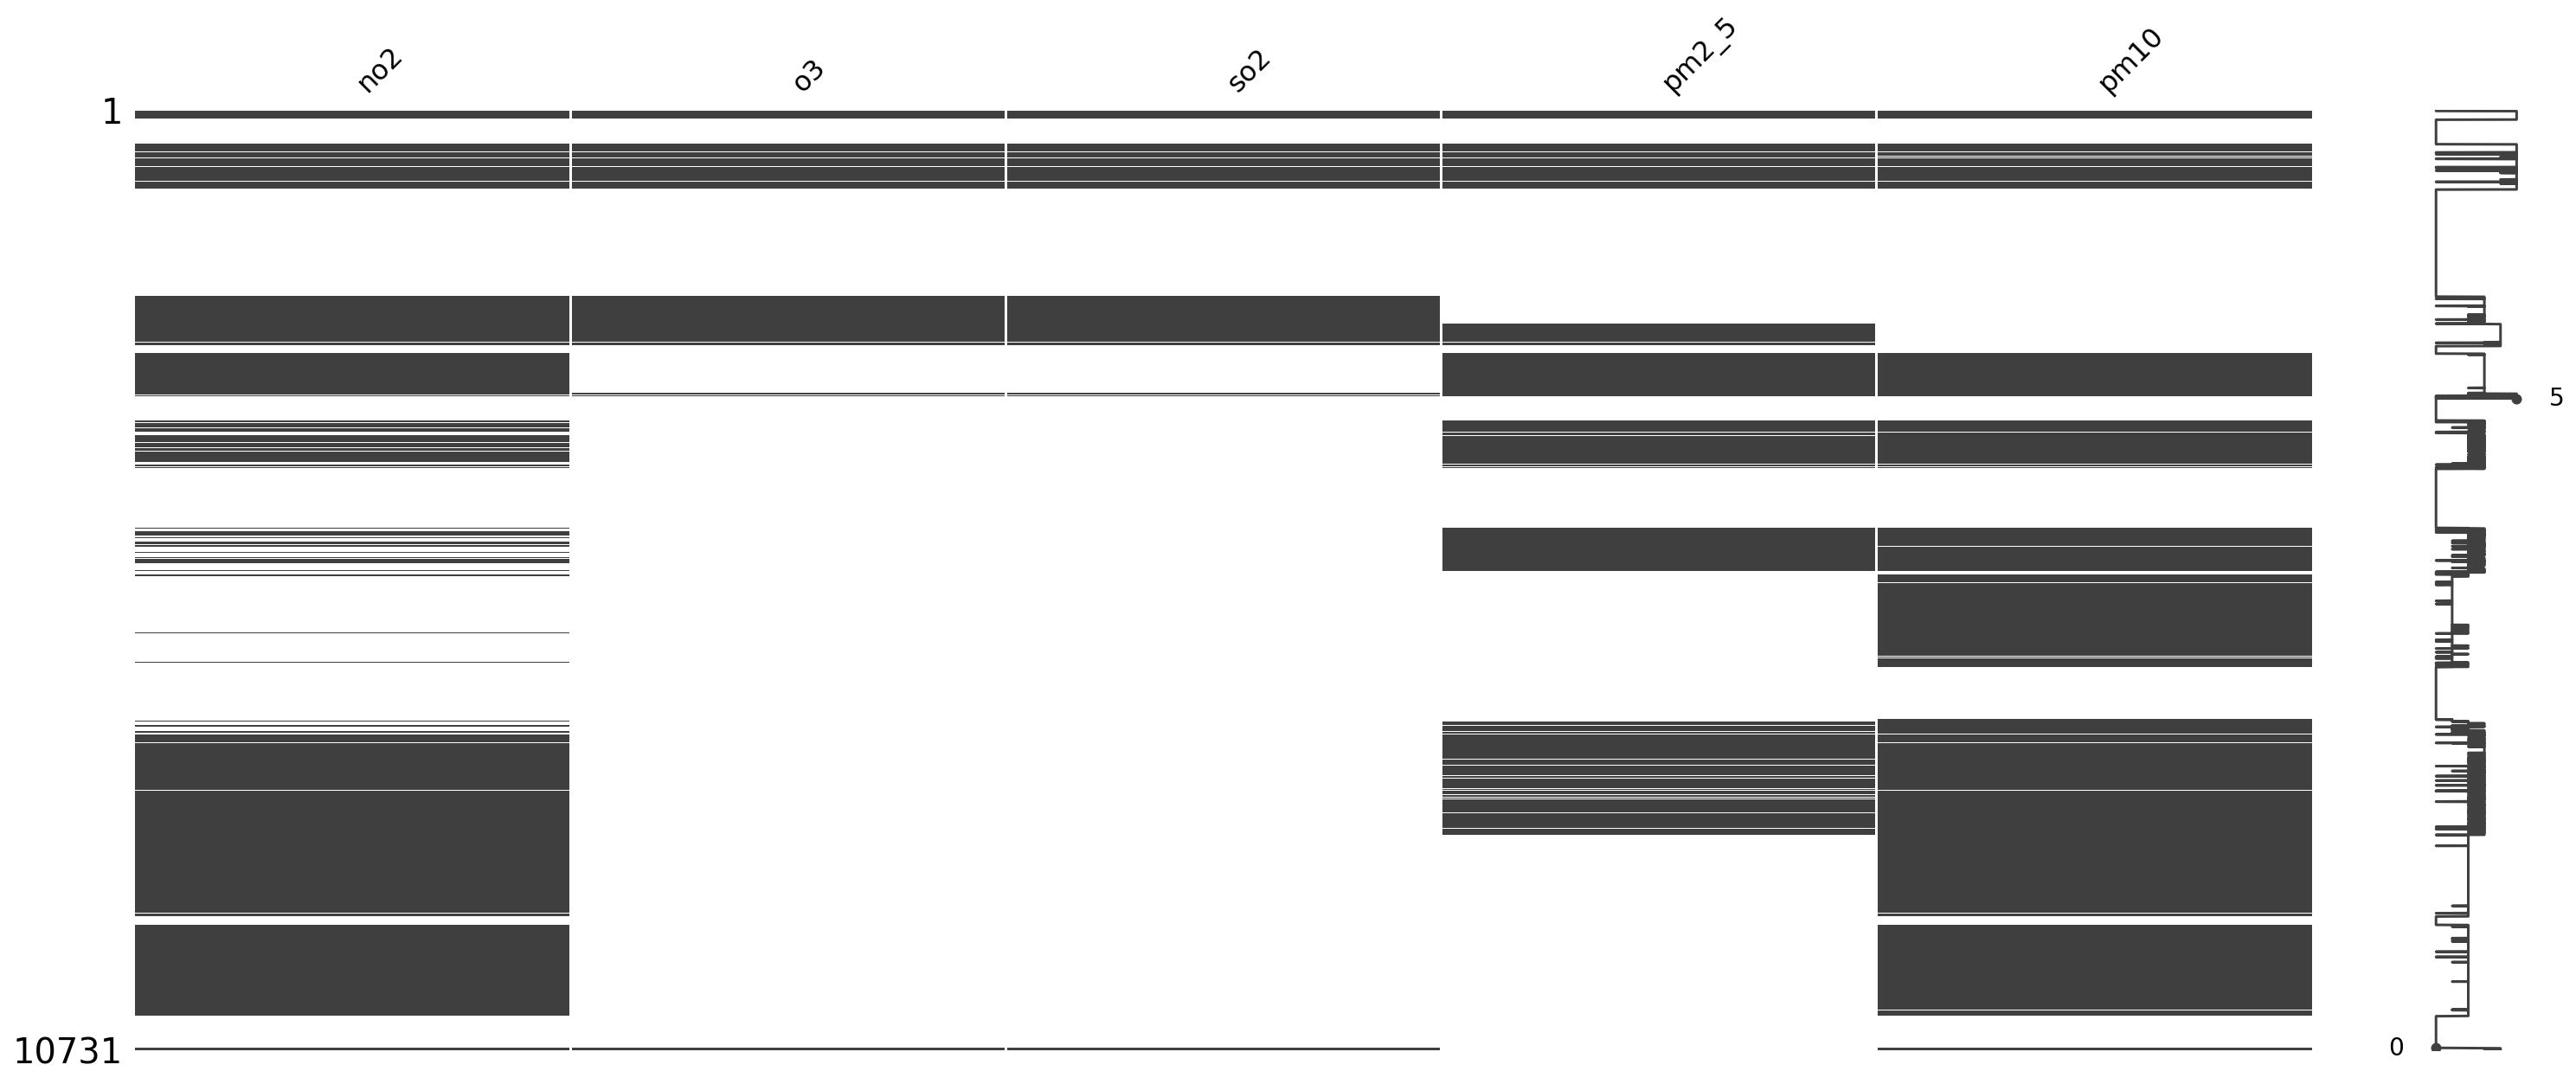

In [ ]:
msno.matrix(data14)

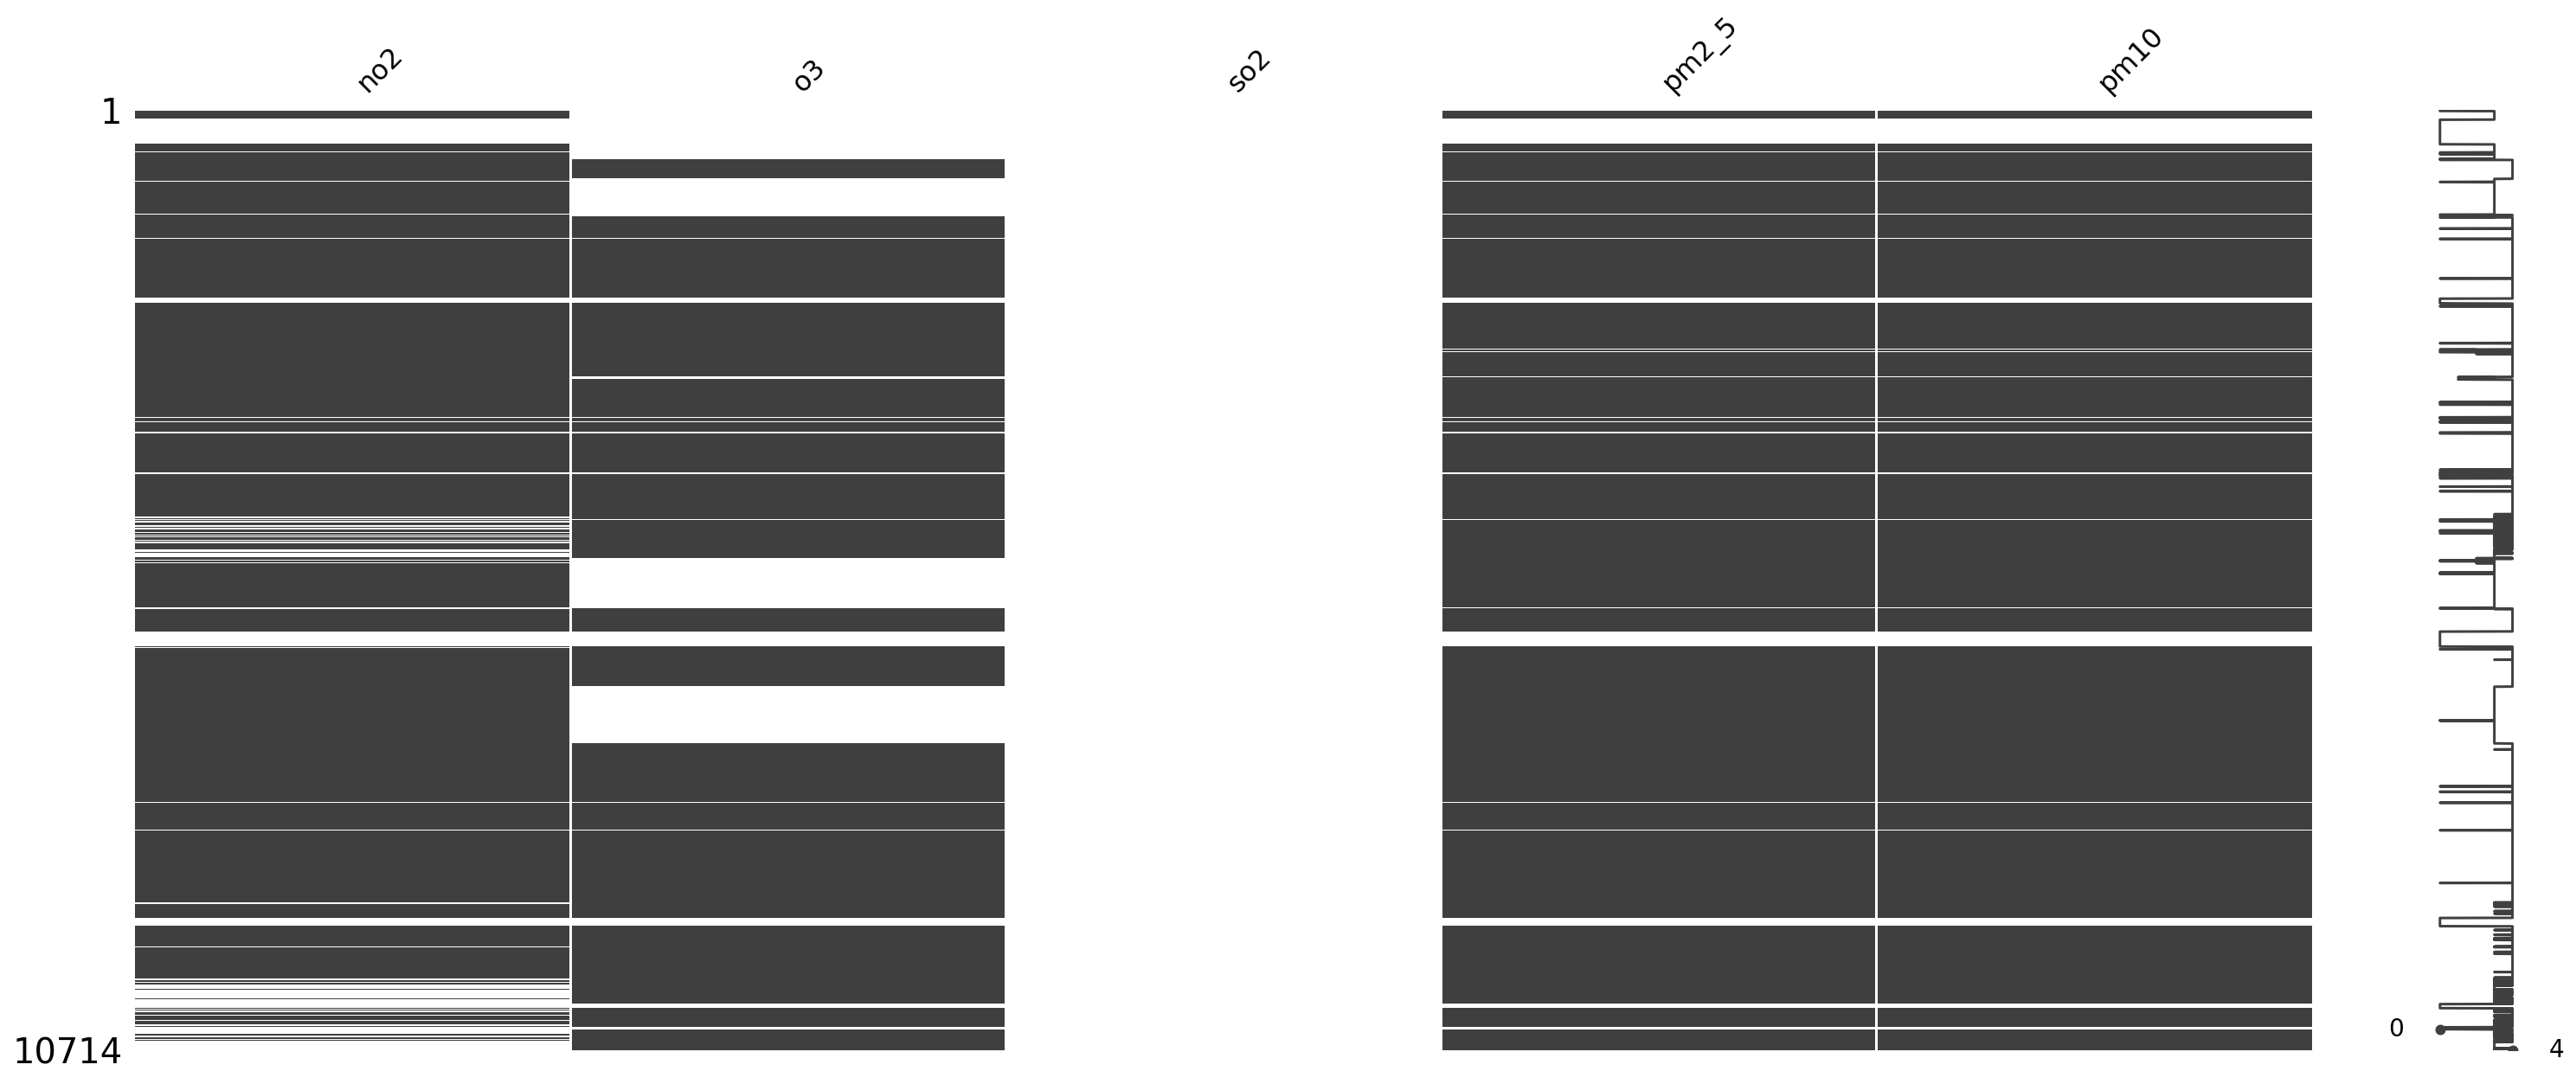

In [ ]:
msno.matrix(data15)

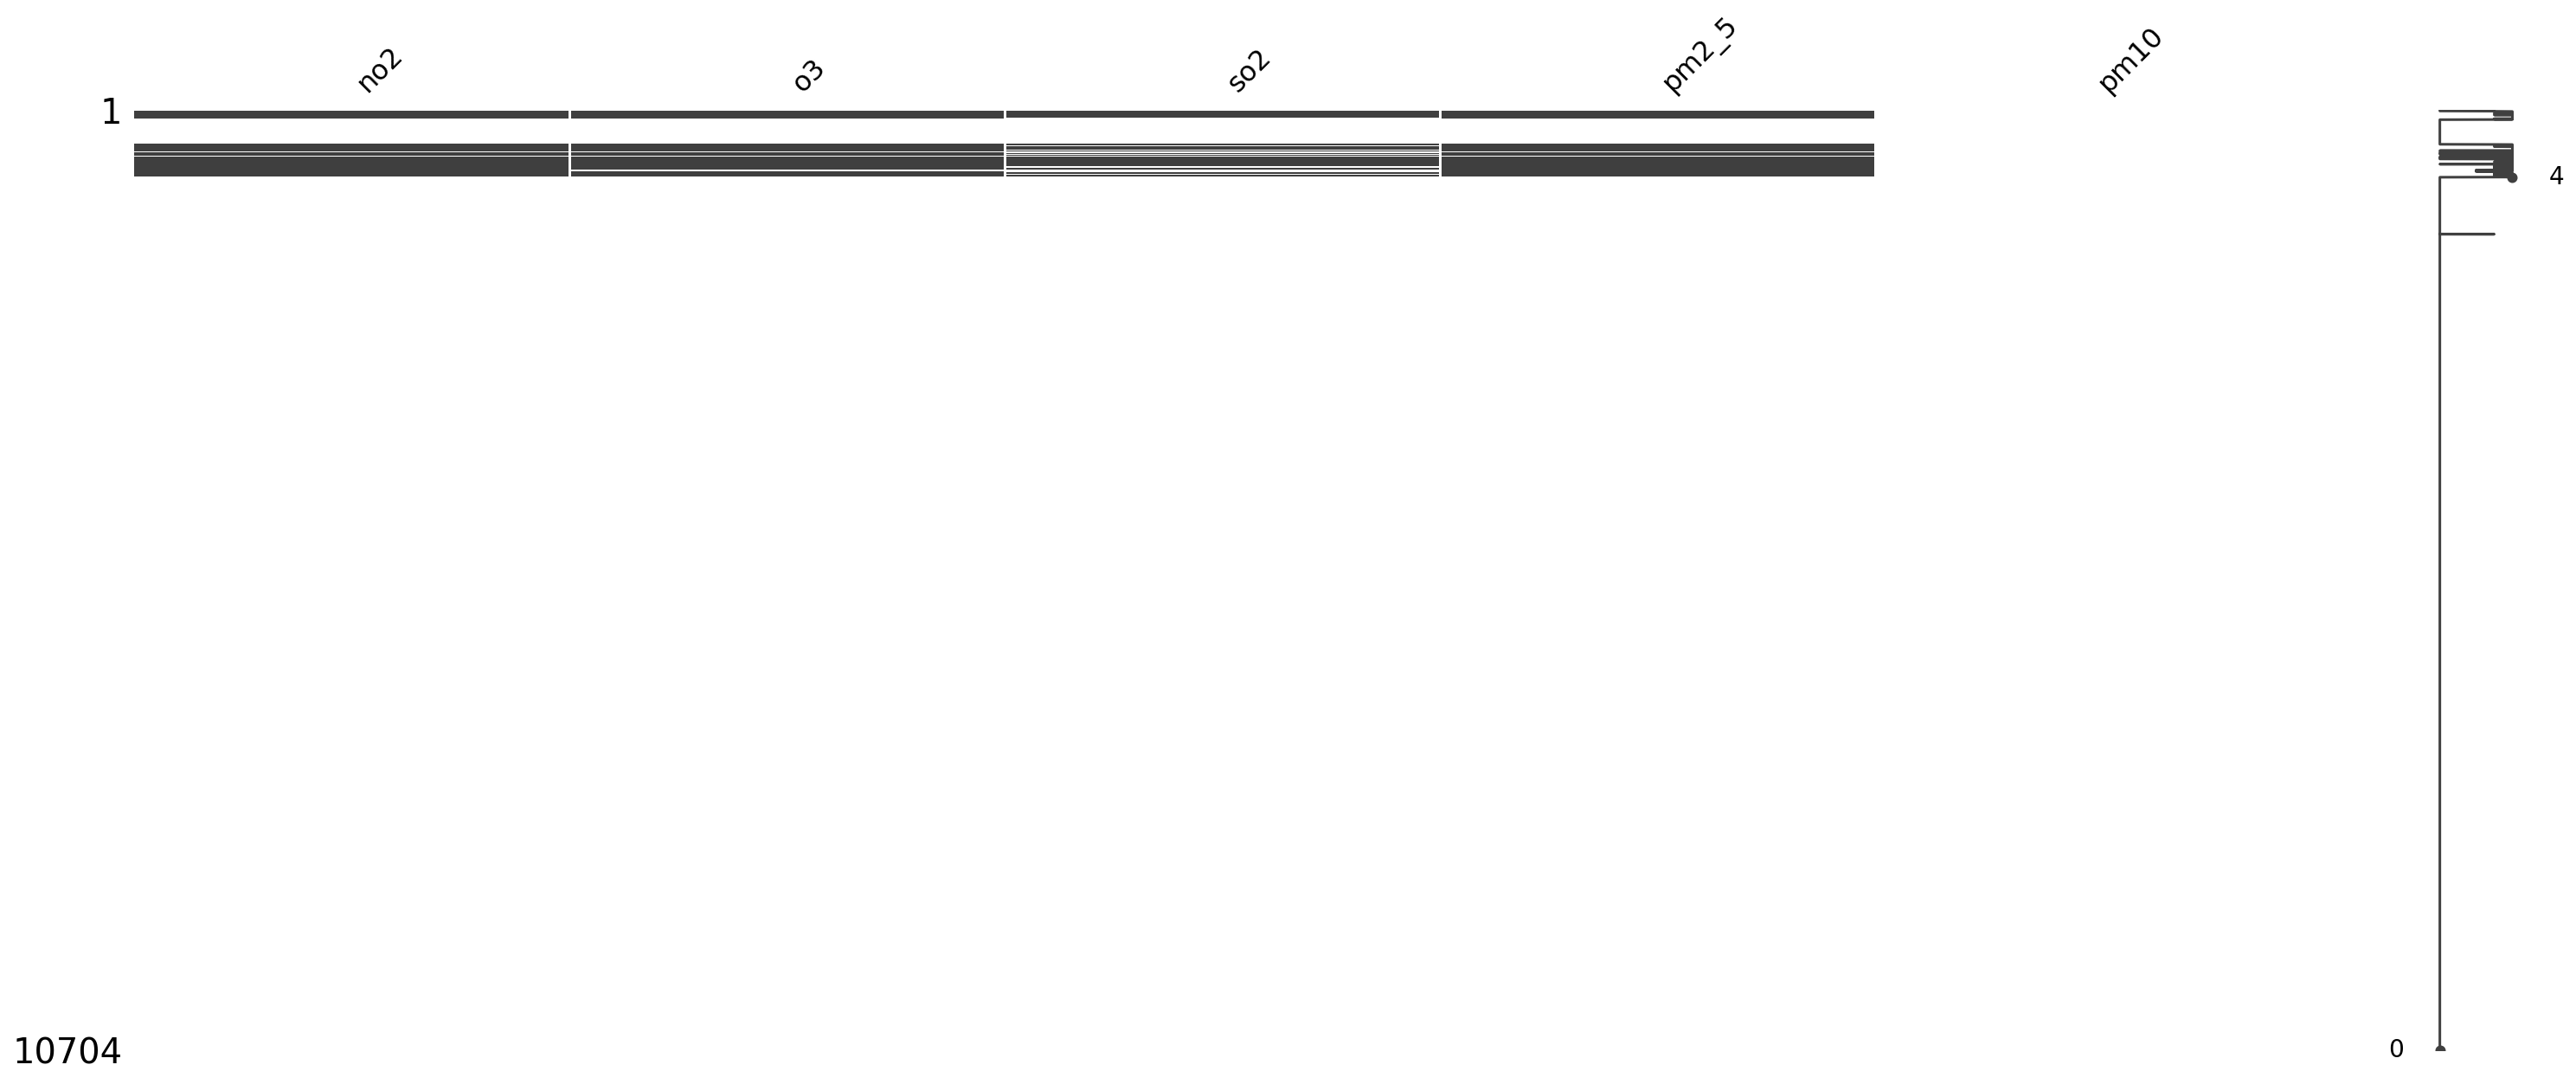

In [ ]:
msno.matrix(data16)

In [ ]:
import plotly.express as px
d_data8 = data8.pm2_5.resample('D')mean()

In [ ]:
fig = px.line(data8, x=data8.index, y ="pm2_5")
fig.show()

###Incorporation of US Embassy at Lima, Peru


In [ ]:
df_embassy = pd.read_csv('/content/Lima_PM2.5_2019_2020.csv',parse_dates=['Date (LT)'])

In [ ]:
df_embassy.columns

Index(['Site', 'Parameter', 'Date (LT)', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'Raw Conc.', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')

In [ ]:
df_embassy.rename(columns={'Date (LT)':'Datedate','Raw Conc.':'value'}, inplace=True)
print(df_embassy.columns)
print(type(df_embassy.Datedate))

Index(['Site', 'Parameter', 'Datedate', 'Year', 'Month', 'Day', 'Hour',
       'NowCast Conc.', 'AQI', 'AQI Category', 'value', 'Conc. Unit',
       'Duration', 'QC Name'],
      dtype='object')
<class 'pandas.core.series.Series'>


In [ ]:
df_embassy.set_index('Datedate', inplace=True)

Text(0, 0.5, 'PM2.5 Level')

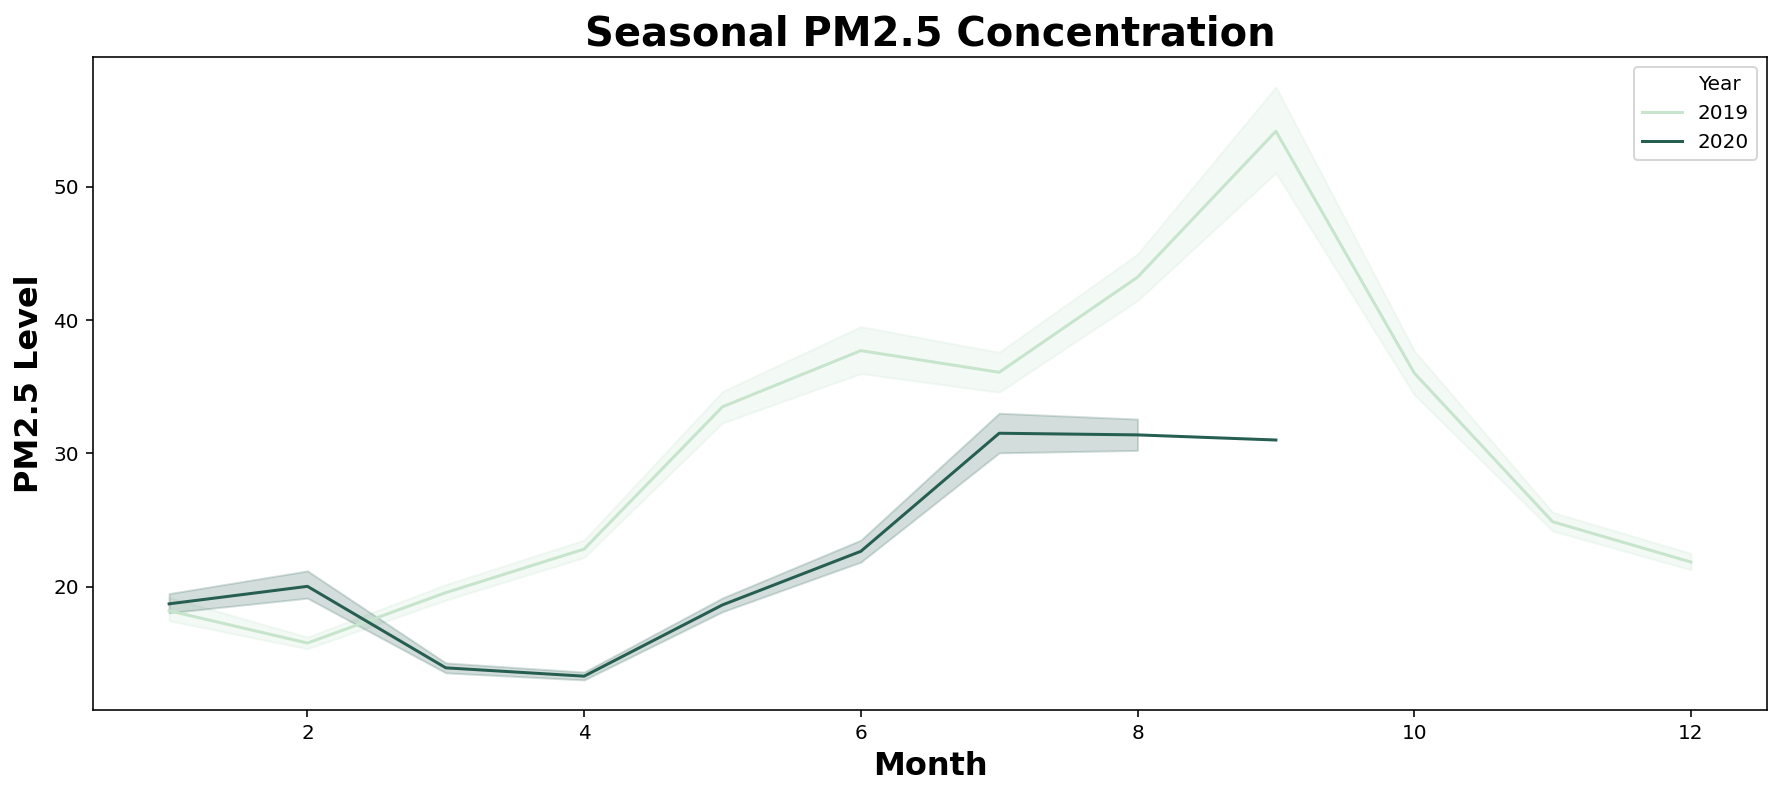

In [ ]:
variable = 'value'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 2)
sns.lineplot(df_embassy['Month'], df_embassy[variable], hue=df_embassy['Year'], palette=palette)
ax.set_title('Seasonal PM2.5 Concentration', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('PM2.5 Level', fontsize = 16, fontdict=dict(weight='bold'))


# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# sns.boxplot(d['Year'], d[variable], ax=ax[0])
# ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
# ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
# ax[0].set_ylabel('PM2.5 Level', fontsize = 16, fontdict=dict(weight='bold'))

# sns.boxplot(d['Month'], d[variable], ax=ax[1])
# ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
# ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
# ax[1].set_ylabel('PM2.5 Level', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
df_embassy.reset_index(inplace=True)

In [ ]:
df_embassy.columns

Index(['Site', 'Parameter', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.',
       'AQI', 'AQI Category', 'value', 'Conc. Unit', 'Duration', 'QC Name'],
      dtype='object')

In [ ]:
df_daily_embassy = df_embassy

In [ ]:
df_daily_embassy['value'] = df_embassy['value'].fillna("backfill")

In [ ]:
df_daily_embassy.head()

,Datedate,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,value,Conc. Unit,Duration,QC Name
0,2019-01-01 01:00:00,Lima,PM2.5 - Principal,2019,1,1,1,66.6,157.0,Unhealthy,73,UG/M3,1 Hr,Valid
1,2019-01-01 02:00:00,Lima,PM2.5 - Principal,2019,1,1,2,177.3,228.0,Very Unhealthy,288,UG/M3,1 Hr,Valid
2,2019-01-01 03:00:00,Lima,PM2.5 - Principal,2019,1,1,3,126.1,187.0,Unhealthy,75,UG/M3,1 Hr,Valid
3,2019-01-01 04:00:00,Lima,PM2.5 - Principal,2019,1,1,4,72.5,160.0,Unhealthy,19,UG/M3,1 Hr,Valid
4,2019-01-01 05:00:00,Lima,PM2.5 - Principal,2019,1,1,5,43.2,120.0,Unhealthy for Sensitive Groups,14,UG/M3,1 Hr,Valid


In [ ]:
#df_daily_embassy.columns
df_daily_embassy.reset_index(inplace=True)

In [ ]:
df_daily_embassy = df_daily_embassy.resample('D', on='Datedate').mean()

In [ ]:
df_daily_embassy.head()

,Year,Month,Day,Hour,NowCast Conc.,AQI
Datedate,,,,,,
2019-01-01,2019.0,1.0,1.0,12.0,33.686957,83.130435
2019-01-02,2019.0,2.0,1.0,11.5,14.458333,54.583333
2019-01-03,2019.0,3.0,1.0,11.5,15.354167,56.416667
2019-01-04,2019.0,4.0,1.0,11.5,19.112500,65.833333
2019-01-05,2019.0,5.0,1.0,11.5,27.020833,82.625000


In [ ]:
#df_daily_embassy = df_embassy.resample('D',on='Datedate').fillna("bfill").mean()

In [ ]:
df_daily_embassy.reset_index(inplace=True)

In [ ]:
df_daily_embassy.columns

Index(['Datedate', 'Year', 'Month', 'Day', 'Hour', 'NowCast Conc.', 'AQI'], dtype='object')

In [ ]:
df_daily_embassy = df_daily_embassy[:617]

In [ ]:
len(df_daily_embassy)

708

In [ ]:
df_daily_embassy.to_csv('out.csv')

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
# df = inter
# fig = px.scatter(df, x="Datedate", y="value", animation_frame="Datedate", size="value", range_y=[0,300])
fig = px.scatter(df_daily_embassy, x=df_daily_embassy['Datedate'], 
                 y=df_daily_embassy['value'], 
                 animation_frame=df_daily_embassy["Datedate"],range_y=[0,50],)
fig.add_trace(go.Scatter(x=df_daily_embassy['Datedate'], y=df_daily_embassy['value'], 
                         mode='lines',name='PM25 Level'))
fig.show()

ValueError: ignored

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
# df = inter
# fig = px.scatter(df, x="Datedate", y="value", animation_frame="Datedate", size="value", range_y=[0,300])
fig = px.scatter(df_daily_embassy, x=df_daily_embassy['Datedate'], 
                 y=df_daily_embassy['value'], 
                 animation_frame=df_daily_embassy["Datedate"],range_y=[0,50])
fig.add_trace(go.Scatter(x=df_daily_embassy['Datedate'], y=df_daily_embassy['value'], 
                         mode='lines',name='PM2.5 Level'))
fig.show()

ValueError: ignored

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
# df = inter
# fig = px.scatter(df, x="Datedate", y="value", animation_frame="Datedate", size="value", range_y=[0,300])
fig = px.scatter(df_daily_embassy, x=df_daily_embassy['Datedate'], 
                 y=df_daily_embassy['value'])
fig.add_trace(go.Scatter(x=df_daily_embassy['Datedate'], y=df_daily_embassy['value'], 
                         mode='lines',name='PM25 Level'))
fig.show()

In [ ]:
df_3daily_embassy = df_daily_embassy.resample('3D',on='Datedate').mean()

In [ ]:
df_3daily_embassy.reset_index(inplace=True)
df_3daily_embassy

,Datedate,Year,Month,Day,Hour,NowCast Conc.,AQI,value
0,2019-01-01,2019.0,2.0,1.0,11.666667,21.166486,64.710145,20.387077
1,2019-01-04,2019.0,5.0,1.0,11.500000,25.588889,79.625000,25.785024
2,2019-01-07,2019.0,8.0,1.0,11.500000,40.915278,110.333333,40.713164
3,2019-01-10,2019.0,11.0,1.0,11.500000,35.273611,93.111111,35.496981
4,2019-01-13,2019.0,1.0,14.0,11.500000,13.812500,53.222222,13.847222
...,...,...,...,...,...,...,...,...
201,2020-08-26,2020.0,8.0,27.0,11.500000,30.969444,90.680556,30.930556
202,2020-08-29,2020.0,8.0,30.0,11.500000,18.722222,62.277778,18.819444
203,2020-09-01,2020.0,2.0,9.0,11.833333,16.577632,60.142544,16.673611
204,2020-09-04,2020.0,5.0,9.0,11.500000,13.931944,53.847222,13.833333


In [ ]:
fig1 = px.line(df_3daily_embassy, x=df_3daily_embassy['Datedate'], y=df_3daily_embassy['value'], labels={'x':'Date','y':'PM2.5 Conc in ug/m3'})
#fig.add_trace(go.Scatter(x=df_3daily_embassy['Datedate'], y=df_3daily_embassy['value'], 
#                         mode='lines',name='PM25 Level'))
fig1 = px.line(df_3daily_embassy, x=df_3daily_embassy['Datedate'], y=df_3daily_embassy['value'], labels={'x':'Date','y':'PM2.5 Conc in ug/m3'})
fig1.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_3daily_embassy['Month'][:250], y=df_3daily_embassy['value'][:250],mode='lines+markers',name='lines+markers'))
fig.add_trace(go.Scatter(x=df_3daily_embassy['Month'][250:], y=df_3daily_embassy['value'][250:],
                    mode='lines',
                    name='lines'))
fig.show()

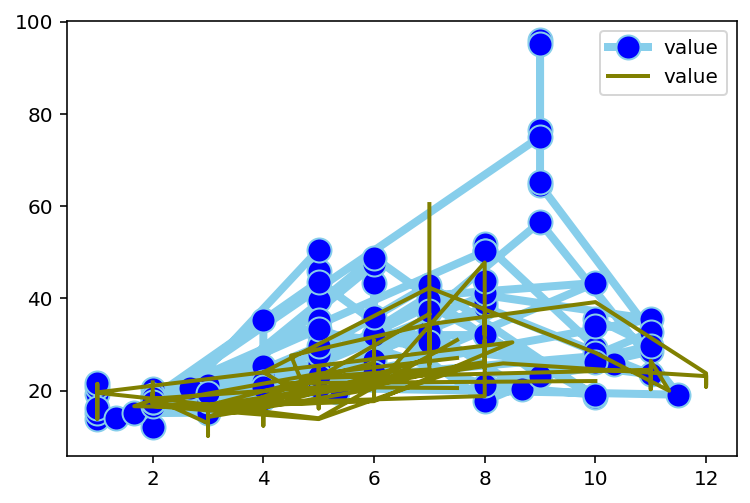

In [ ]:
plt.plot( 'Month', 'value', data=df_3daily_embassy[:100], marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Month', 'value', data=df_3daily_embassy[100:], marker='', color='olive', linewidth=2)
#plt.plot( 'x', 'y3', data=df_3daily_embassy['Month'][:250], marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [ ]:
df_3daily_embassy[df_3daily_embassy["Datedate"] == '2020-01-04']

,Datedate,Year,Month,Day,Hour,NowCast Conc.,AQI,value
